In [11]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025
The Chinese Grand Prix (Chinese: 中国大奖赛; pinyin: Zhōngguó Dàjiǎngsài) is a round of the Formula One World Championship. The event was held every year from 2004 until 2019 and is contracted to be held until 2025.[1] The event was contracted to take place from 2020 to 2023, but was cancelled each of those years as a consequence of the COVID-19 pandemic in China.

It is currently held at the Shanghai International Circuit, Jiading, Shanghai. Designed by Hermann Tilke and opened in 2004, the US240 million Shanghai course was the most expensive Formula One circuit facility[2] until the $6 billion Abu Dhabi course opened five years later.[3] The 5.451 km (3.387 mi) track features one of the trickiest corner combinations on the Formula One calendar: Turn 1 and 2, a demanding 270-degree, right-handed corner combination whose radius decreases as the corner progresses. Source: Wikipedia

In [578]:
session = ff1.get_session(2025, 2, 'FP1')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

core           INFO 	Loading data for Chinese Grand Prix - Practice 1 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data

## Upgrades
In this section those upgrades brought by the teams will be shown.
<table>
<tr>
    <td>
    Team
    </td>
    <td>
    Updated component
    </td>
    <td>
    Upgrade type
    </td>
</tr>

<tr>
    <td>
    McLaren
    </td>
    <td>
    Rear corner
    </td>
    <td>
    Performance
    </td>
</tr>


<tr>
    <td>
    Racing Bulls
    </td>
    <td>
    Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    RB
    </td>
    <td>
    Beam wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>

<tr>
    <td>
    Williams
    </td>
    <td>
    Rear beam wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>


<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Coke/Engine Cover
    </td>
    <td>
    Performance
    </td>
</tr>
</table>

## Obtain session information

In [12]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='CHN')

session_key session_name                 date_start  \
0         9988   Practice 1  2025-03-21T03:30:00+00:00   

                    date_end gmt_offset session_type  meeting_key  location  \
0  2025-03-21T04:30:00+00:00   08:00:00     Practice         1255  Shanghai   

   country_key country_code country_name  circuit_key circuit_short_name  year  
0           53          CHN        China           49           Shanghai  2025

## Free Practice
### Obtain setup

In [13]:
practice = libraryDataF1.obtain_information('laps',session_key=9988)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9988)
drivers = libraryDataF1.obtain_information('drivers',session_key=9988)

In [14]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
According to the data, it looks like that Mercedes set up its car for the last sector being the fastest, Alpine did the same.
Williams and McLaren are centered on the turns.

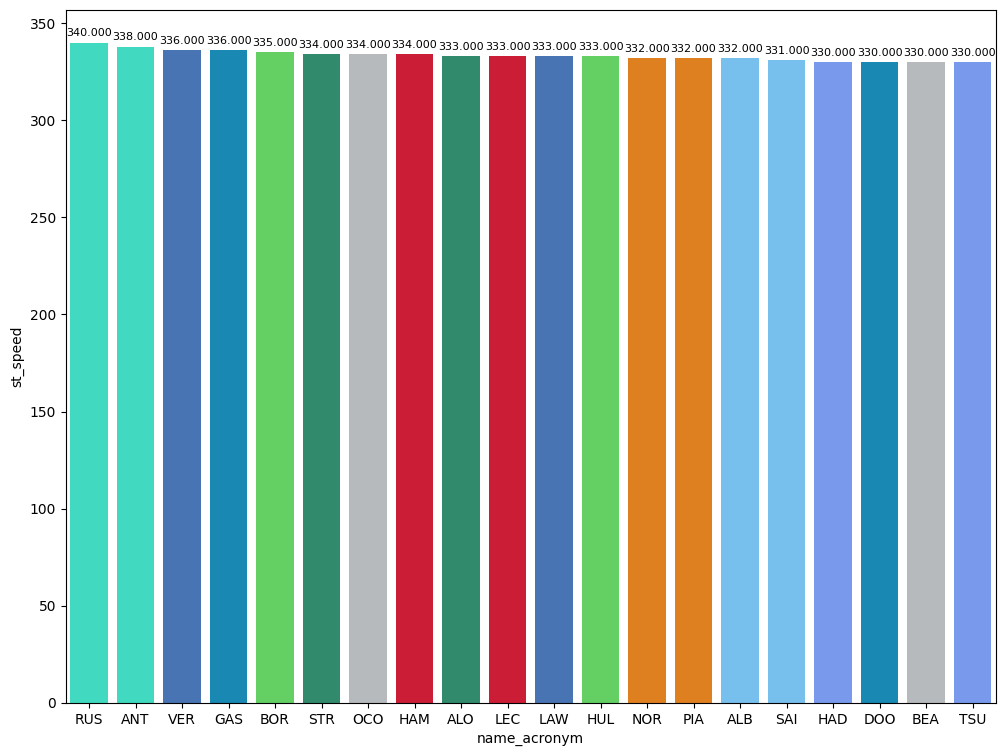

In [15]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

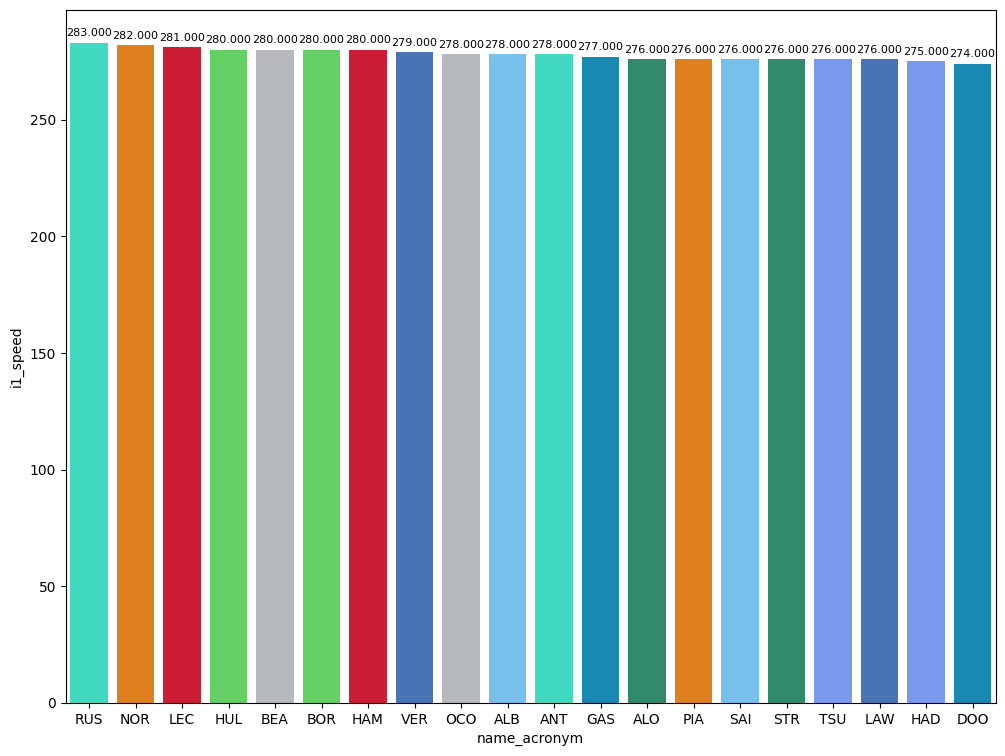

In [16]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

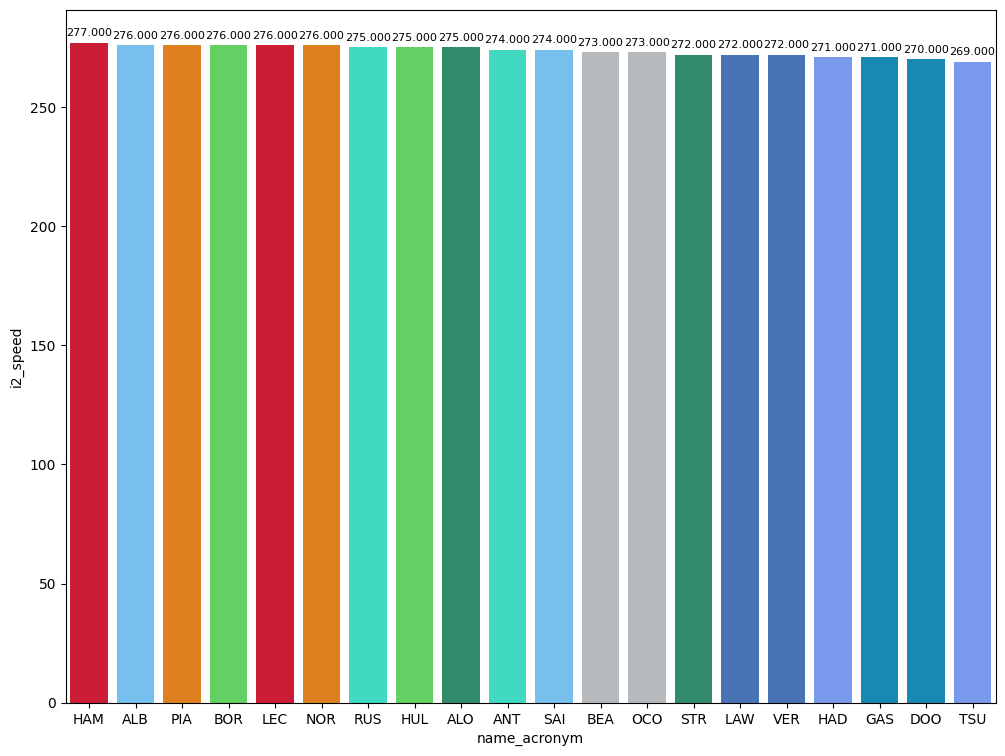

In [17]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 
Session showed that SOFT is better in general but the degradation is an important factor that indicates that this tyre should not be used.

In [18]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
378  Lando NORRIS   MEDIUM             24.281             28.240   
414  Lando NORRIS     SOFT             24.513             27.601   

     duration_sector_3  lap_duration  
378              39.64        92.161  
414              39.39        91.504

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

McLaren and Ferrari were the fastest with Norris leading. If Piastri can replicate the pace in sector 1 of Norris, McLaren will be unbeatable.

Verstappen would be P5-P7 if he would have finished the lap.

Haas,Williams, Aston and RB could be on the fighting for Q3 if one of the top fails.


In [19]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


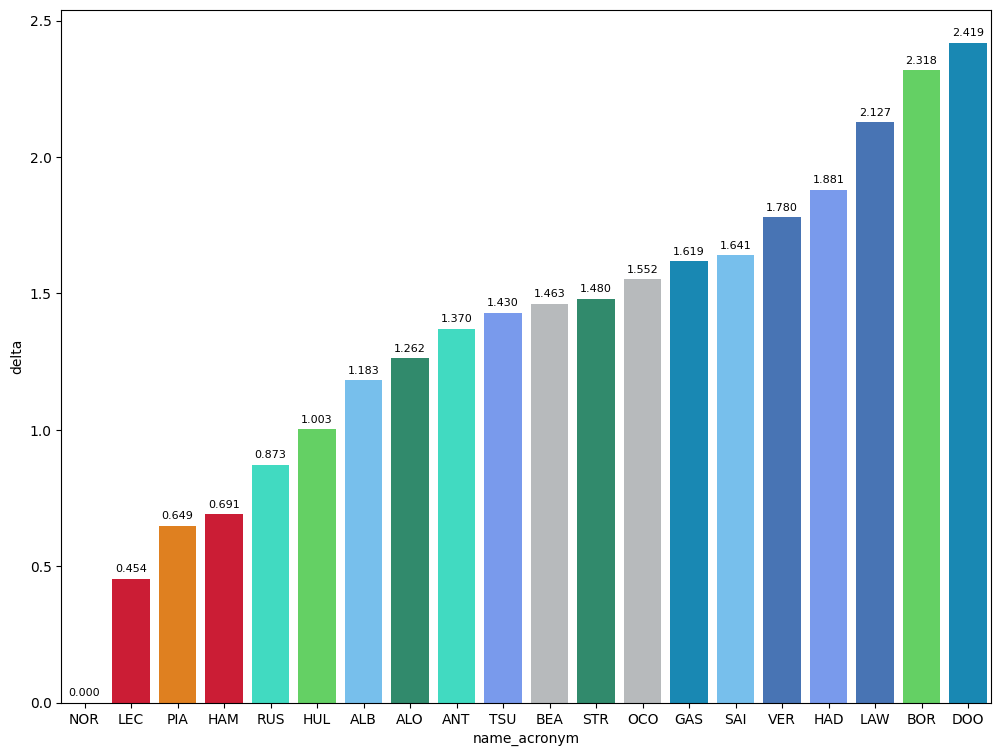

In [20]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In Sector 1, McLaren was dominant followed by Ferrari in similar laptimes compared to Piastri. Aston and Haas are strong in this sector and this could be its opportunity to pass Q3.

In Sector 2, McLaren did not have any rival. Mercedes, Aston and Alpine will suffer there.

In Sector 3, Mercedes was competitive and Aston,Haas and Alpine should take advantage of this sector to pass.

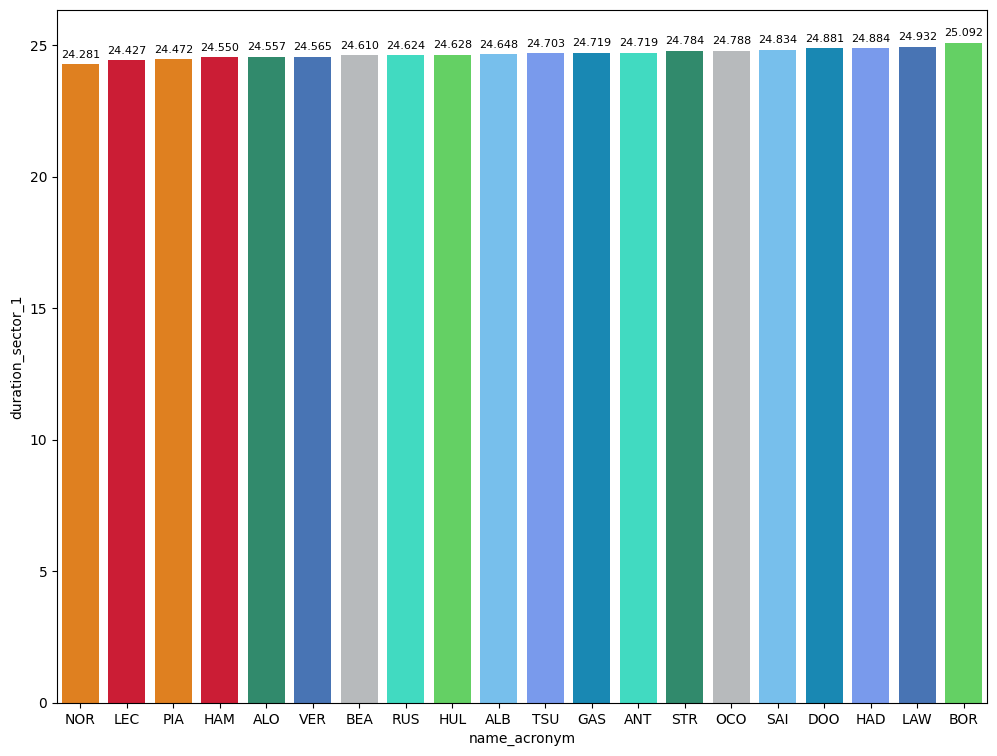

In [21]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

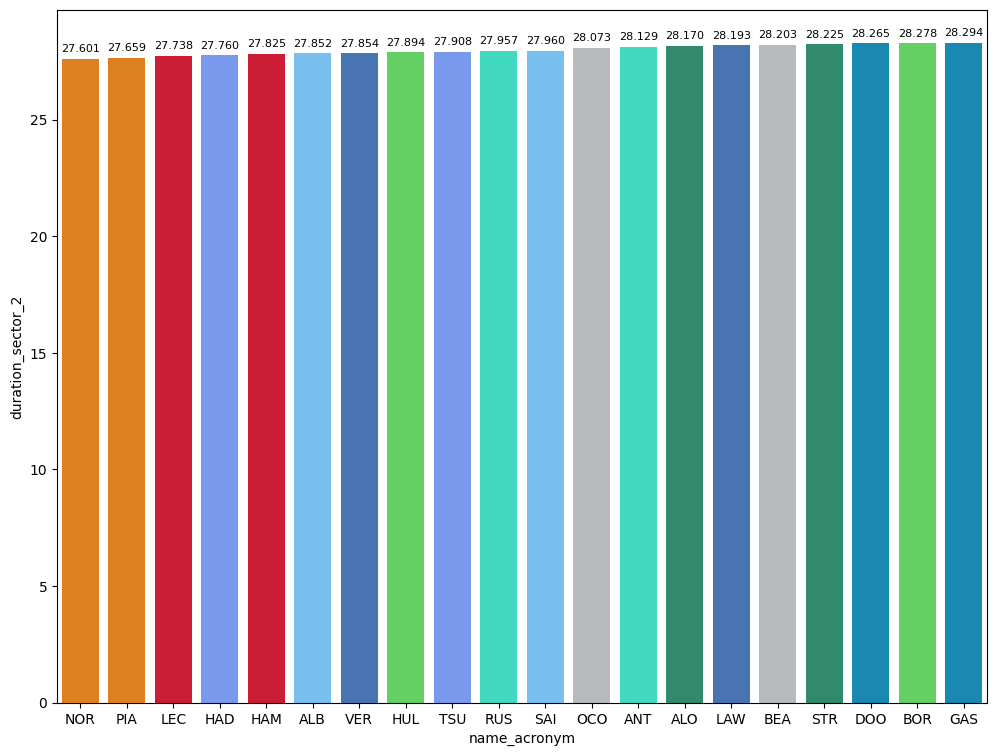

In [22]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

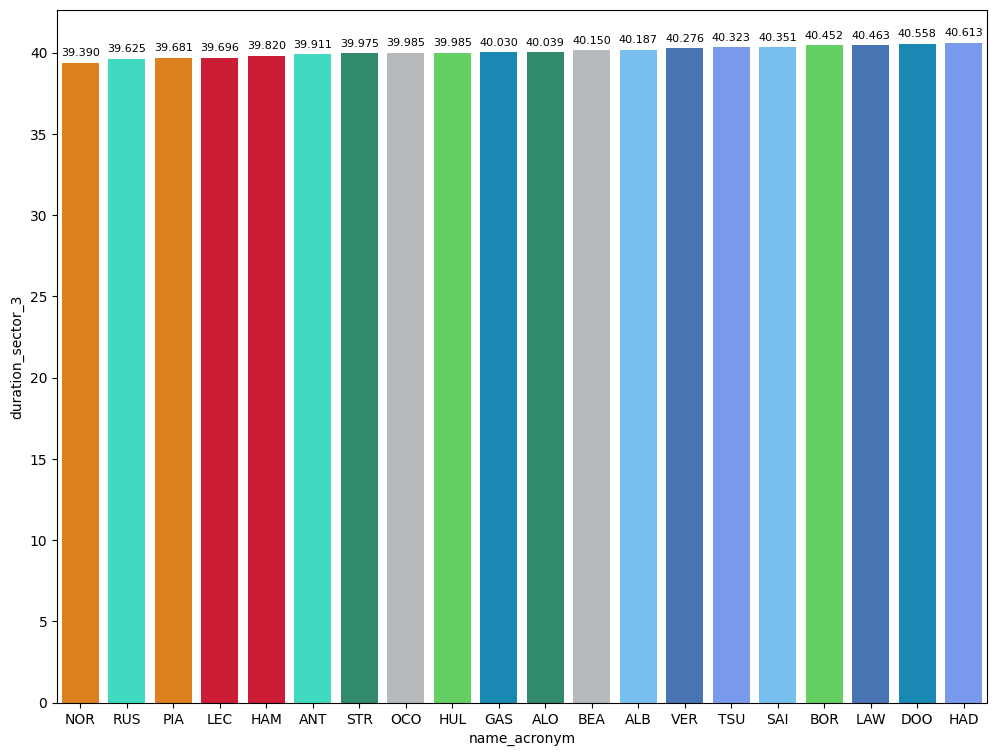

In [23]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [24]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <=105").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         93.240407
MEDIUM       96.724061

### Long runs

In [495]:
MINIMUN_SECONDS = 96
MAXIMUM_SECONDS = 99.8

#### Red Bull Racing

In [496]:
stintInformation.query('driver_number == 1 or driver_number == 30')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
7          1255         9988             1              1          1        9   
15         1255         9988             1             30          1       11   
30         1255         9988             2              1         10       20   
40         1255         9988             2             30         12       18   
54         1255         9988             3             30         19       24   
62         1255         9988             3              1         21       23   
68         1255         9988             4              1         23       25   

   compound  tyre_age_at_start  
7    MEDIUM                  0  
15   MEDIUM                  0  
30   MEDIUM                  8  
40   MEDIUM                 10  
54     SOFT                  0  
62     SOFT                  0  
68   MEDIUM                  0

In [497]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
191  Max VERSTAPPEN   MEDIUM  2025-03-21T03:58:18.275000+00:00          10   
203  Max VERSTAPPEN   MEDIUM  2025-03-21T03:59:55.450000+00:00          11   
216  Max VERSTAPPEN   MEDIUM  2025-03-21T04:01:33.159000+00:00          12   
234  Max VERSTAPPEN   MEDIUM  2025-03-21T04:03:10.567000+00:00          13   
252  Max VERSTAPPEN   MEDIUM  2025-03-21T04:04:48.860000+00:00          14   
272  Max VERSTAPPEN   MEDIUM  2025-03-21T04:06:26.832000+00:00          15   
290  Max VERSTAPPEN   MEDIUM  2025-03-21T04:08:05.161000+00:00          16   
307  Max VERSTAPPEN   MEDIUM  2025-03-21T04:09:44.157000+00:00          17   
325  Max VERSTAPPEN   MEDIUM  2025-03-21T04:11:23.933000+00:00          18   
394  Max VERSTAPPEN     SOFT  2025-03-21T04:26:09.419000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
191             26.288             29.417             42.148        97.853  
203             26.474             29.380             41.902        97.756  
216             26.288             29.335             41.702        97.325  
234             26.326             29.636             42.408        98.370  
252             26.163             29.592             42.187        97.942  
272             26.371             29.838             42.057        98.266  
290             26.497             30.195             42.397        99.089  
307             26.726             30.574             42.446        99.746  
325             26.809             30.401             42.553        99.763  
394             24.565             27.854             45.401        97.820

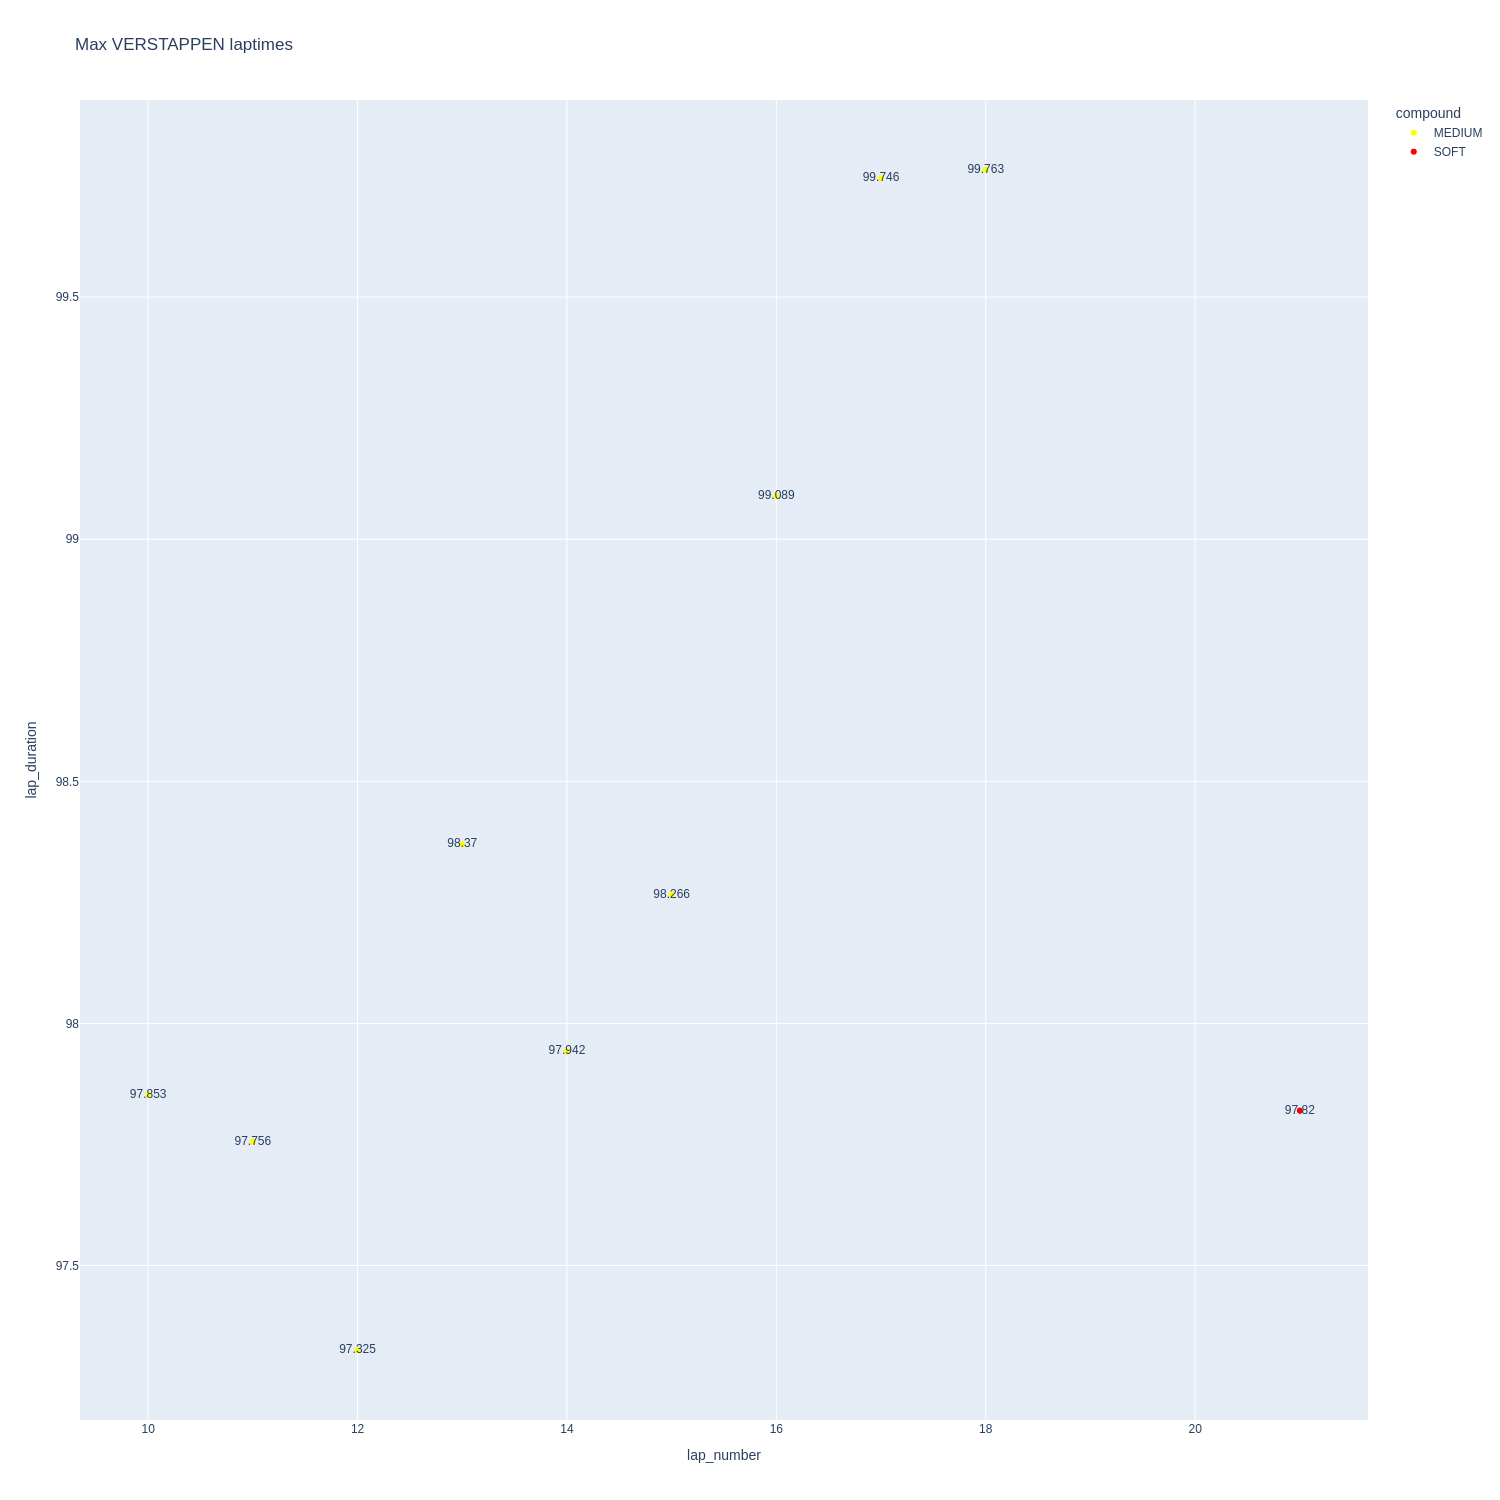

In [498]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

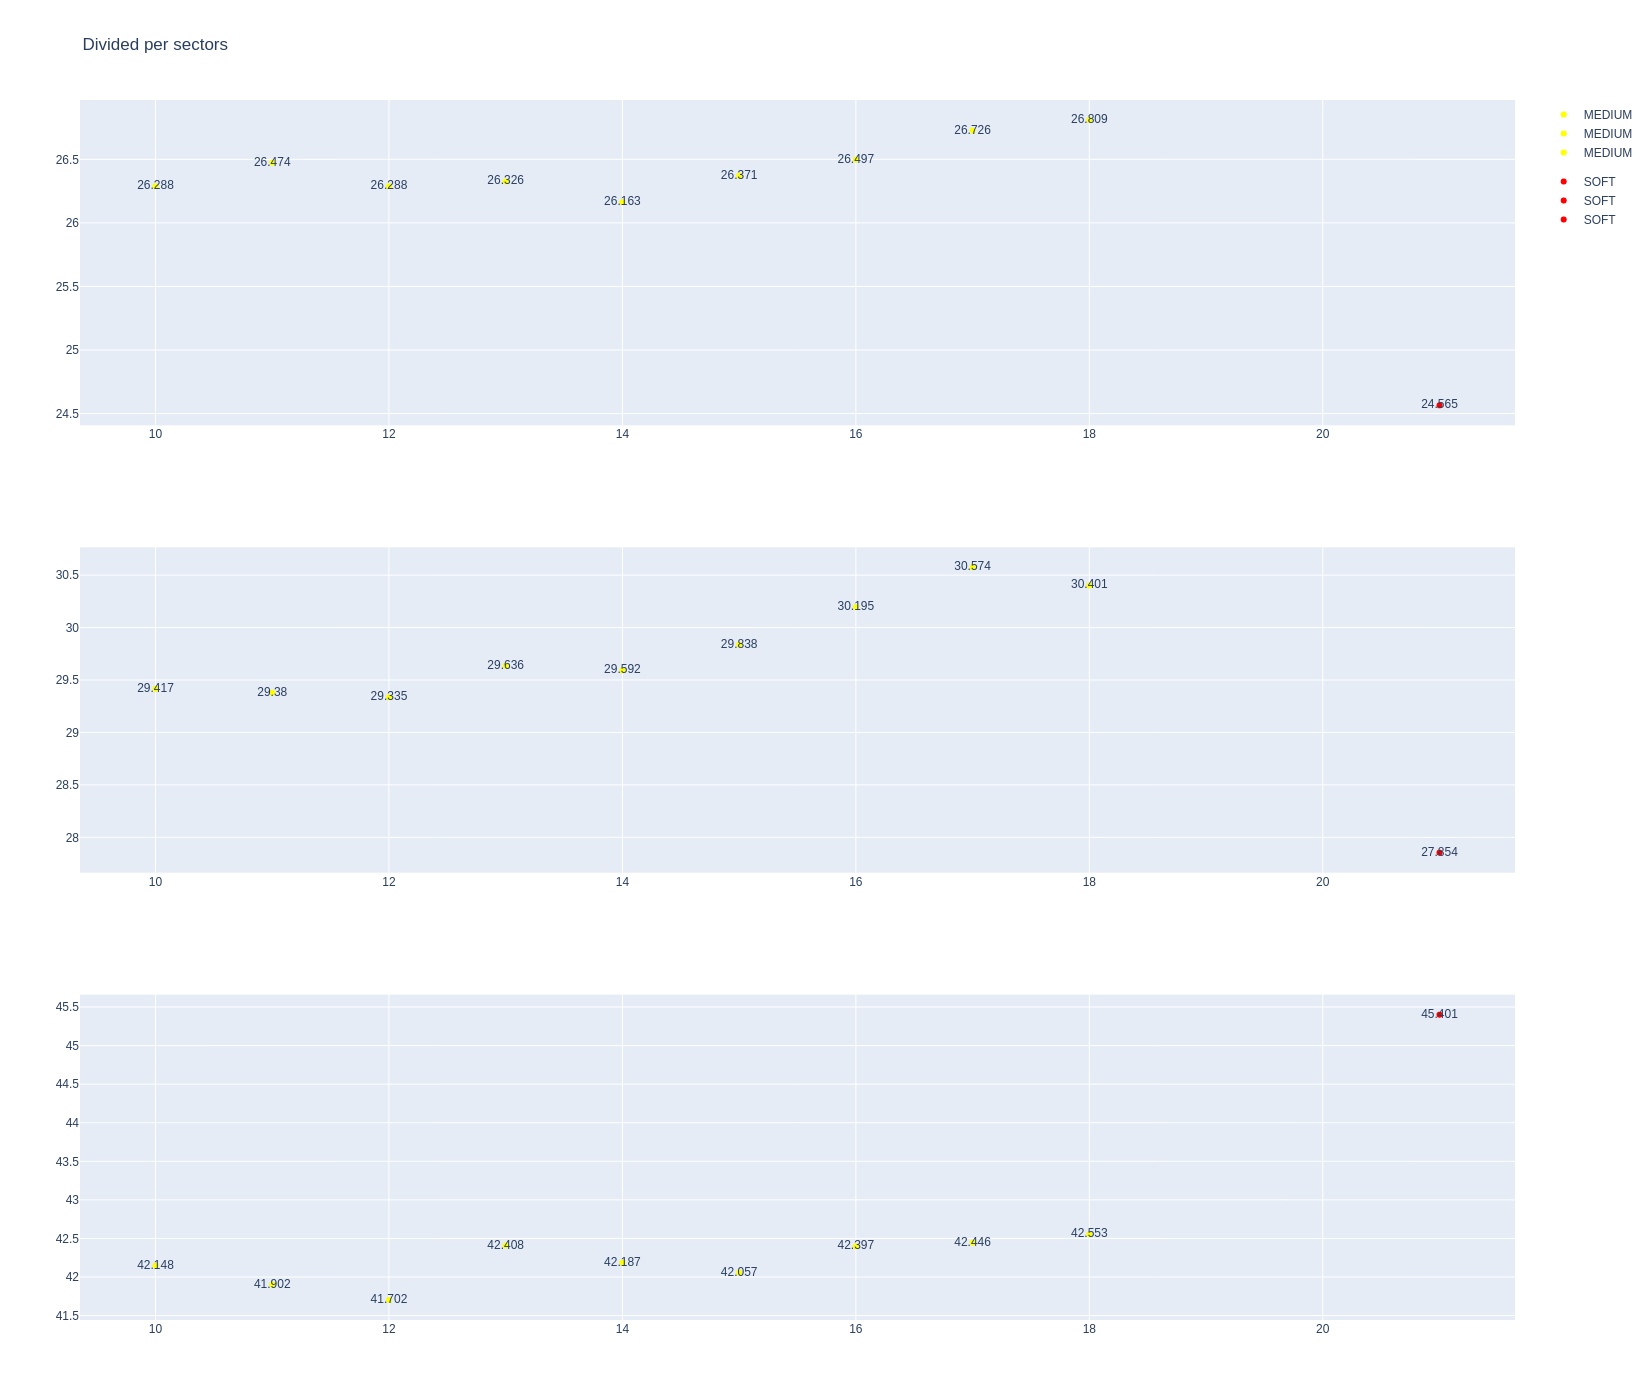

In [499]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [500]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
57   Liam LAWSON   MEDIUM  2025-03-21T03:35:43.893000+00:00           3   
261  Liam LAWSON   MEDIUM  2025-03-21T04:05:38.534000+00:00          12   
281  Liam LAWSON   MEDIUM  2025-03-21T04:07:17.625000+00:00          13   
300  Liam LAWSON   MEDIUM  2025-03-21T04:08:55.732000+00:00          14   
317  Liam LAWSON   MEDIUM  2025-03-21T04:10:33.711000+00:00          15   
332  Liam LAWSON   MEDIUM  2025-03-21T04:12:11.989000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
57              25.875             28.988             41.966        96.829  
261             26.581             29.818             42.734        99.133  
281             26.111             29.584             42.313        98.008  
300             26.350             29.422             42.318        98.090  
317             26.483             29.493             42.298        98.274  
332             26.295             29.419             42.260        97.974

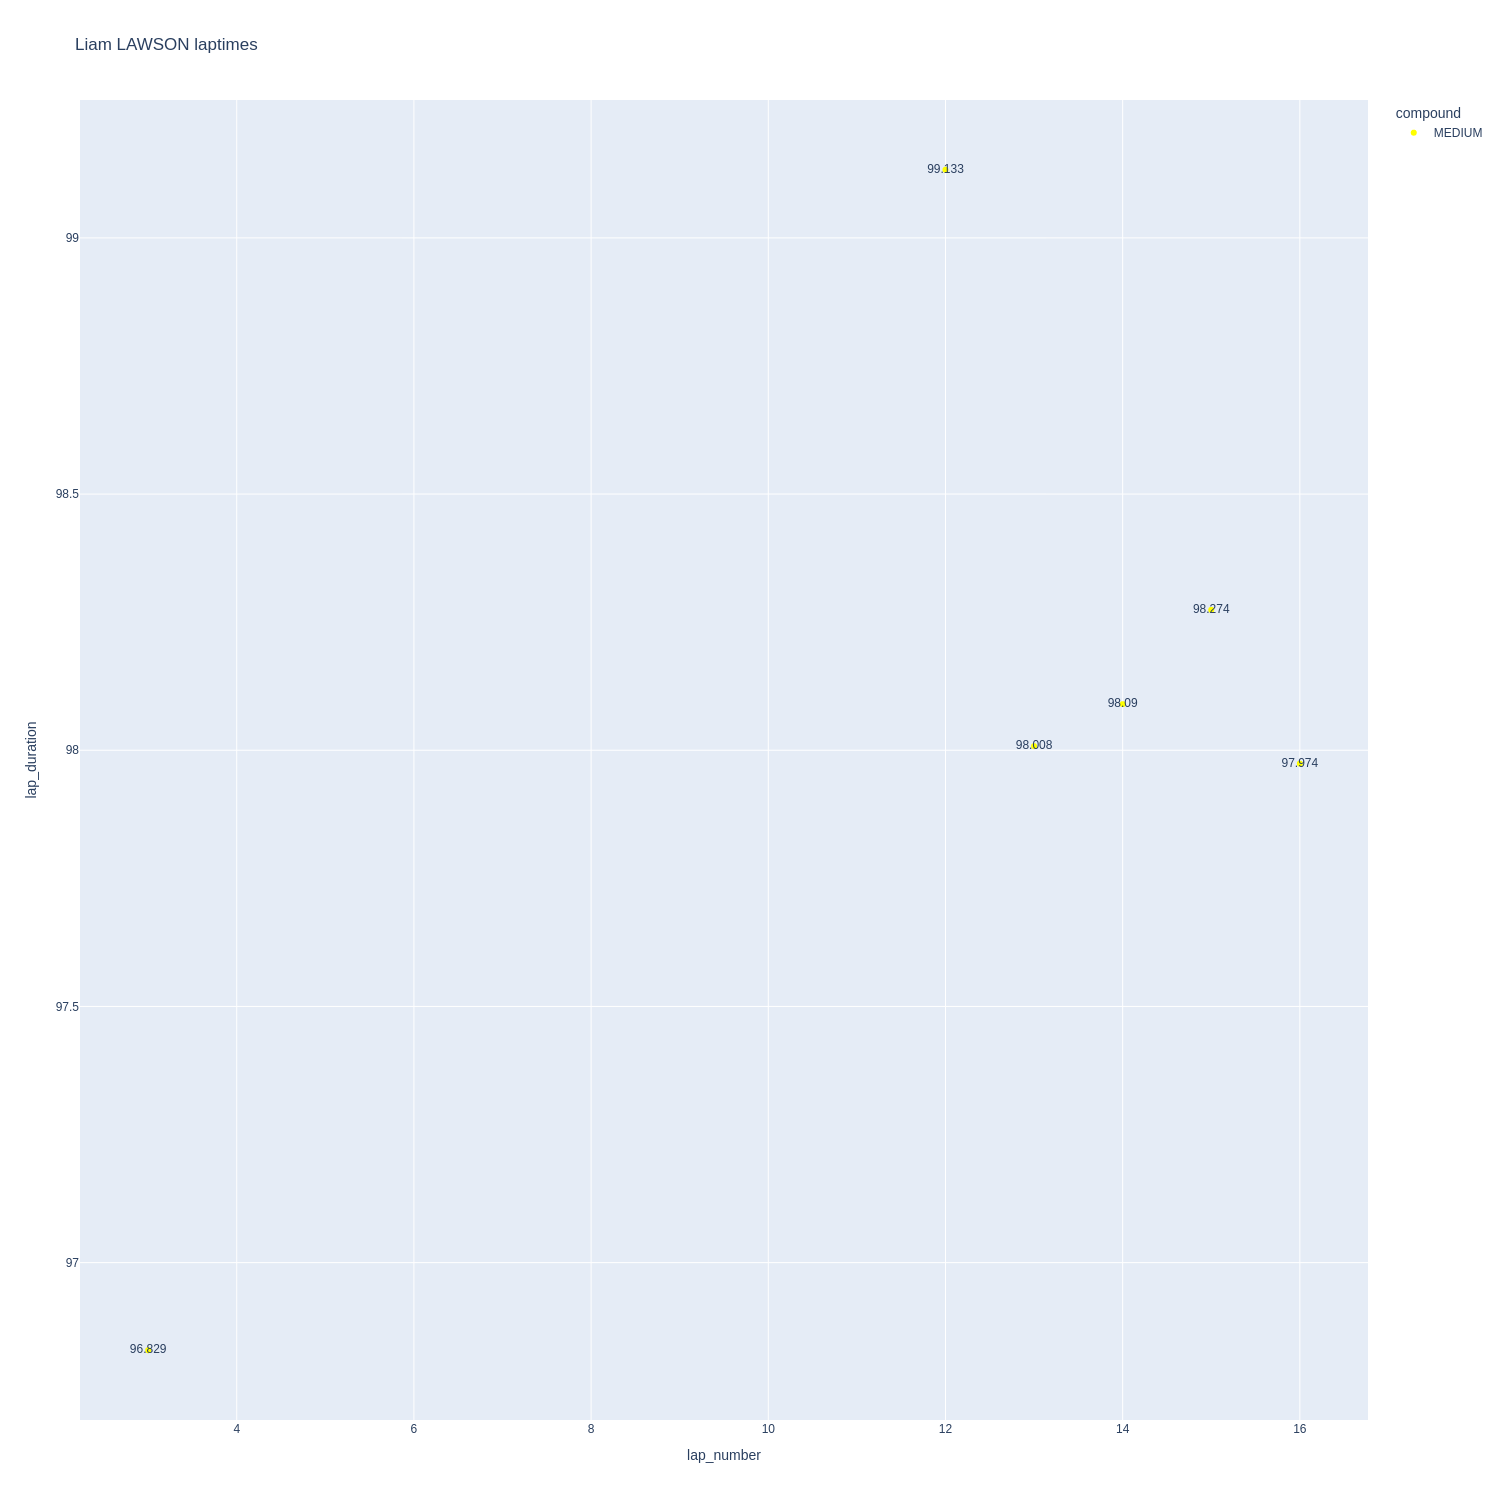

In [501]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

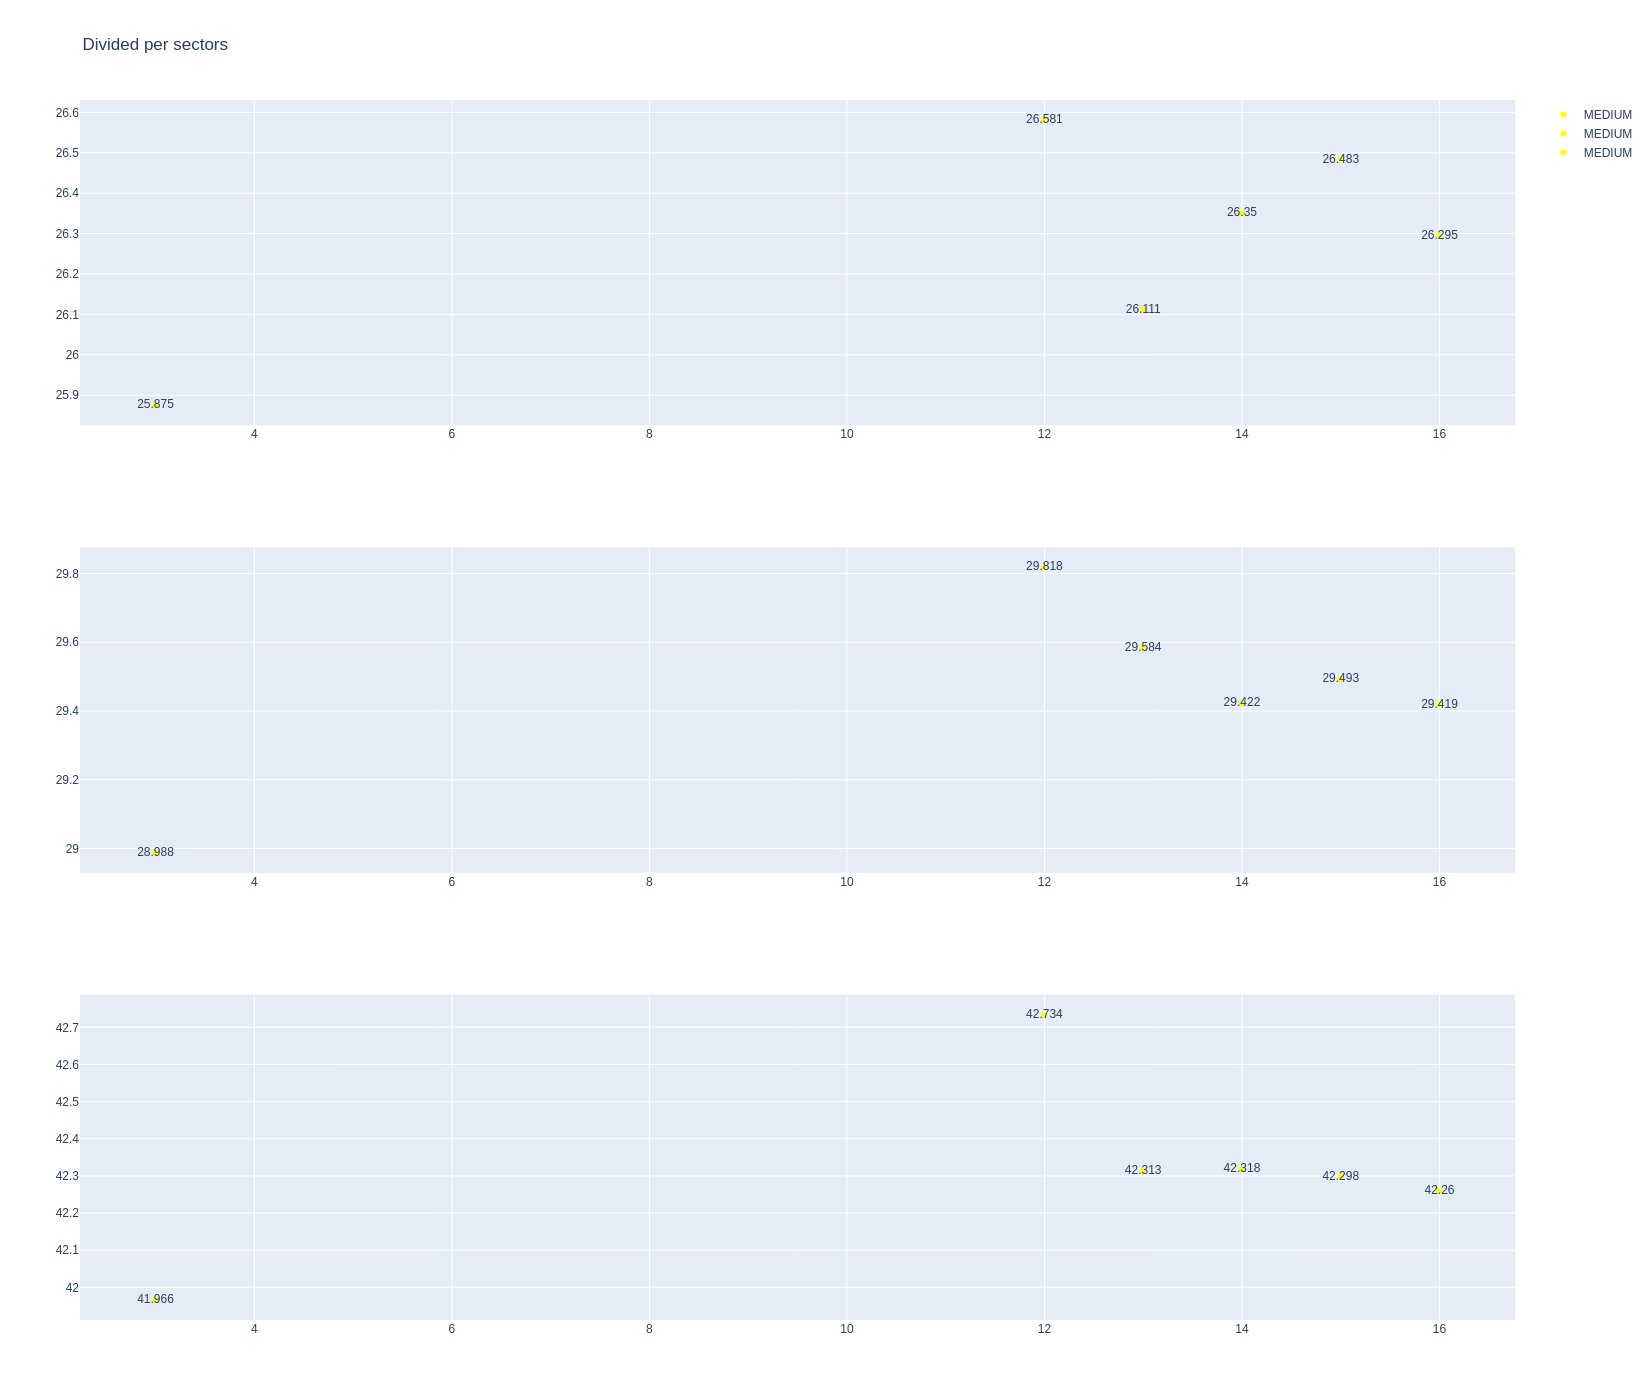

In [502]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [503]:
stintInformation.query('driver_number == 55 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
11         1255         9988             1             16          1       10   
17         1255         9988             1             55          1       11   
31         1255         9988             2             16         11       16   
37         1255         9988             2             55         12       12   
43         1255         9988             3             55         13       20   
46         1255         9988             3             16         17       22   
61         1255         9988             4             55         21       21   
64         1255         9988             5             55         21       25   
71         1255         9988             6             55         25       27   

   compound  tyre_age_at_start  
11   MEDIUM                  0  
17   MEDIUM                  0  
31   MEDIUM                  9  
37   MEDIUM                 10  
43   MEDIUM                 11  
46     SOFT                  0  
61   MEDIUM                 19  
64     SOFT                  0  
71   MEDIUM                 20

In [504]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
30  Charles LECLERC   MEDIUM  2025-03-21T03:33:24.548000+00:00           2   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
30             26.115             28.488             41.878        96.481

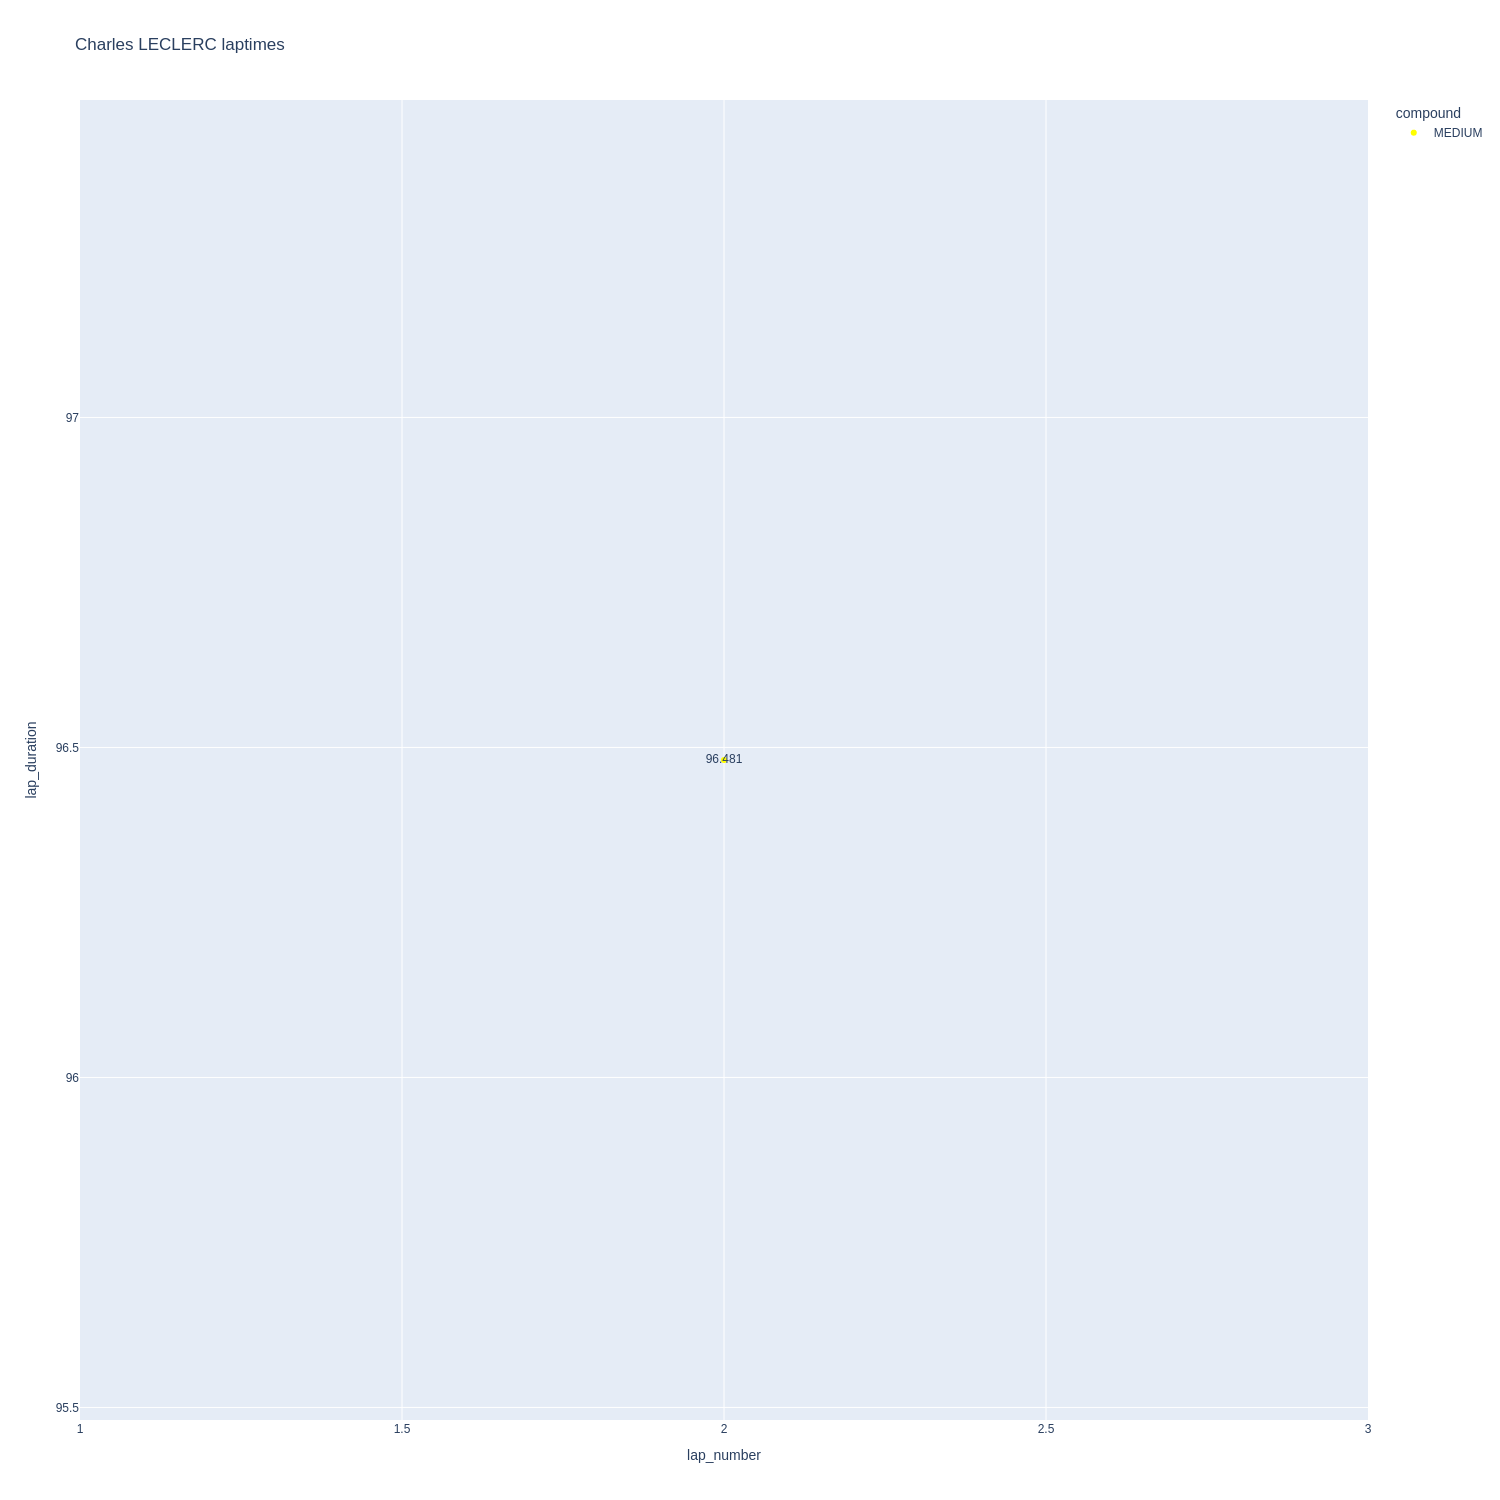

In [505]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

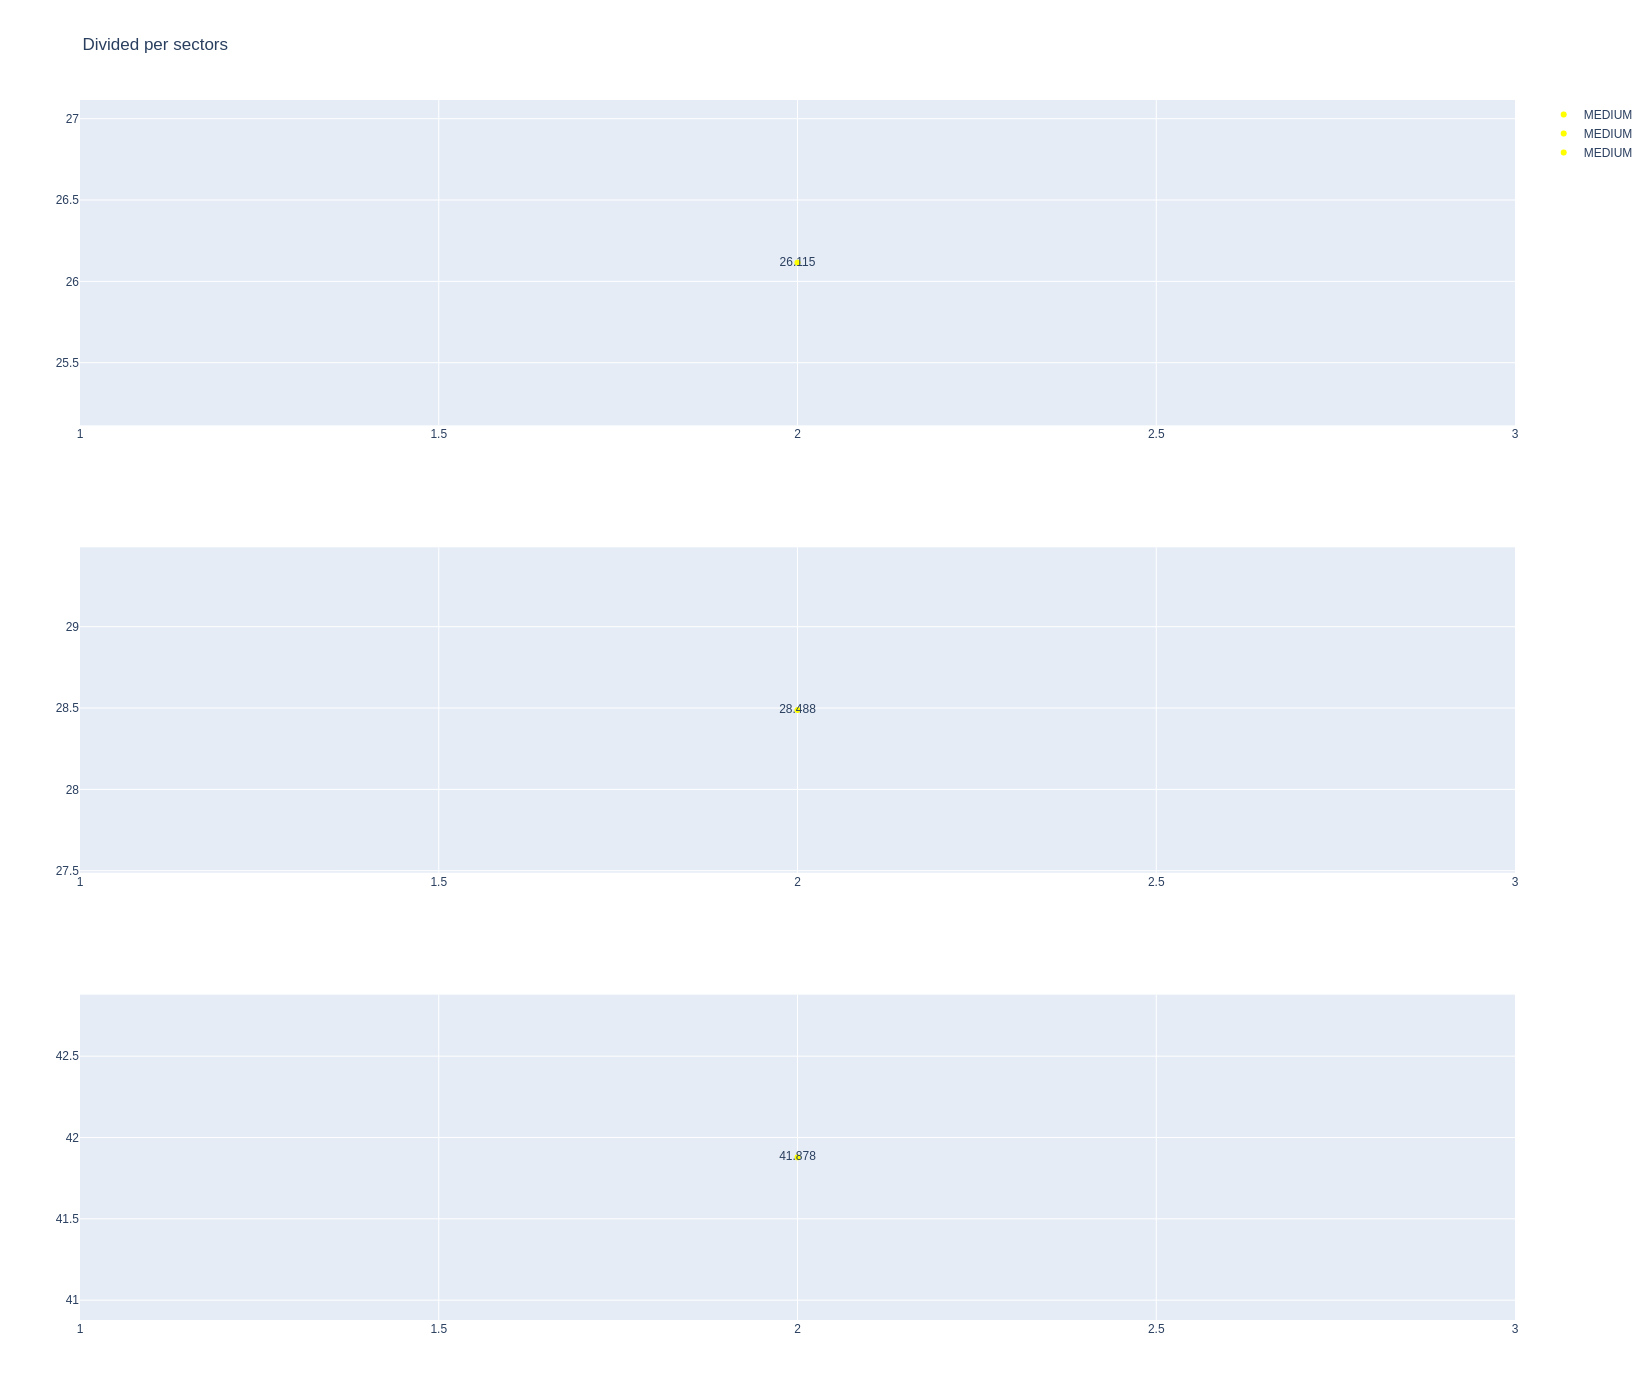

In [506]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [507]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
257  Lewis HAMILTON   MEDIUM  2025-03-21T04:05:16.434000+00:00          13   
296  Lewis HAMILTON   MEDIUM  2025-03-21T04:08:35.072000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
257             24.788             28.066             43.693        96.547  
296             26.743             29.957             42.515        99.215

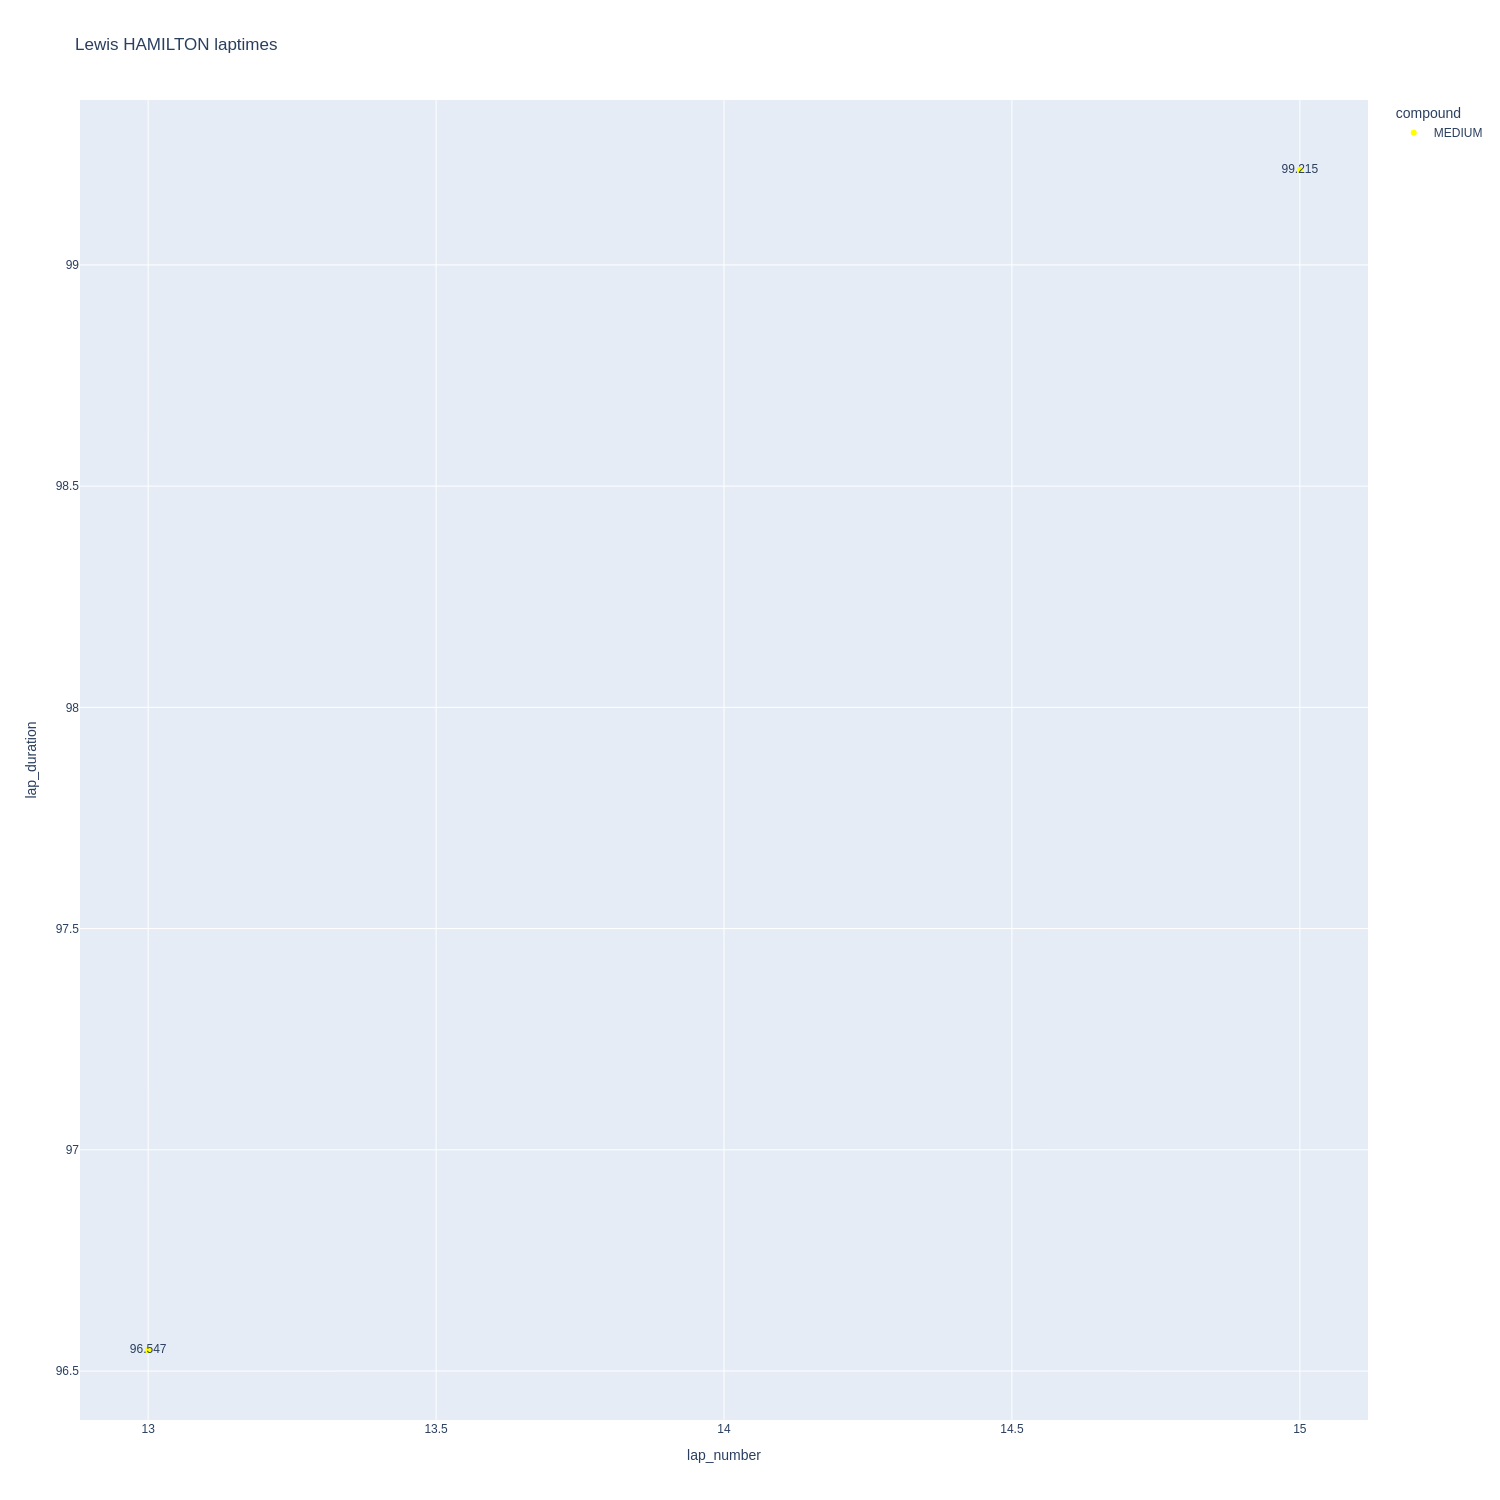

In [508]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

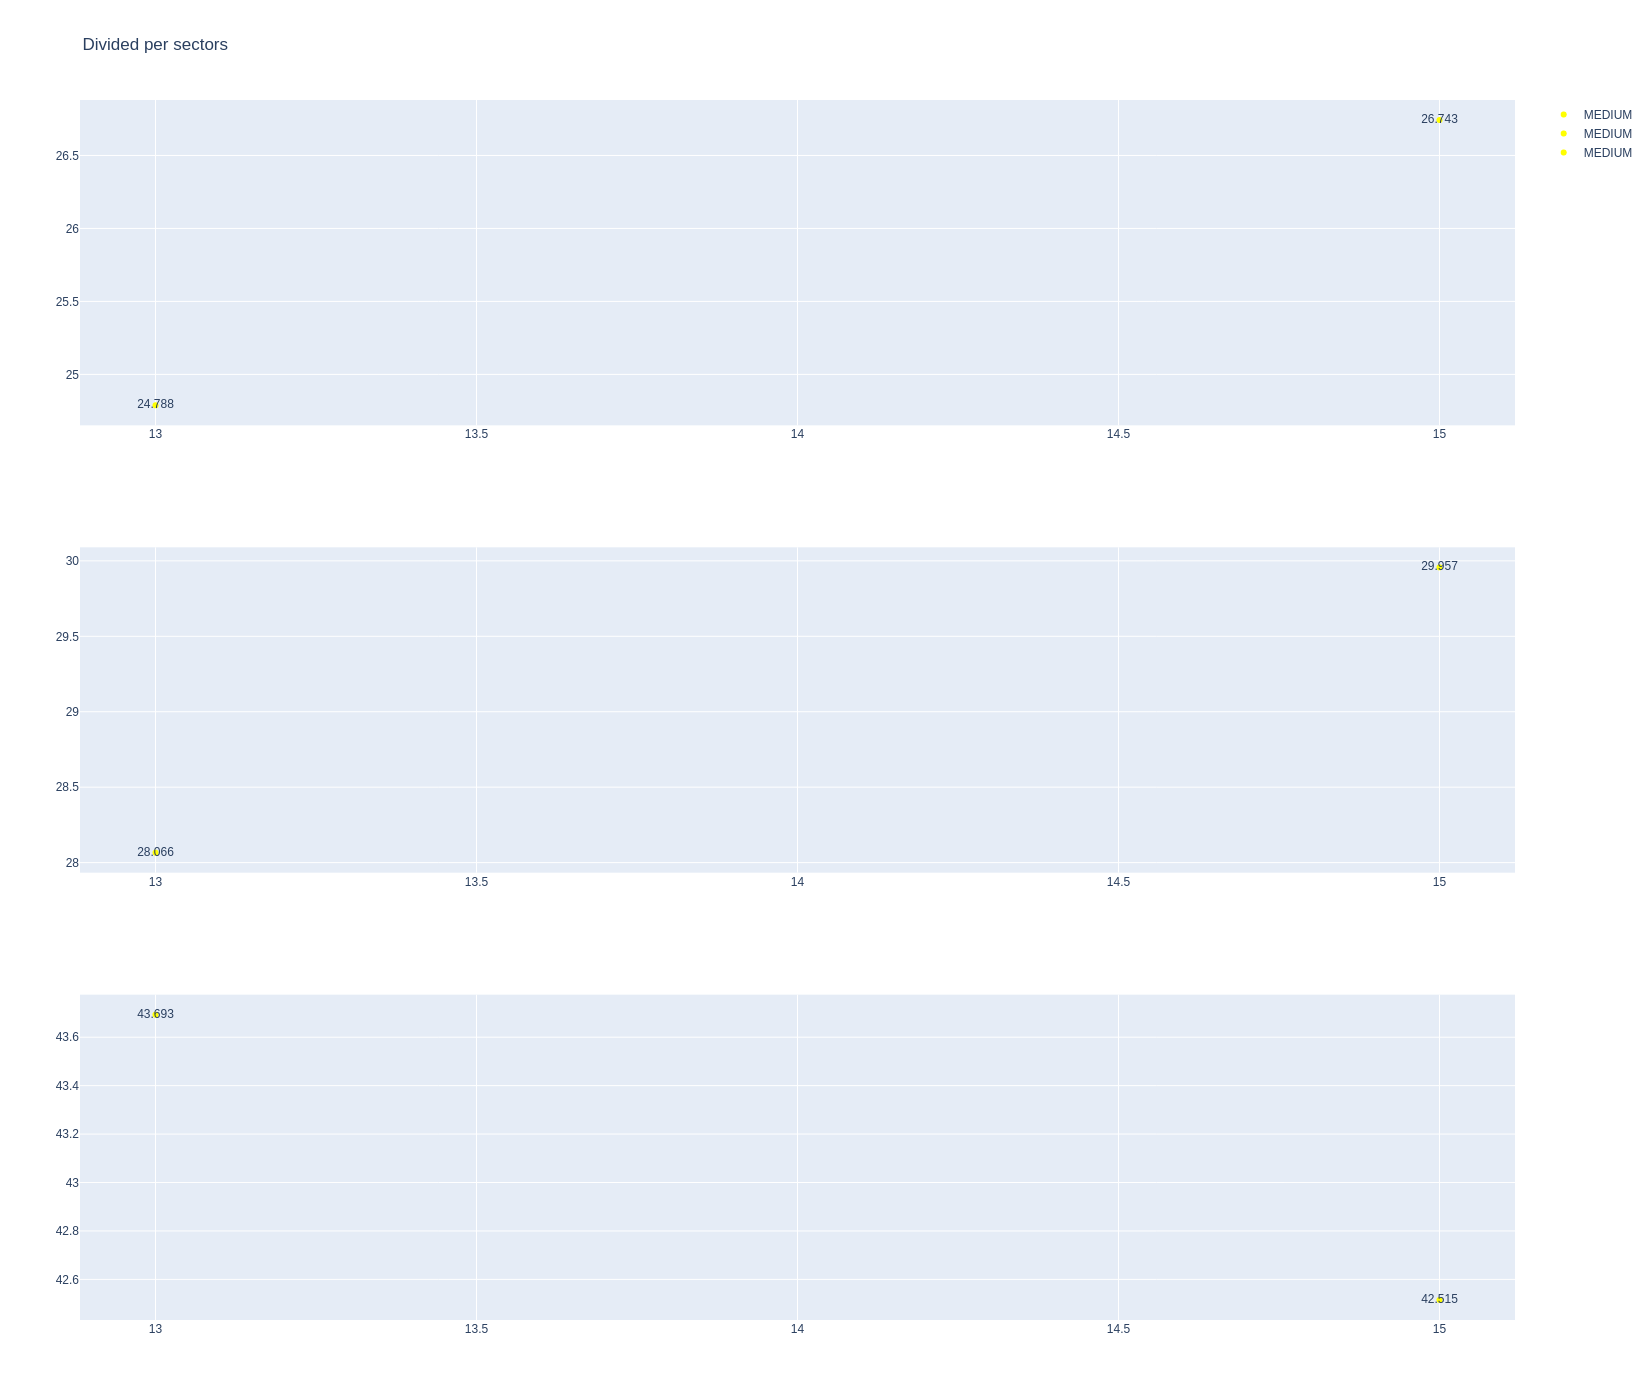

In [509]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [510]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1255         9988             1             12          1       10   
18         1255         9988             1             63          1       11   
36         1255         9988             2             12         11       23   
42         1255         9988             2             63         12       21   
67         1255         9988             3             63         22       24   
69         1255         9988             3             12         23       25   
72         1255         9988             4             63         25       27   
73         1255         9988             4             12         26       28   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
18   MEDIUM                  0  
36   MEDIUM                  9  
42   MEDIUM                 10  
67     SOFT                  0  
69     SOFT                  0  
72   MEDIUM                 20  
73   MEDIUM                 21

In [511]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
278  George RUSSELL   MEDIUM  2025-03-21T04:06:53.883000+00:00          16   
295  George RUSSELL   MEDIUM  2025-03-21T04:08:31.558000+00:00          17   
312  George RUSSELL   MEDIUM  2025-03-21T04:10:08.802000+00:00          18   
329  George RUSSELL   MEDIUM  2025-03-21T04:11:46.634000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
278             25.923             30.151             41.509        97.583  
295             26.176             29.543             41.534        97.253  
312             26.351             29.677             41.790        97.818  
329             26.435             29.785             41.908        98.128

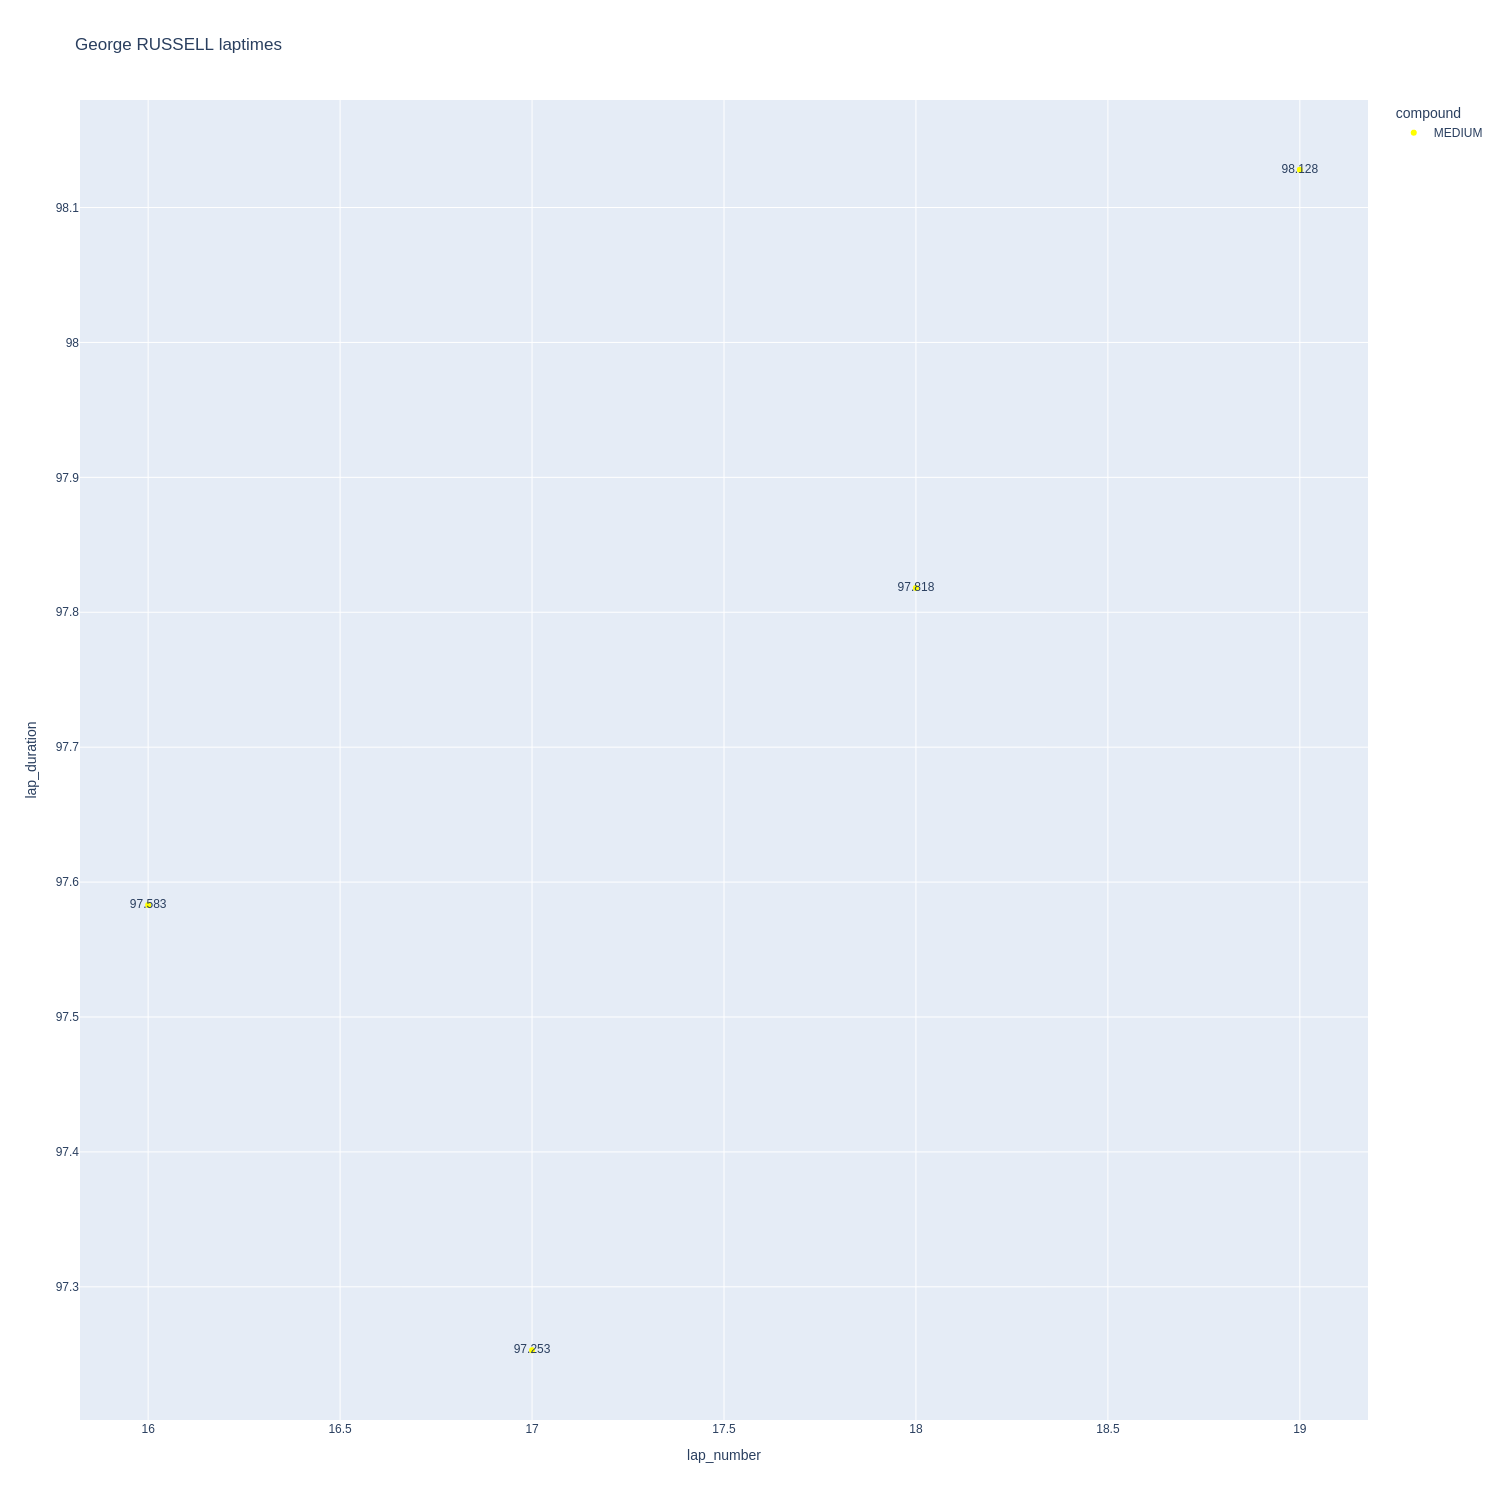

In [512]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

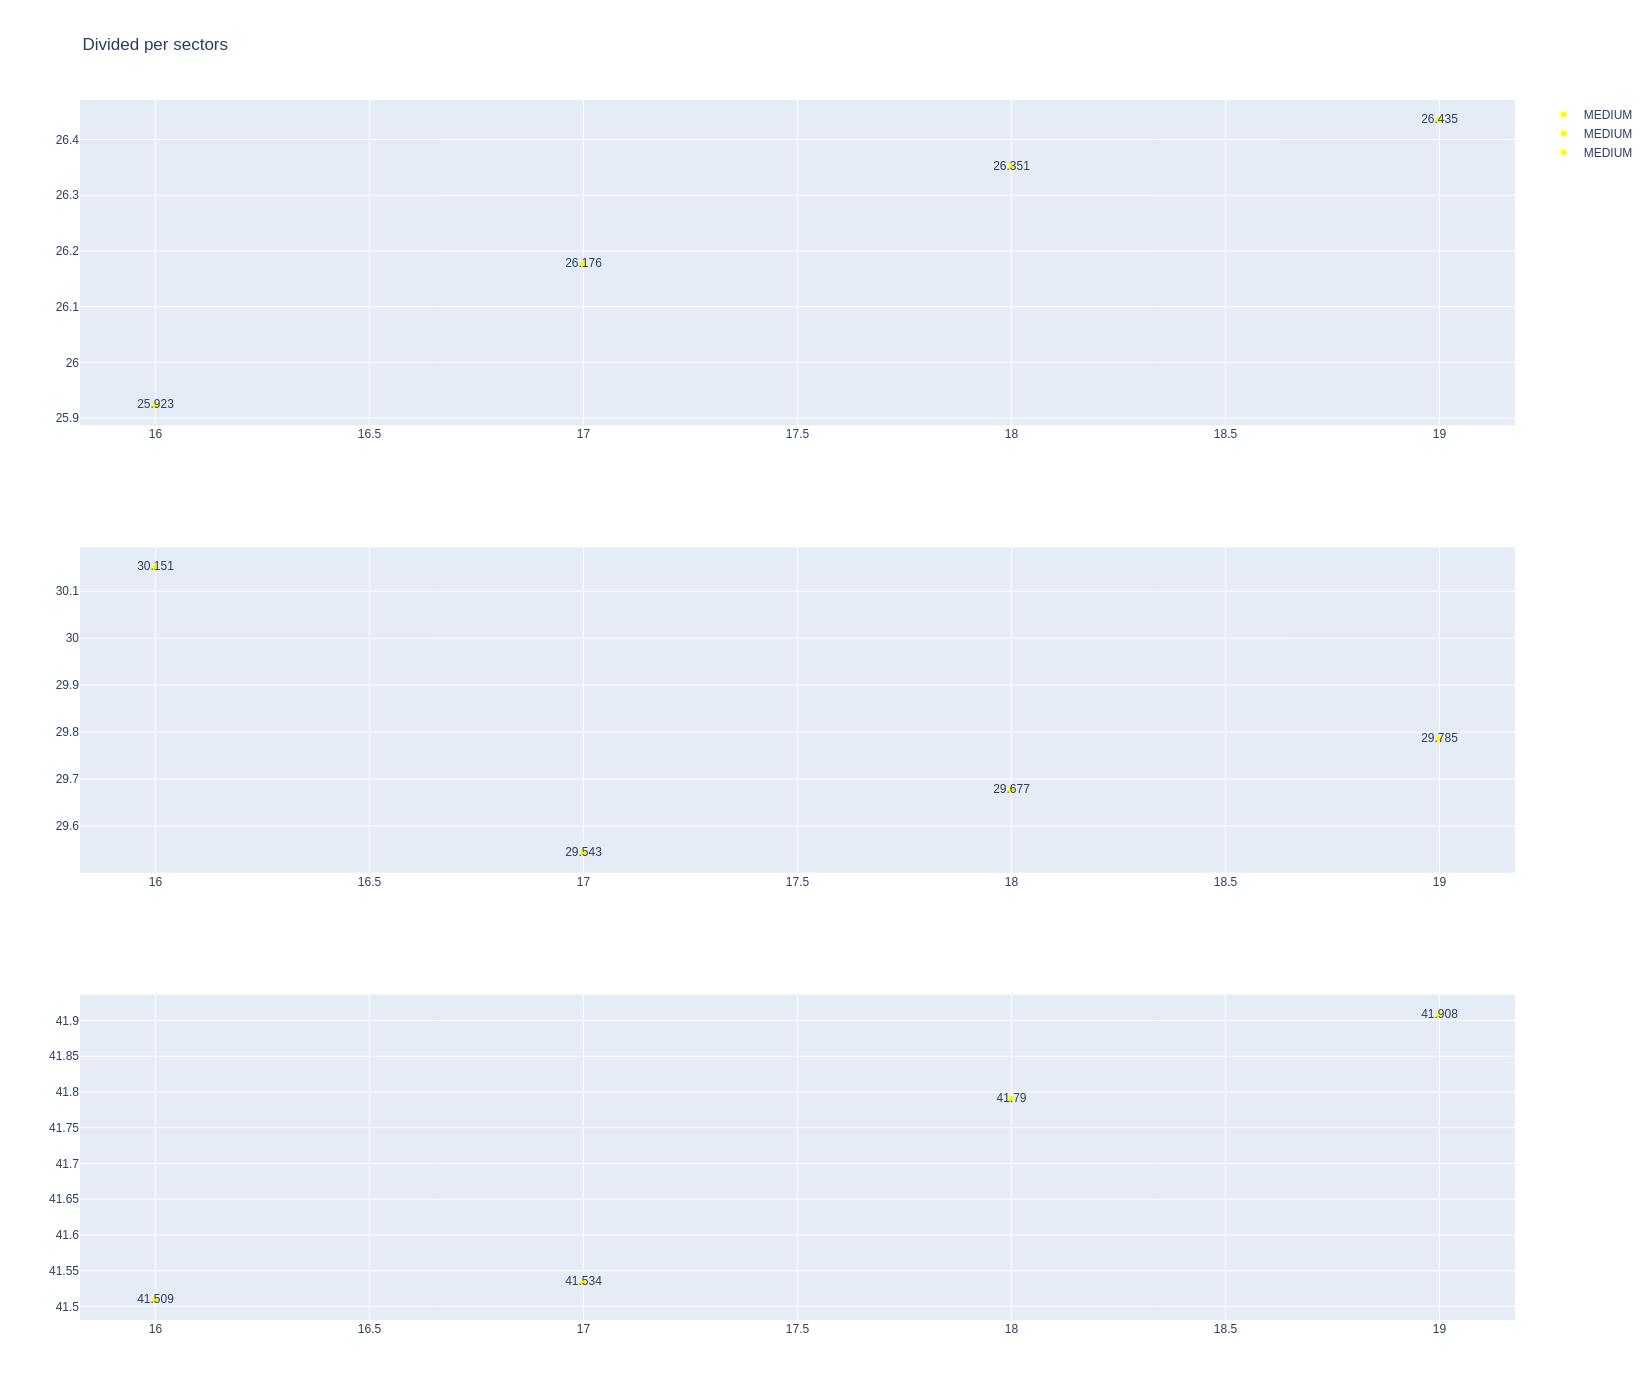

In [513]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [514]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  \
53   Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T03:35:18.893000+00:00   
184  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T03:57:07.102000+00:00   
195  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T03:58:43.369000+00:00   
205  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T04:00:19.837000+00:00   
219  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T04:01:56.629000+00:00   
238  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T04:03:33.745000+00:00   
256  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T04:05:10.578000+00:00   
276  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T04:06:47.441000+00:00   
294  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T04:08:24.589000+00:00   
311  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T04:10:02.111000+00:00   
328  Andrea Kimi ANTONELLI   MEDIUM  2025-03-21T04:11:40.629000+00:00   

     lap_number  duration_sector_1  duration_sector_2  duration_sector_3  \
53            3             25.849             29.234             41.185   
184          11             25.614             29.257             41.358   
195          12             25.782             29.298             41.431   
205          13             25.870             29.421             41.507   
219          14             26.024             29.534             41.498   
238          15             26.026             29.394             41.540   
256          16             25.961             29.392             41.408   
276          17             25.980             29.556             41.638   
294          18             26.271             29.560             41.649   
311          19             26.394             30.055             42.137   
328          20             26.734             30.107             42.025   

     lap_duration  
53         96.268  
184        96.229  
195        96.511  
205        96.798  
219        97.056  
238        96.960  
256        96.761  
276        97.174  
294        97.480  
311        98.586  
328        98.866

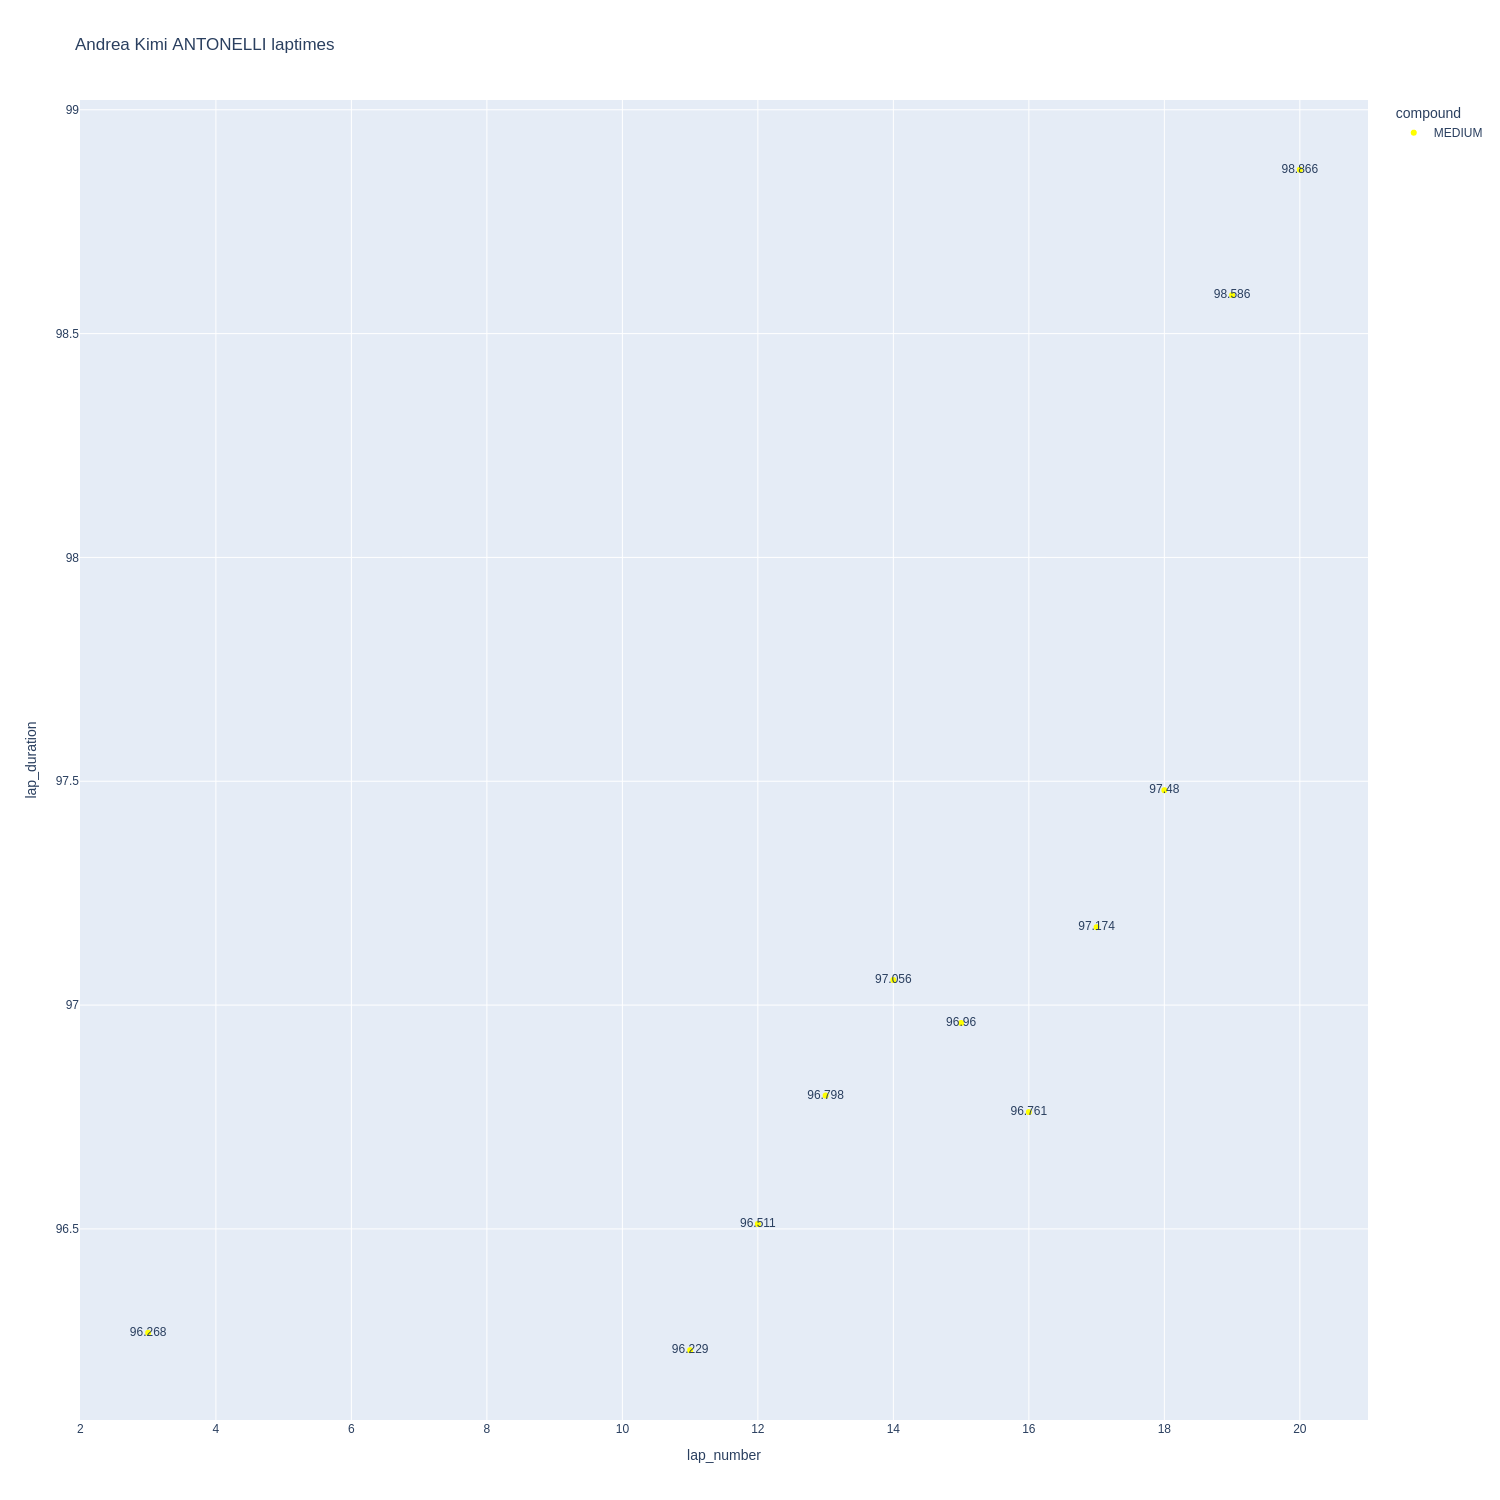

In [515]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

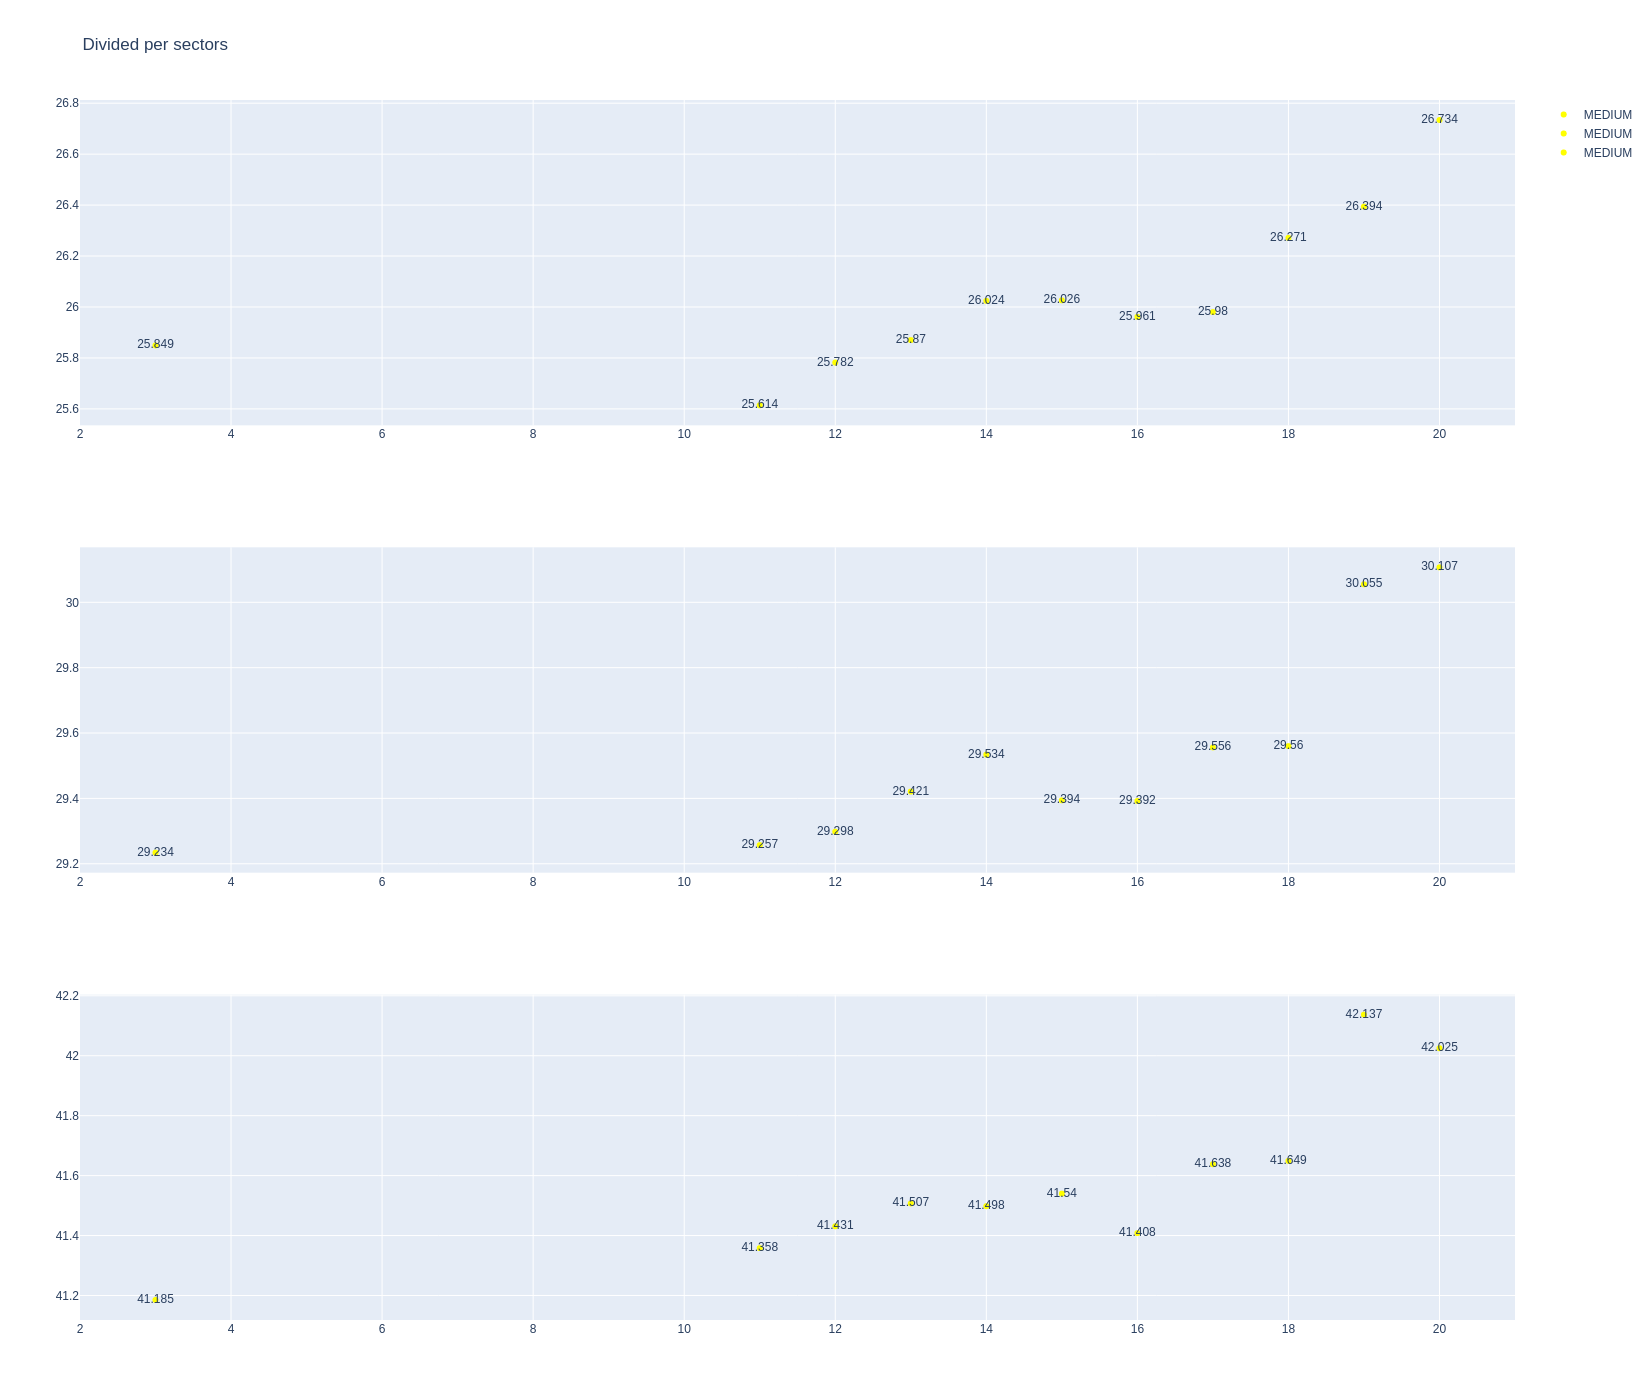

In [516]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [517]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1255         9988             1              4          1        8   
8          1255         9988             1             81          1        9   
26         1255         9988             2              4          9       19   
29         1255         9988             2             81         10       19   
52         1255         9988             3              4         19       24   
60         1255         9988             3             81         20       25   

   compound  tyre_age_at_start  
4    MEDIUM                  0  
8    MEDIUM                  0  
26   MEDIUM                  7  
29   MEDIUM                  8  
52     SOFT                  0  
60     SOFT                  0

In [518]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
31   Lando NORRIS   MEDIUM  2025-03-21T03:33:29.892000+00:00           2   
274  Lando NORRIS   MEDIUM  2025-03-21T04:06:38.427000+00:00          12   
293  Lando NORRIS   MEDIUM  2025-03-21T04:08:15.064000+00:00          13   
310  Lando NORRIS   MEDIUM  2025-03-21T04:09:51.442000+00:00          14   
327  Lando NORRIS   MEDIUM  2025-03-21T04:11:28.669000+00:00          15   
339  Lando NORRIS   MEDIUM  2025-03-21T04:13:05.660000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
31              25.531             28.700             41.916        96.147  
274             25.801             29.034             41.778        96.613  
293             26.635             28.697             41.035        96.367  
310             26.029             29.231             41.932        97.192  
327             26.337             29.281             41.420        97.038  
339             26.430             29.684             41.524        97.638

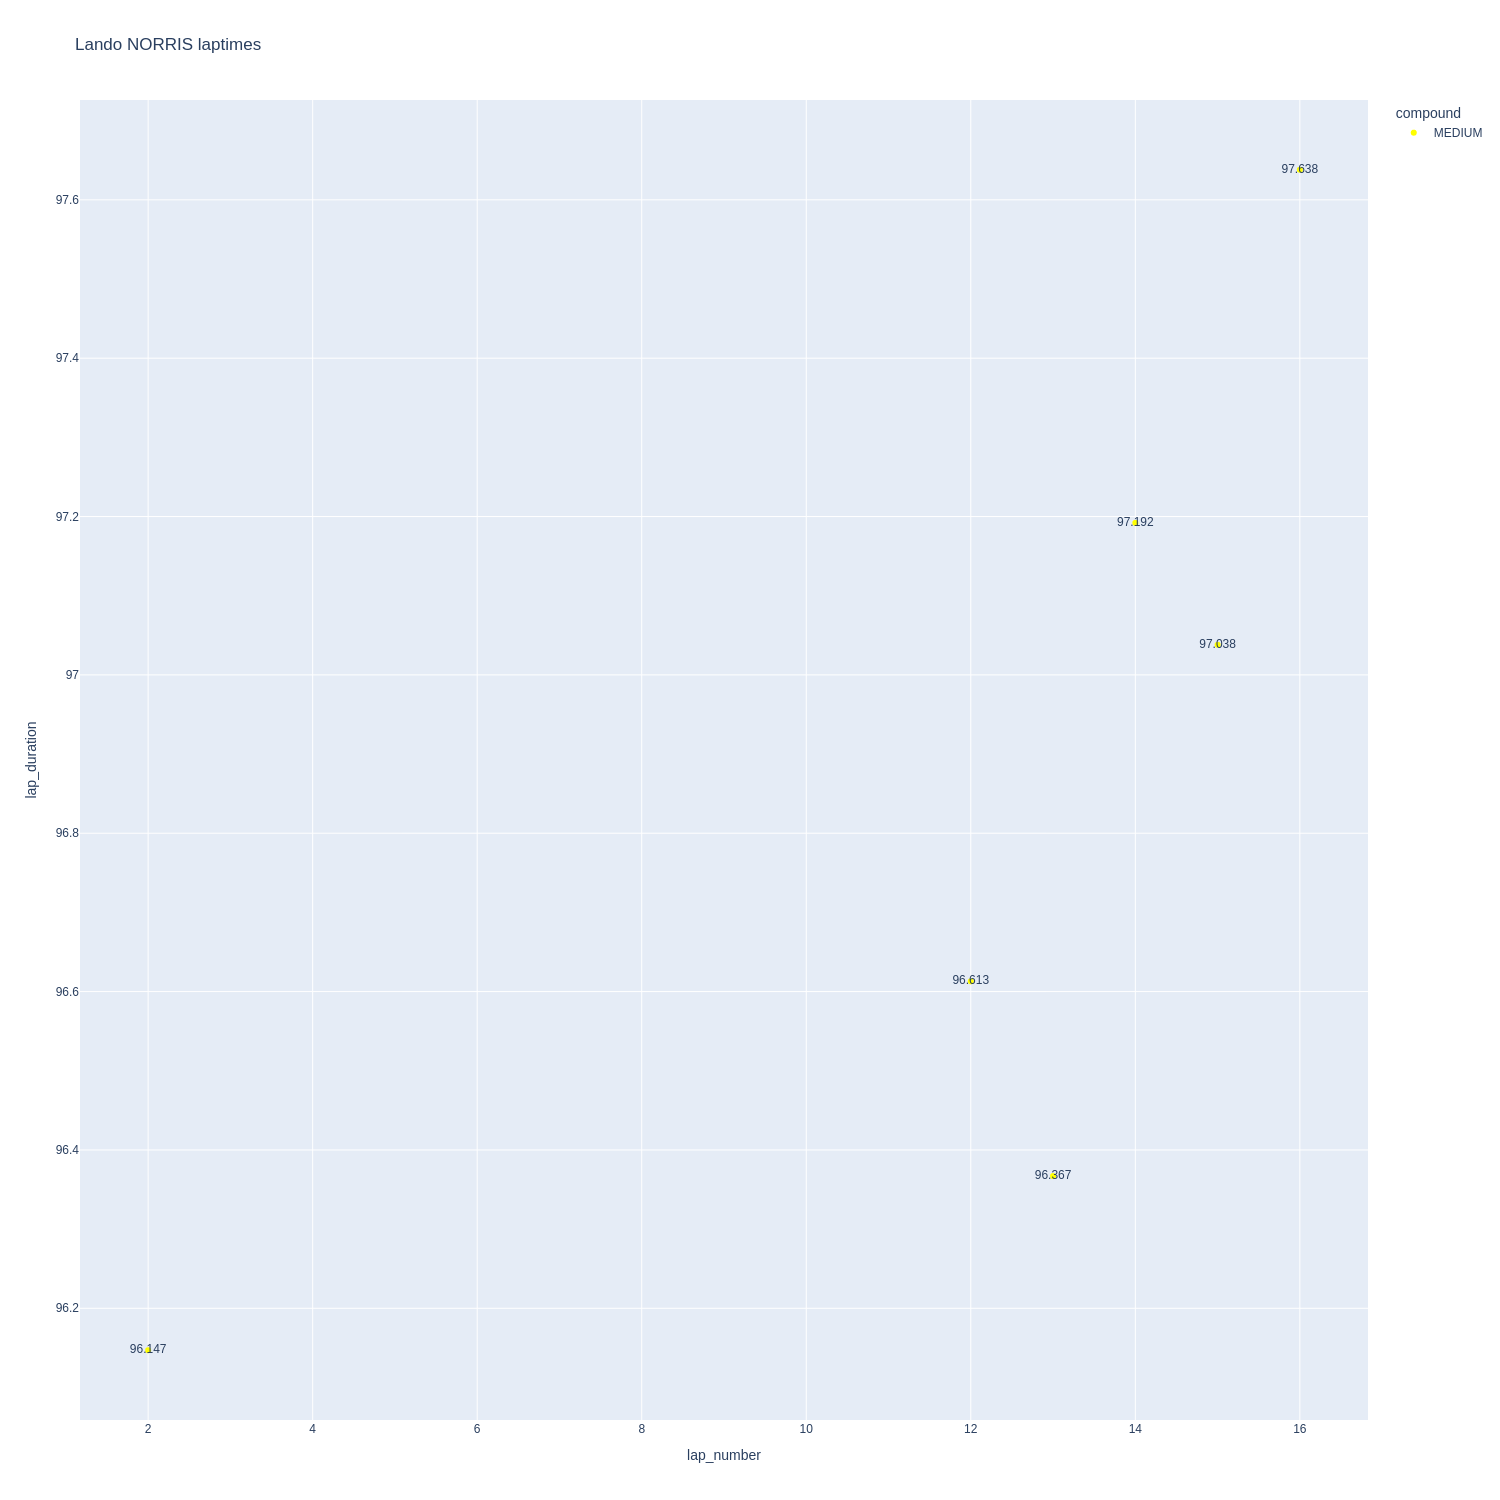

In [519]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

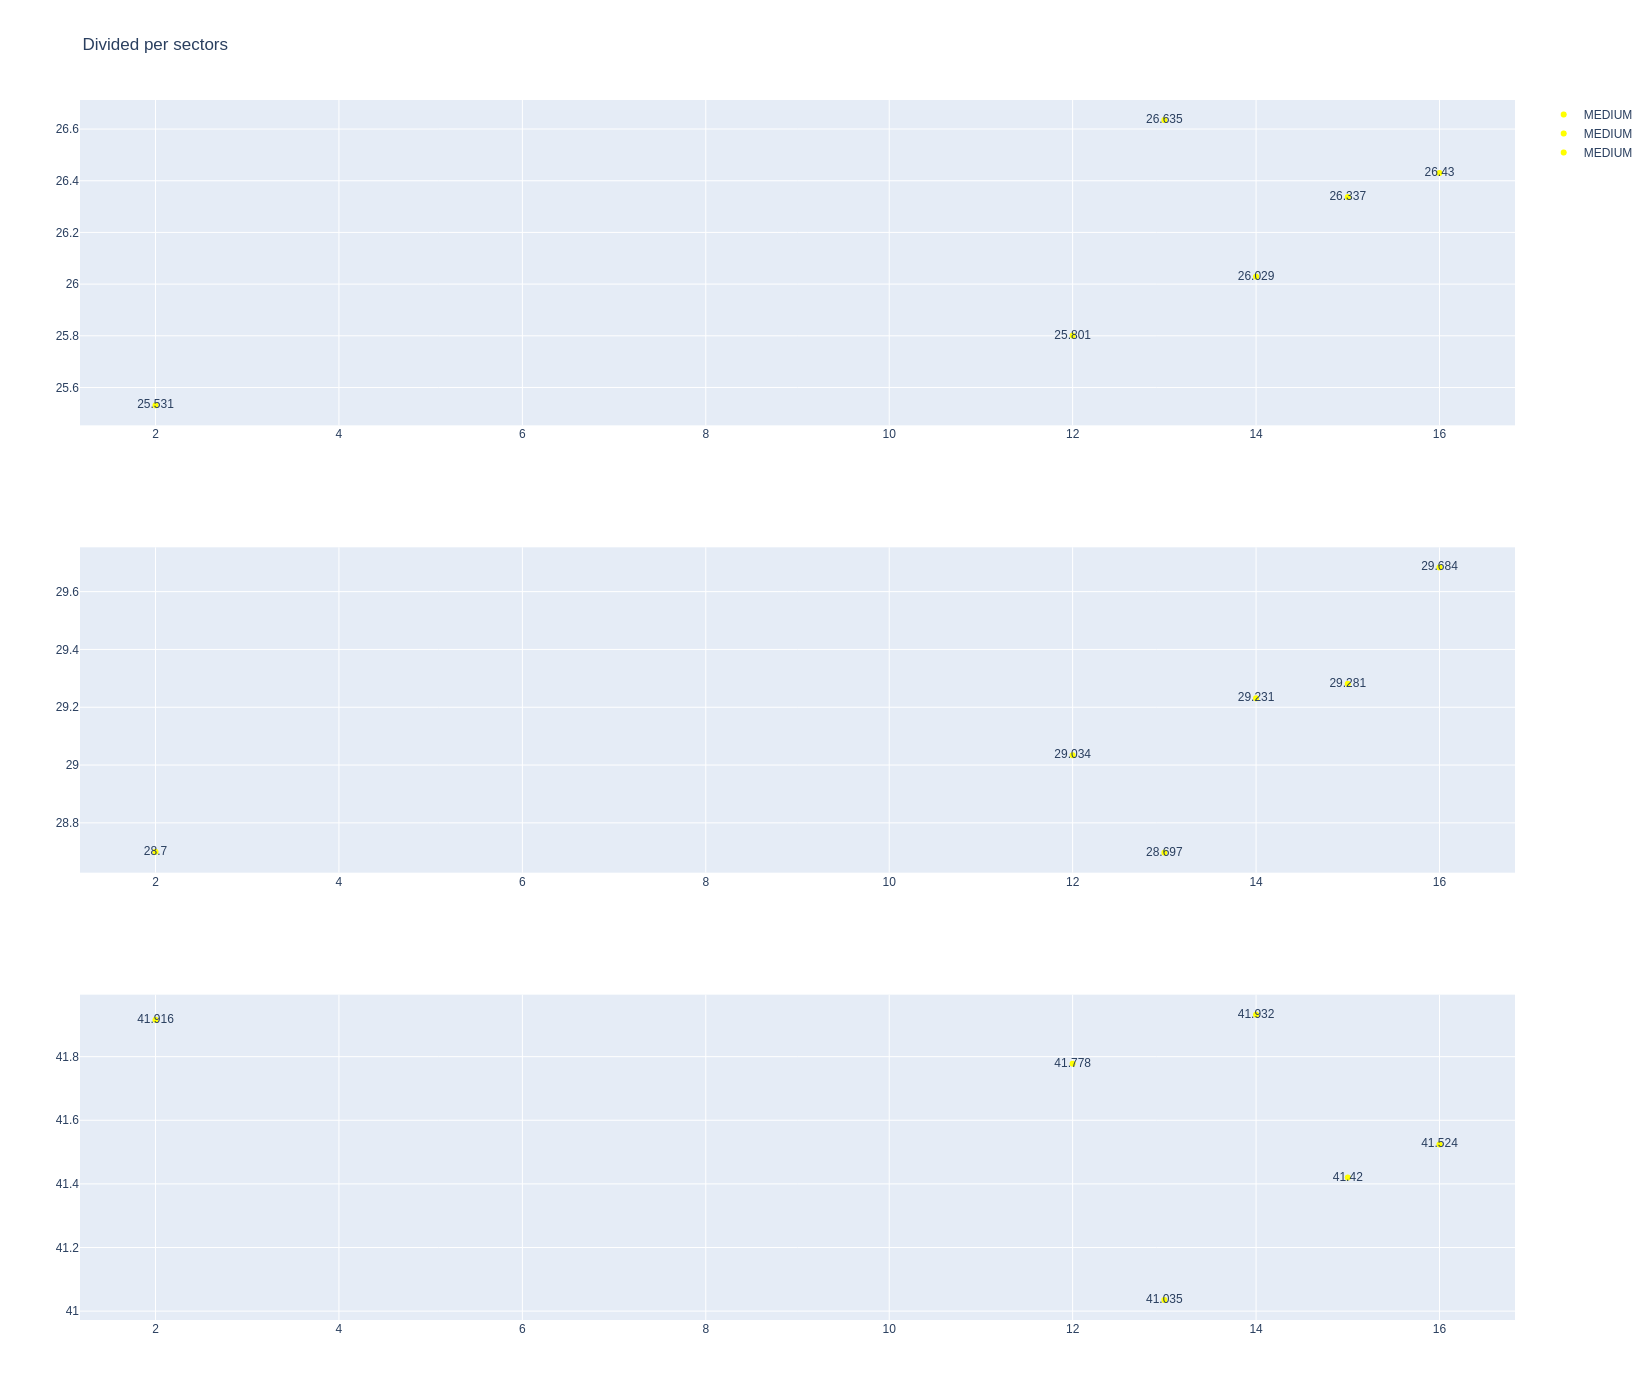

In [520]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [521]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
285  Oscar PIASTRI   MEDIUM  2025-03-21T04:07:38.557000+00:00          13   
303  Oscar PIASTRI   MEDIUM  2025-03-21T04:09:15.007000+00:00          14   
320  Oscar PIASTRI   MEDIUM  2025-03-21T04:10:52.099000+00:00          15   
334  Oscar PIASTRI   MEDIUM  2025-03-21T04:12:29.497000+00:00          16   
345  Oscar PIASTRI   MEDIUM  2025-03-21T04:14:06.316000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
285             25.495             29.349             41.641        96.485  
303             25.958             29.476             41.658        97.092  
320             26.261             29.652             41.450        97.363  
334             26.015             29.446             41.360        96.821  
345             25.816             29.382             41.636        96.834

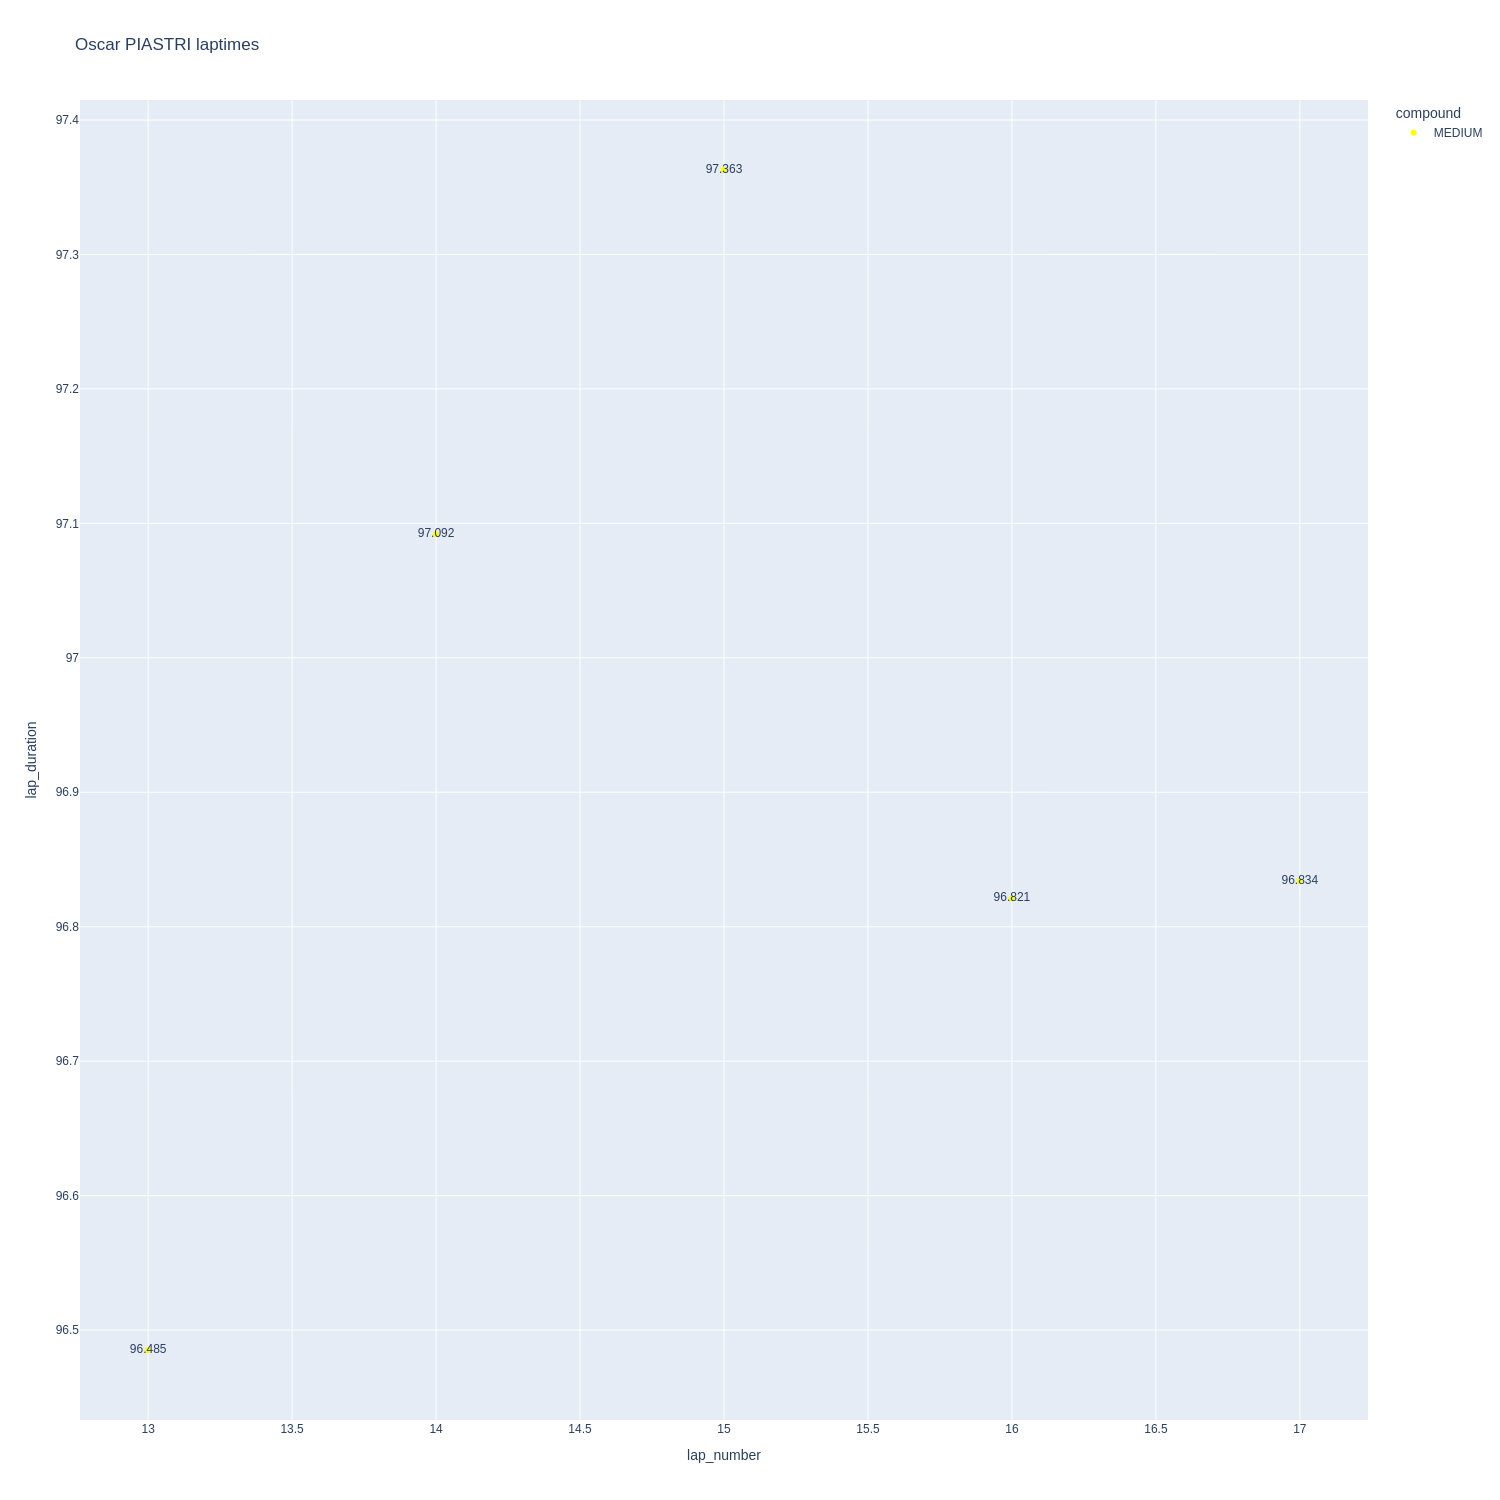

In [522]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

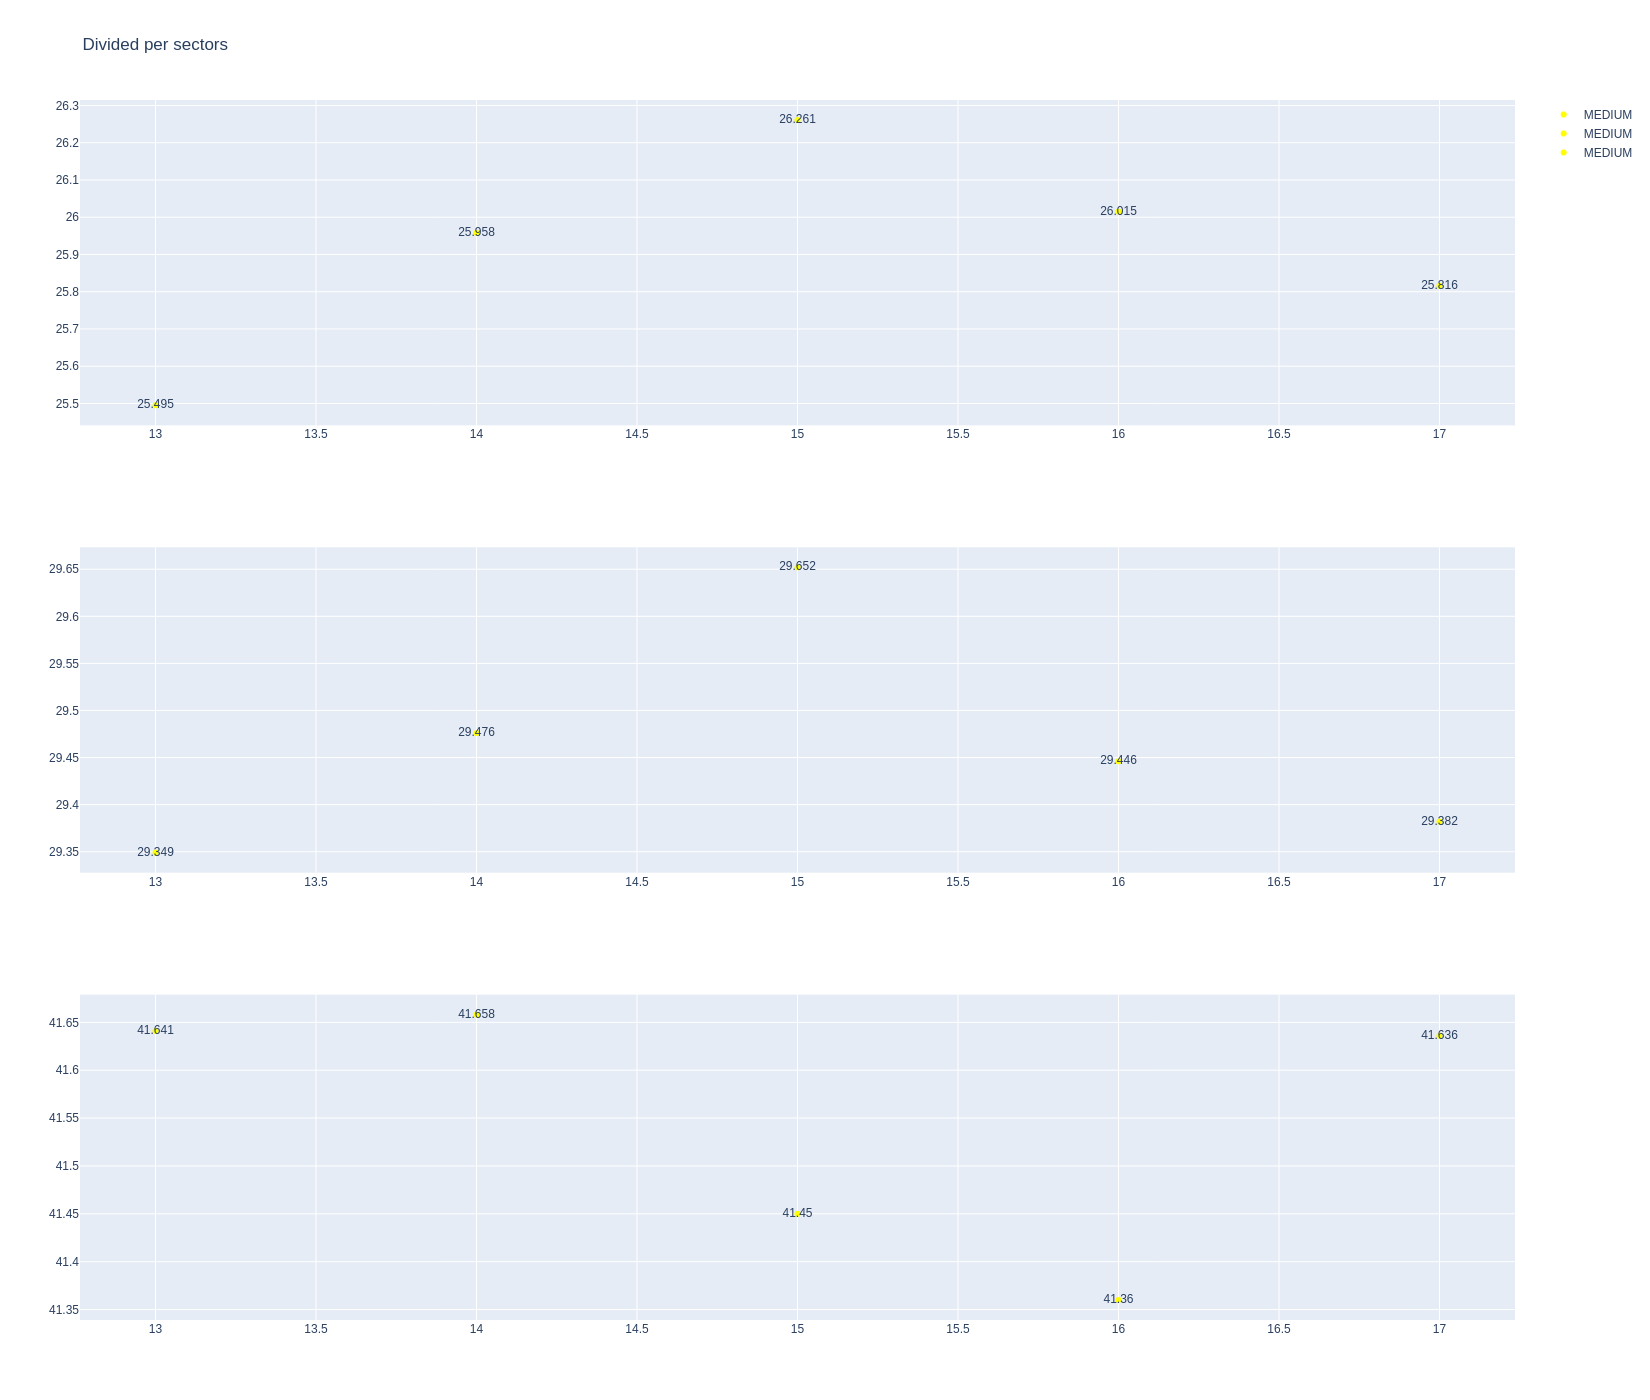

In [523]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [524]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1255         9988             1             14          1        6   
1          1255         9988             1             18          1        6   
20         1255         9988             2             14          7        9   
21         1255         9988             2             18          7        9   
27         1255         9988             3             18         10       16   
28         1255         9988             3             14         10       18   
45         1255         9988             4             18         17       20   
51         1255         9988             4             14         19       21   
66         1255         9988             5             14         22       24   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
1    MEDIUM                  0  
20   MEDIUM                  5  
21   MEDIUM                  5  
27   MEDIUM                  8  
28   MEDIUM                  8  
45     SOFT                  0  
51     SOFT                  0  
66   MEDIUM                 17

In [525]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
279  Fernando ALONSO   MEDIUM  2025-03-21T04:06:59.821000+00:00          14   
297  Fernando ALONSO   MEDIUM  2025-03-21T04:08:38.054000+00:00          15   
314  Fernando ALONSO   MEDIUM  2025-03-21T04:10:14.656000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
279             25.841             29.188             43.772        98.801  
297             25.672             29.154             41.692        96.518  
314             25.450             29.130             41.803        96.383

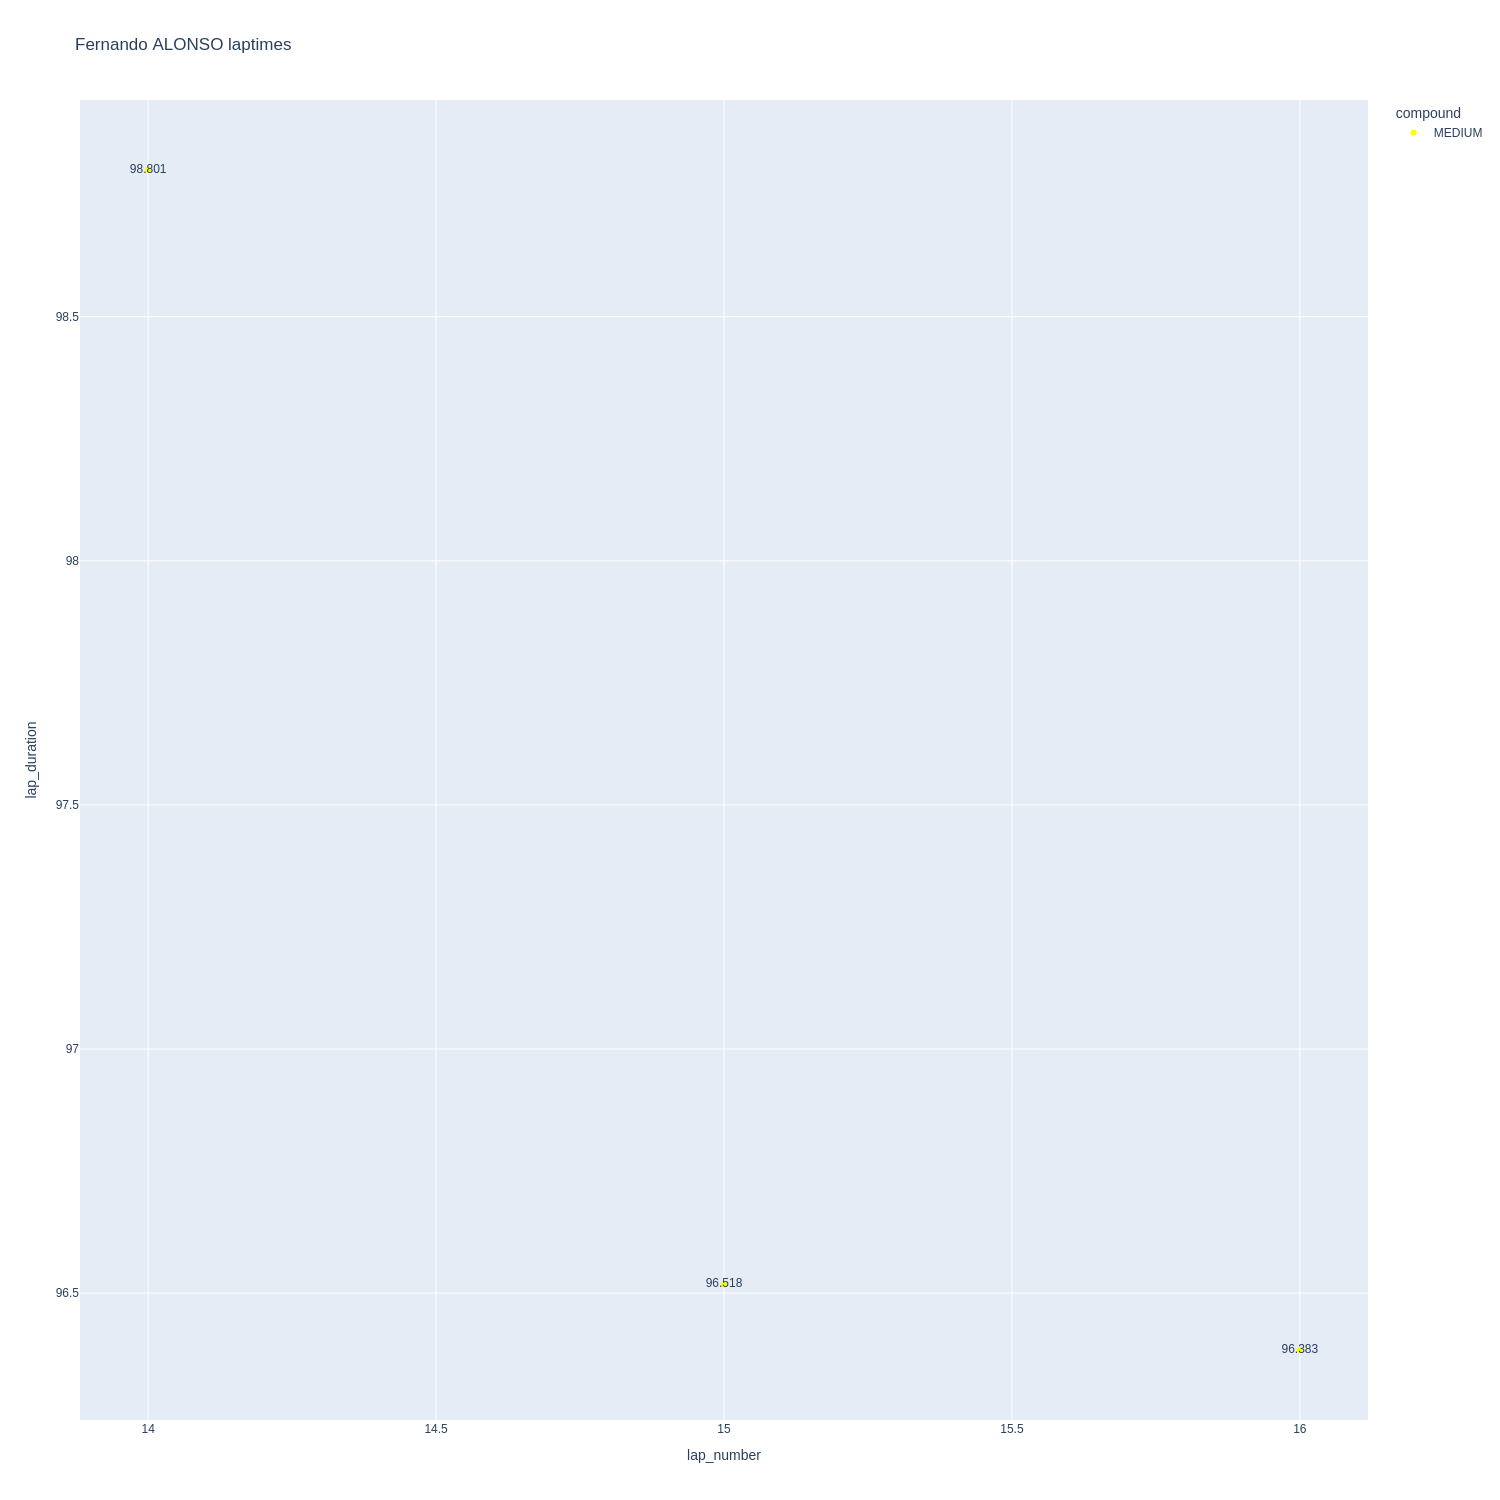

In [526]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

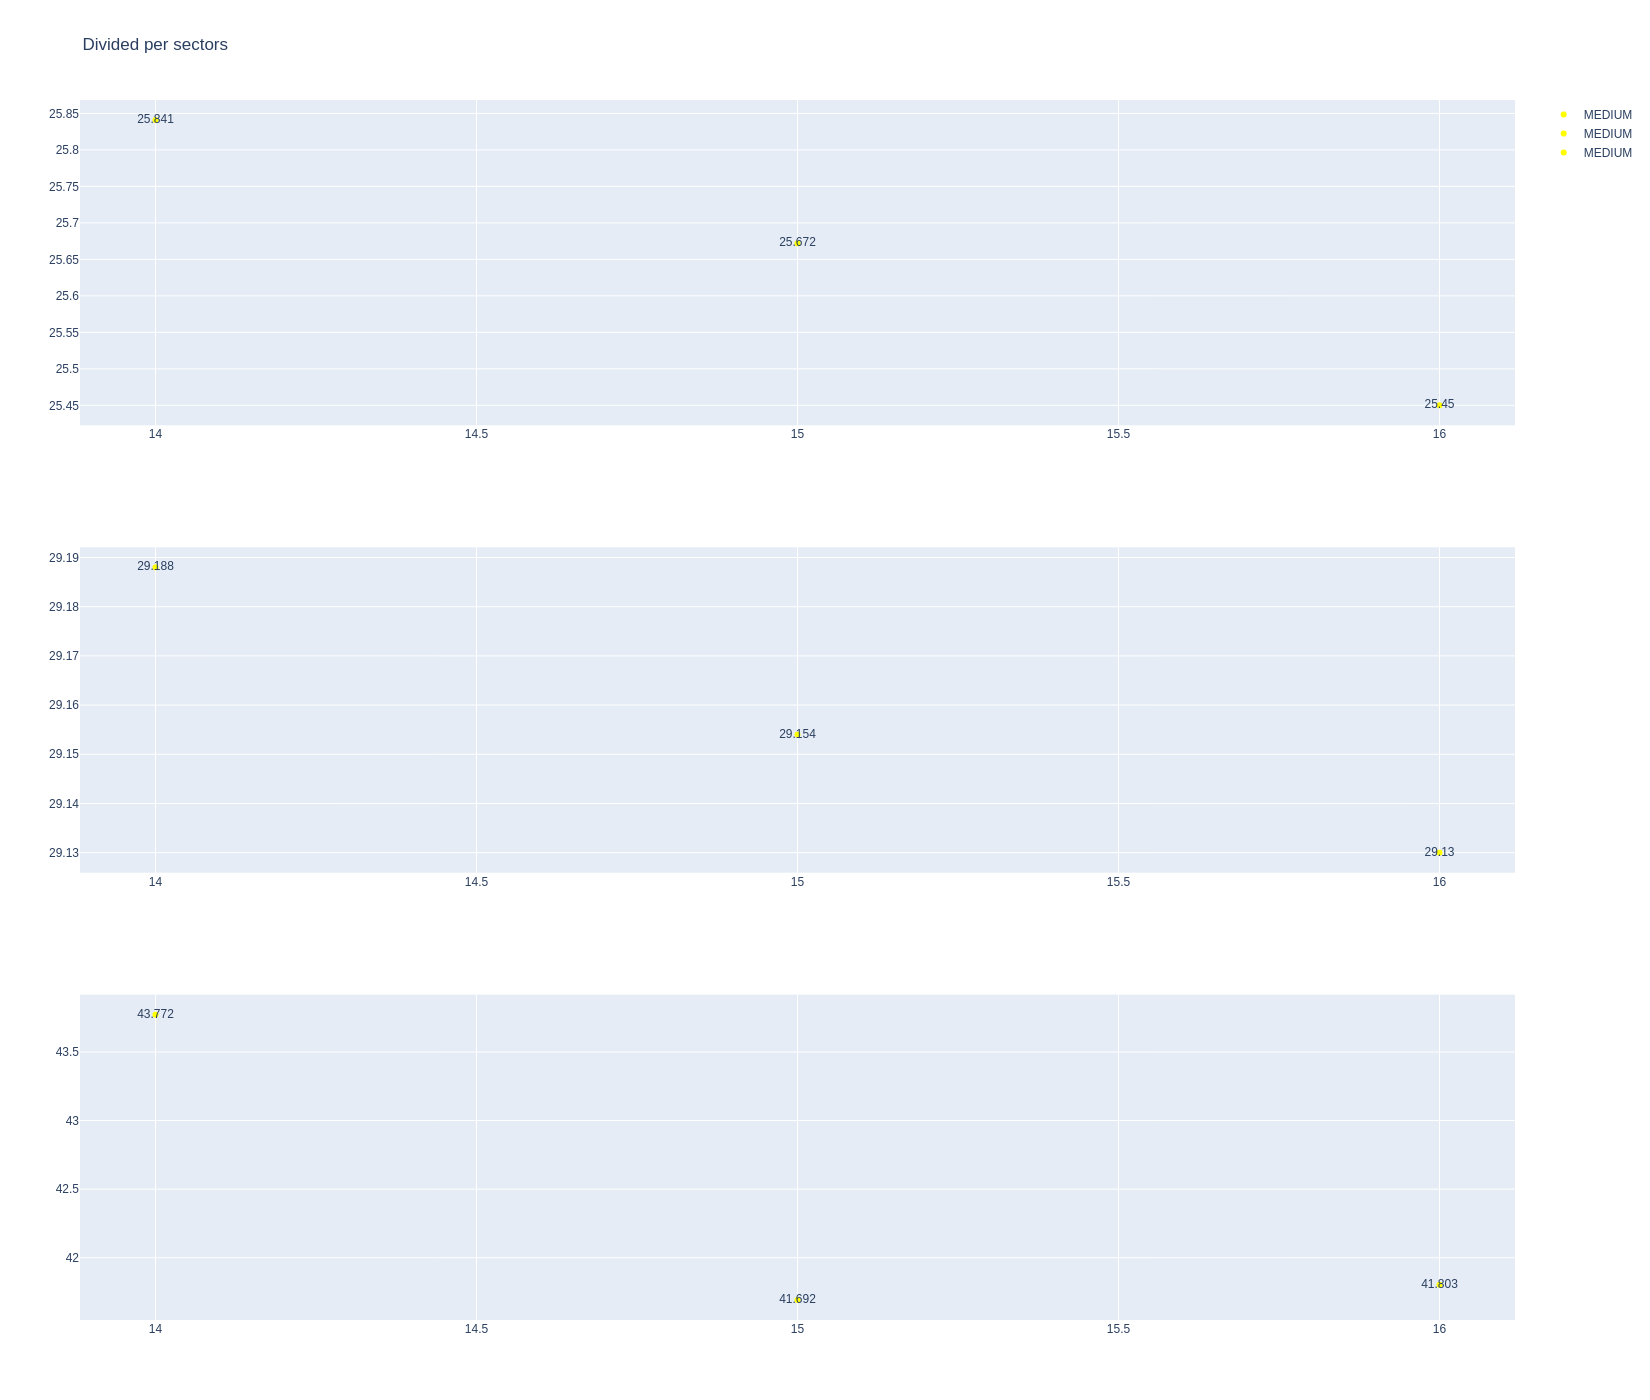

In [527]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [528]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
56   Lance STROLL   MEDIUM  2025-03-21T03:35:37.791000+00:00           2   
291  Lance STROLL   MEDIUM  2025-03-21T04:08:12.832000+00:00          12   
309  Lance STROLL   MEDIUM  2025-03-21T04:09:50.166000+00:00          13   
326  Lance STROLL   MEDIUM  2025-03-21T04:11:28.196000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
56              25.671             28.712             42.068        96.451  
291             26.027             29.169             42.269        97.465  
309             26.317             29.410             42.211        97.938  
326             26.686             30.939             42.007        99.632

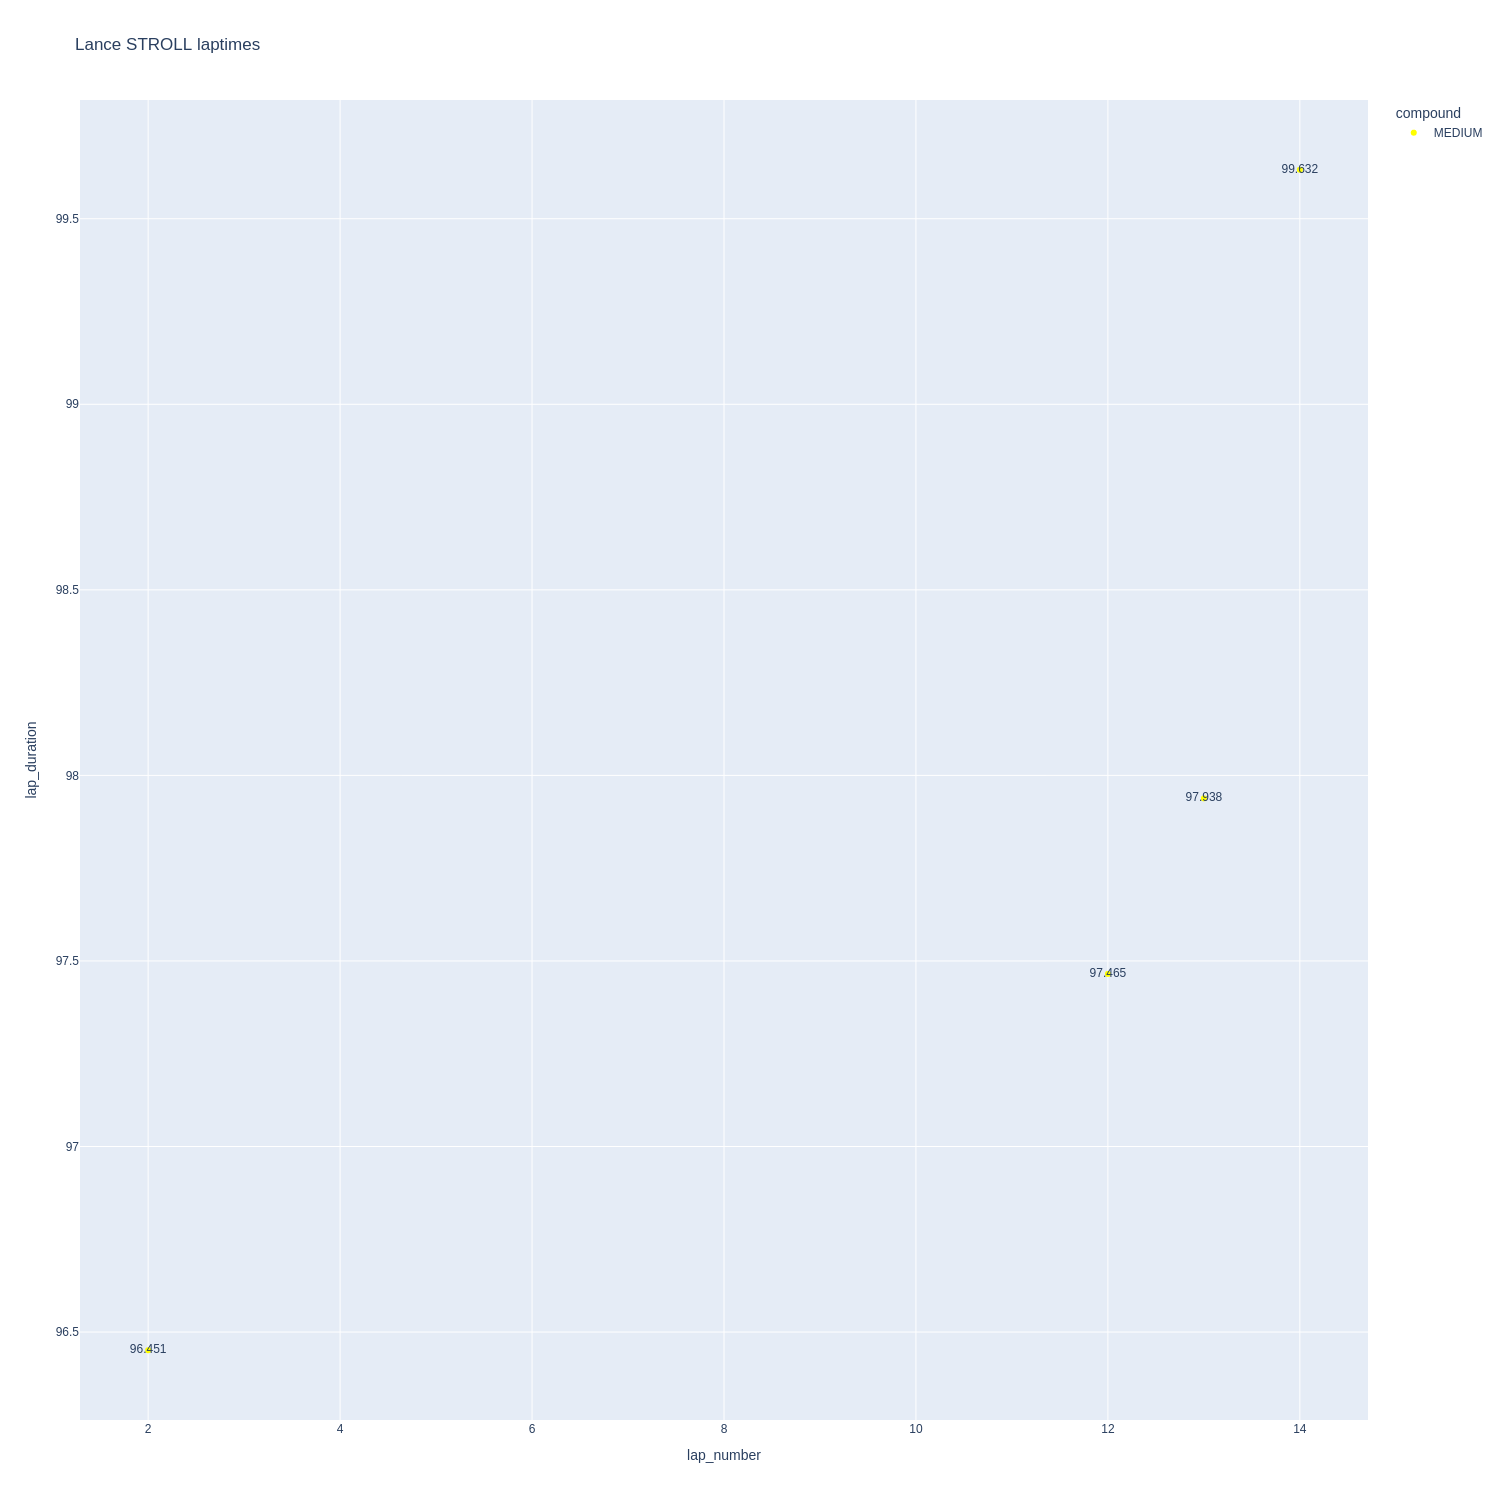

In [529]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

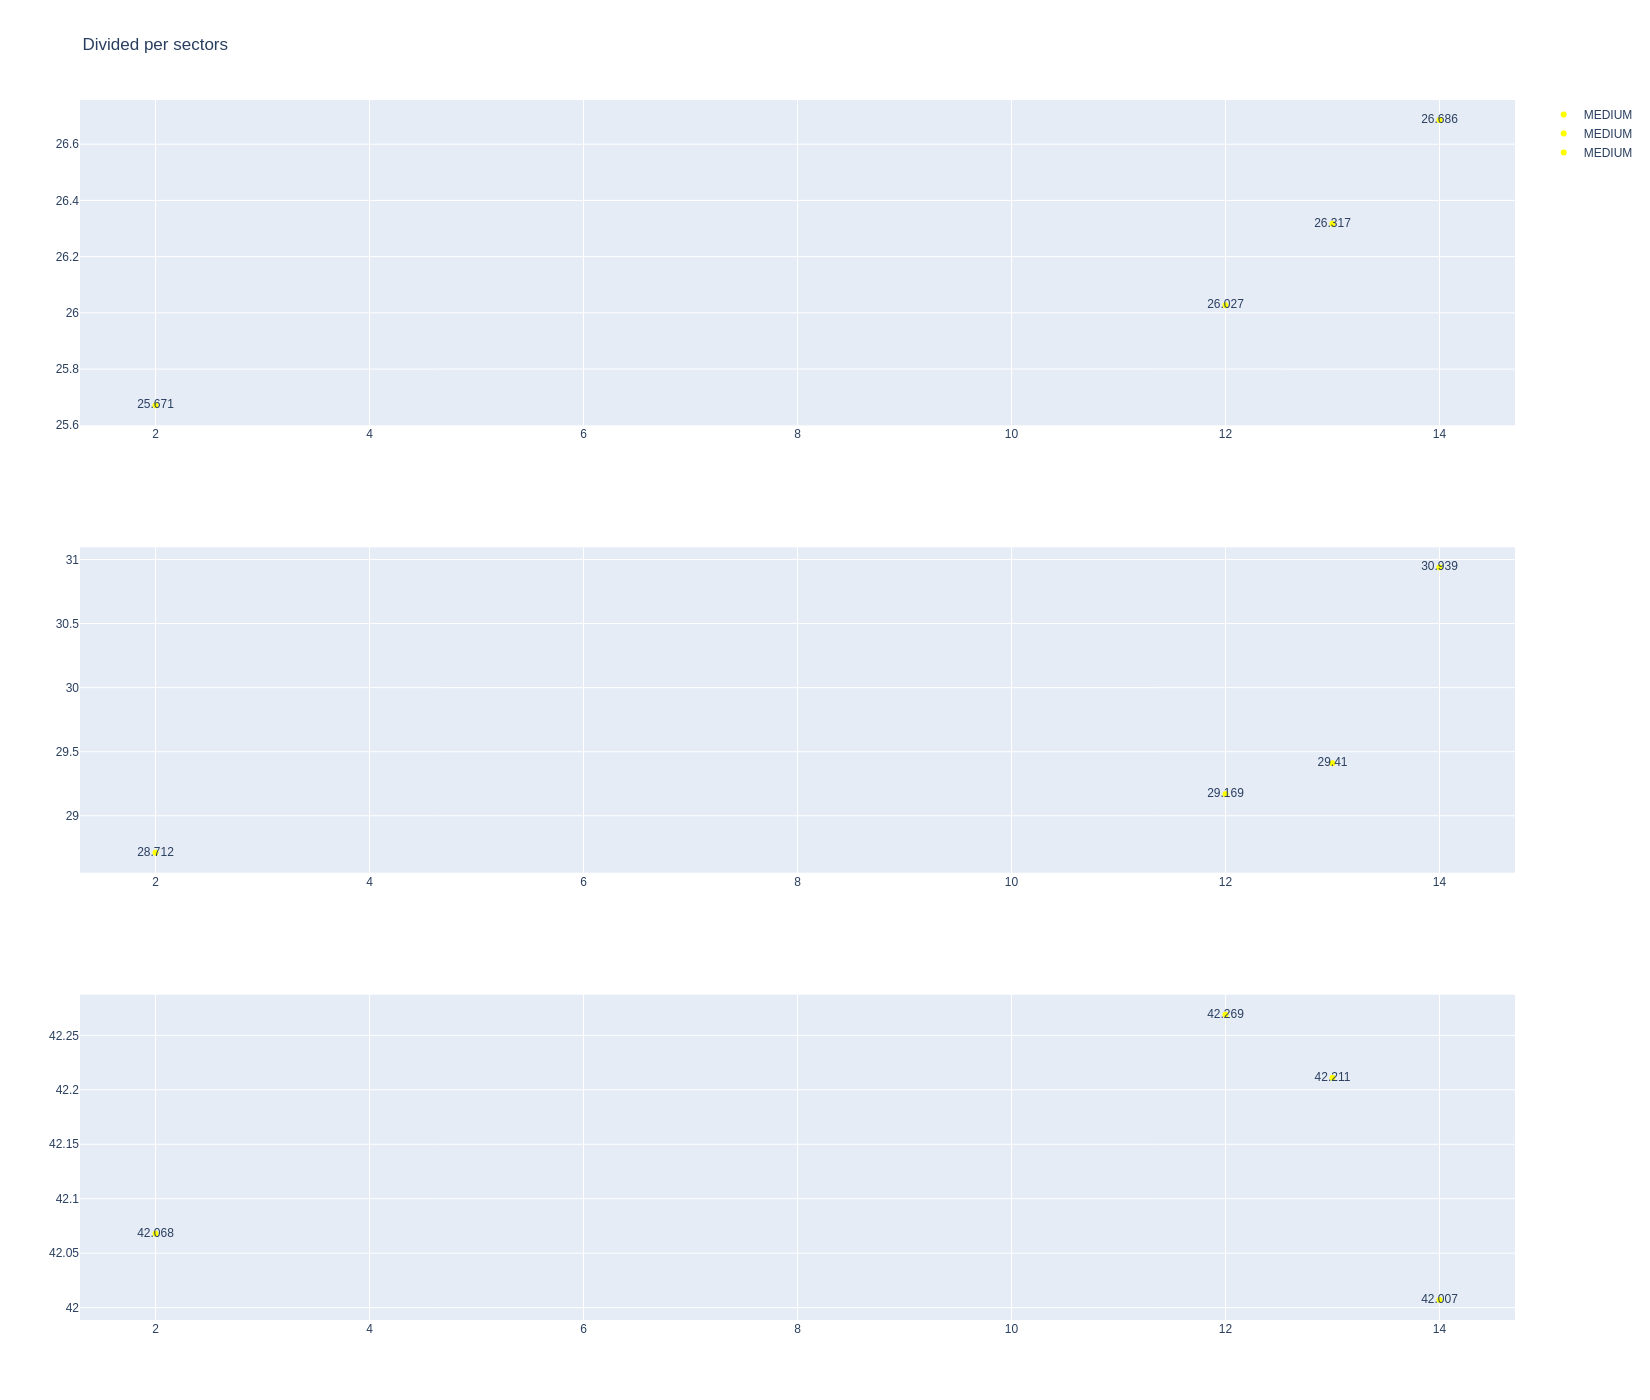

In [530]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Racing Bulls

In [531]:
stintInformation.query('driver_number == 6 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1255         9988             1              6          1        8   
19         1255         9988             1             22          1       13   
24         1255         9988             2              6          9       11   
39         1255         9988             3              6         12       18   
44         1255         9988             2             22         14       19   
53         1255         9988             4              6         19       24   
58         1255         9988             3             22         20       24   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
19   MEDIUM                  0  
24   MEDIUM                  7  
39   MEDIUM                 10  
44   MEDIUM                 12  
53     SOFT                  0  
58     SOFT                  0

In [532]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
23   Isack HADJAR   MEDIUM  2025-03-21T03:32:34.145000+00:00           2   
197  Isack HADJAR   MEDIUM  2025-03-21T03:58:52.827000+00:00          12   
224  Isack HADJAR   MEDIUM  2025-03-21T04:02:13.565000+00:00          14   
242  Isack HADJAR   MEDIUM  2025-03-21T04:03:51.232000+00:00          15   
260  Isack HADJAR   MEDIUM  2025-03-21T04:05:28.904000+00:00          16   
422  Isack HADJAR     SOFT  2025-03-21T04:29:38.705000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              25.834             29.568             41.820        97.222  
197             26.628             29.547             42.907        99.082  
224             26.240             29.236             42.146        97.622  
242             26.379             29.213             42.108        97.700  
260             26.145             28.978             42.016        97.139  
422             25.428             27.760             44.997        98.185

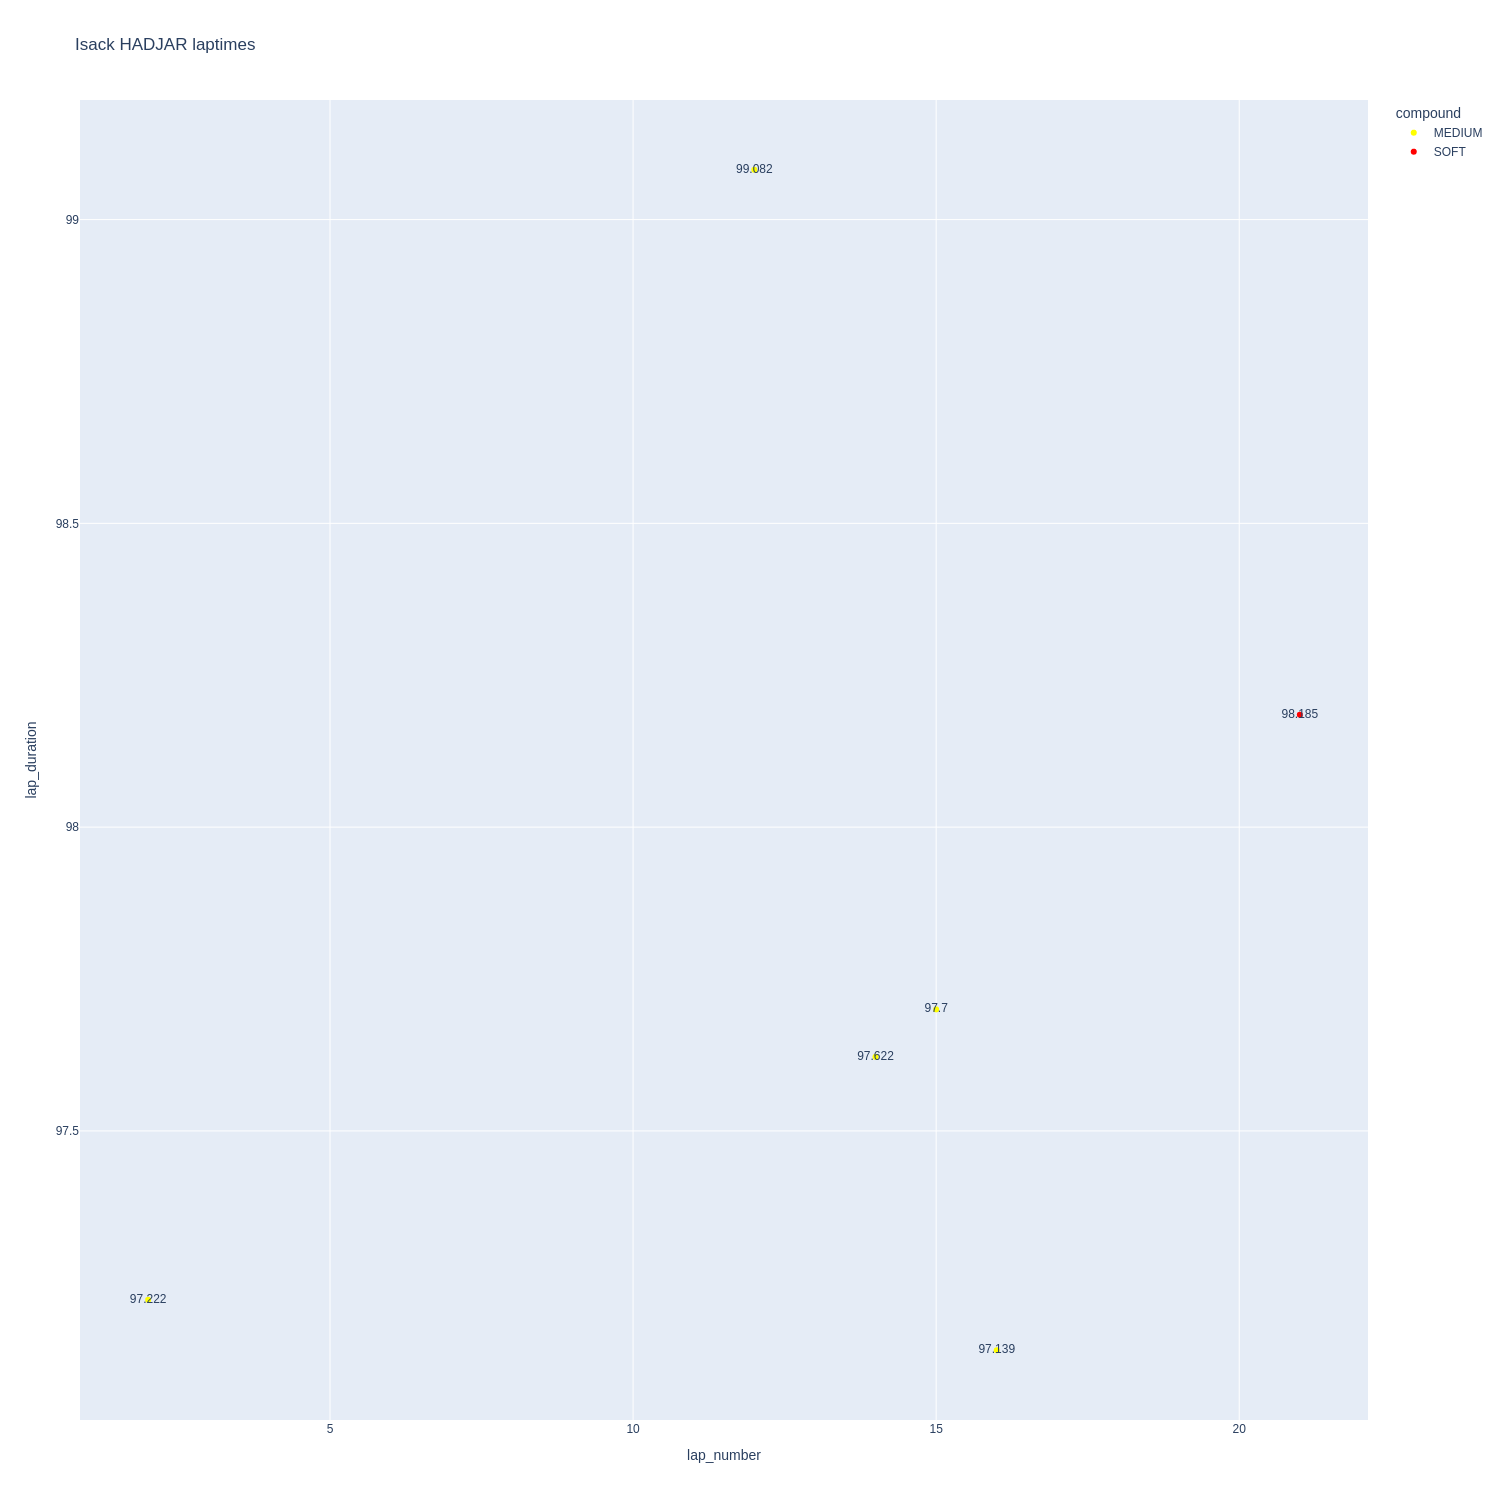

In [533]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

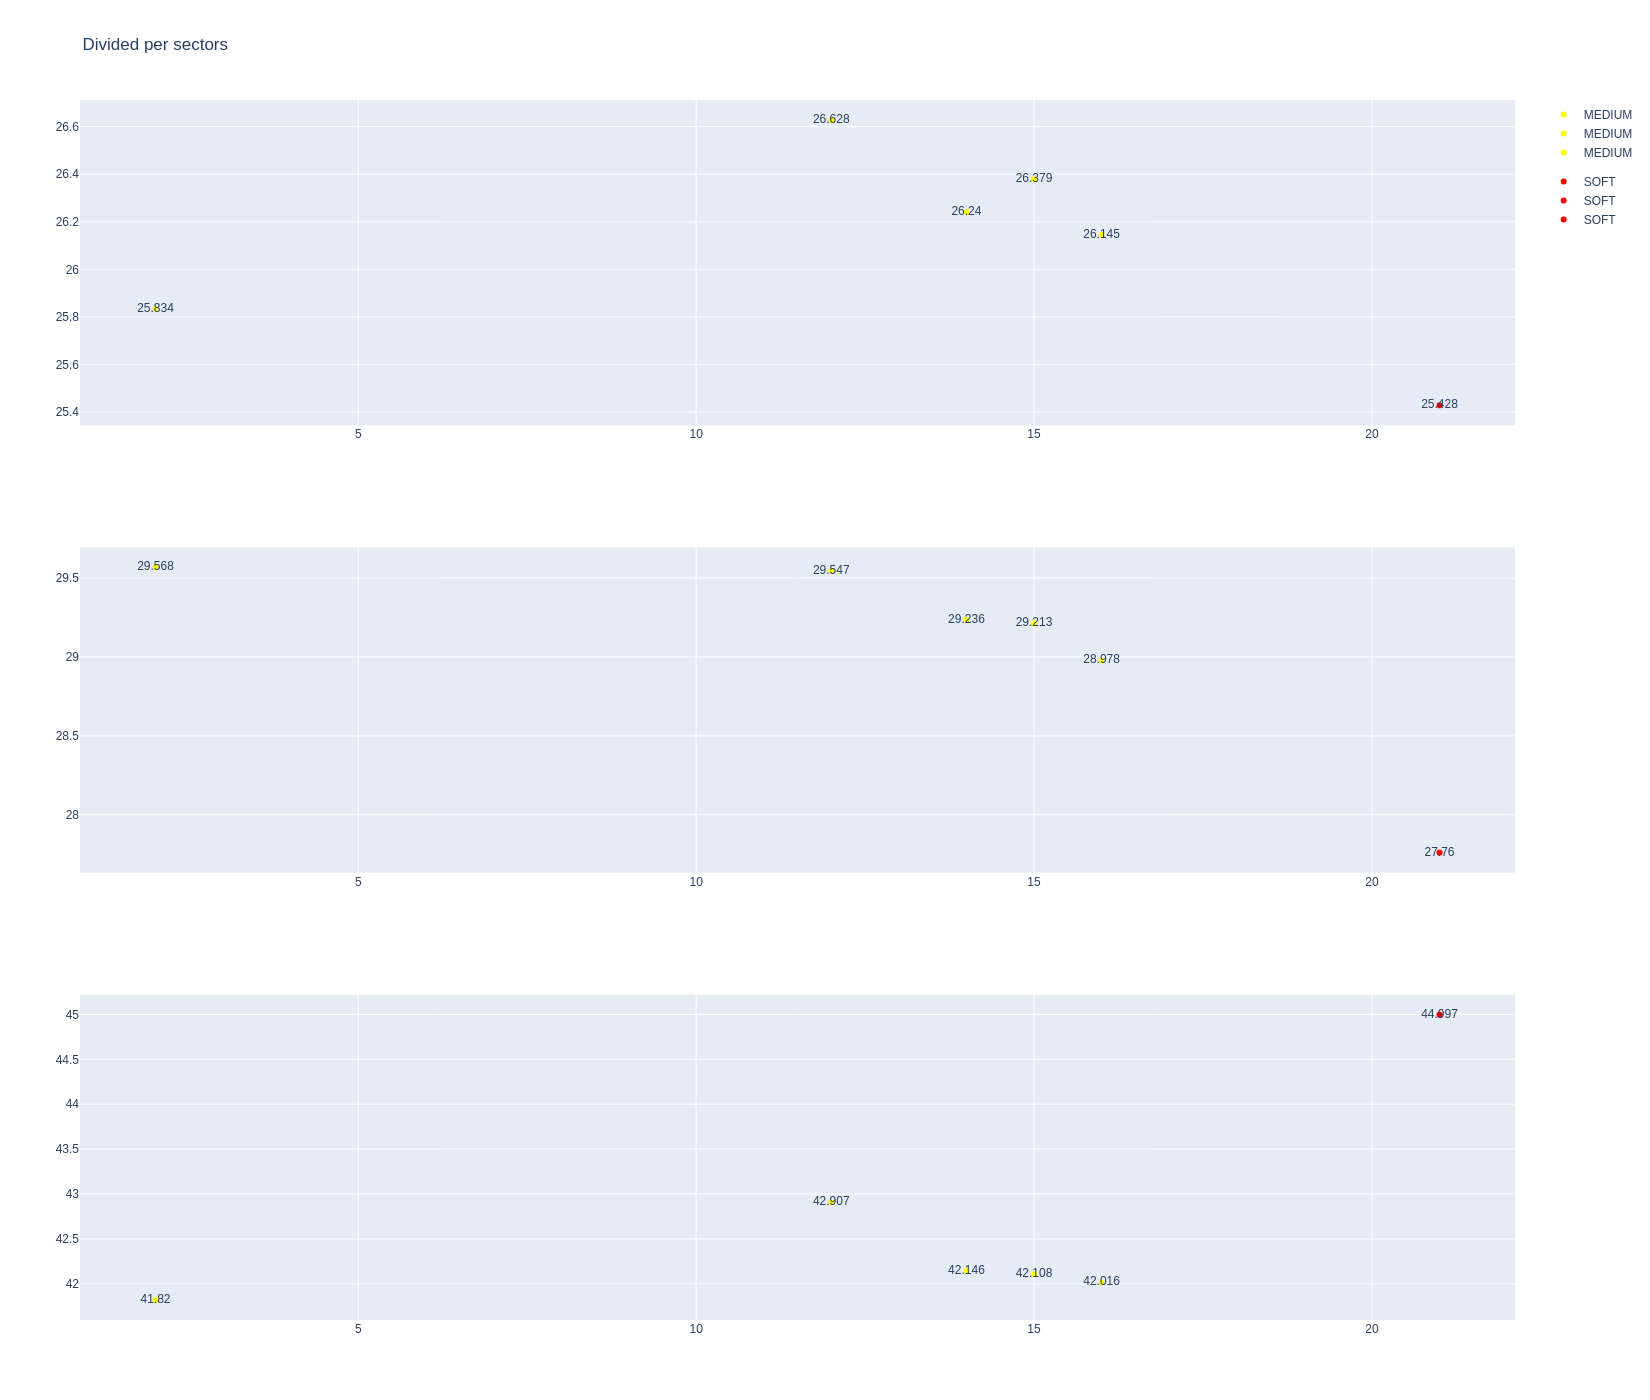

In [534]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [535]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
21   Yuki TSUNODA   MEDIUM  2025-03-21T03:32:20.311000+00:00           2   
245  Yuki TSUNODA   MEDIUM  2025-03-21T04:04:14.630000+00:00          14   
264  Yuki TSUNODA   MEDIUM  2025-03-21T04:05:51.901000+00:00          15   
284  Yuki TSUNODA   MEDIUM  2025-03-21T04:07:29.082000+00:00          16   
302  Yuki TSUNODA   MEDIUM  2025-03-21T04:09:06.762000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
21              25.888             28.863             41.831        96.582  
245             26.197             29.163             41.931        97.291  
264             26.129             29.055             41.950        97.134  
284             26.301             29.234             42.067        97.602  
302             26.428             29.420             42.079        97.927

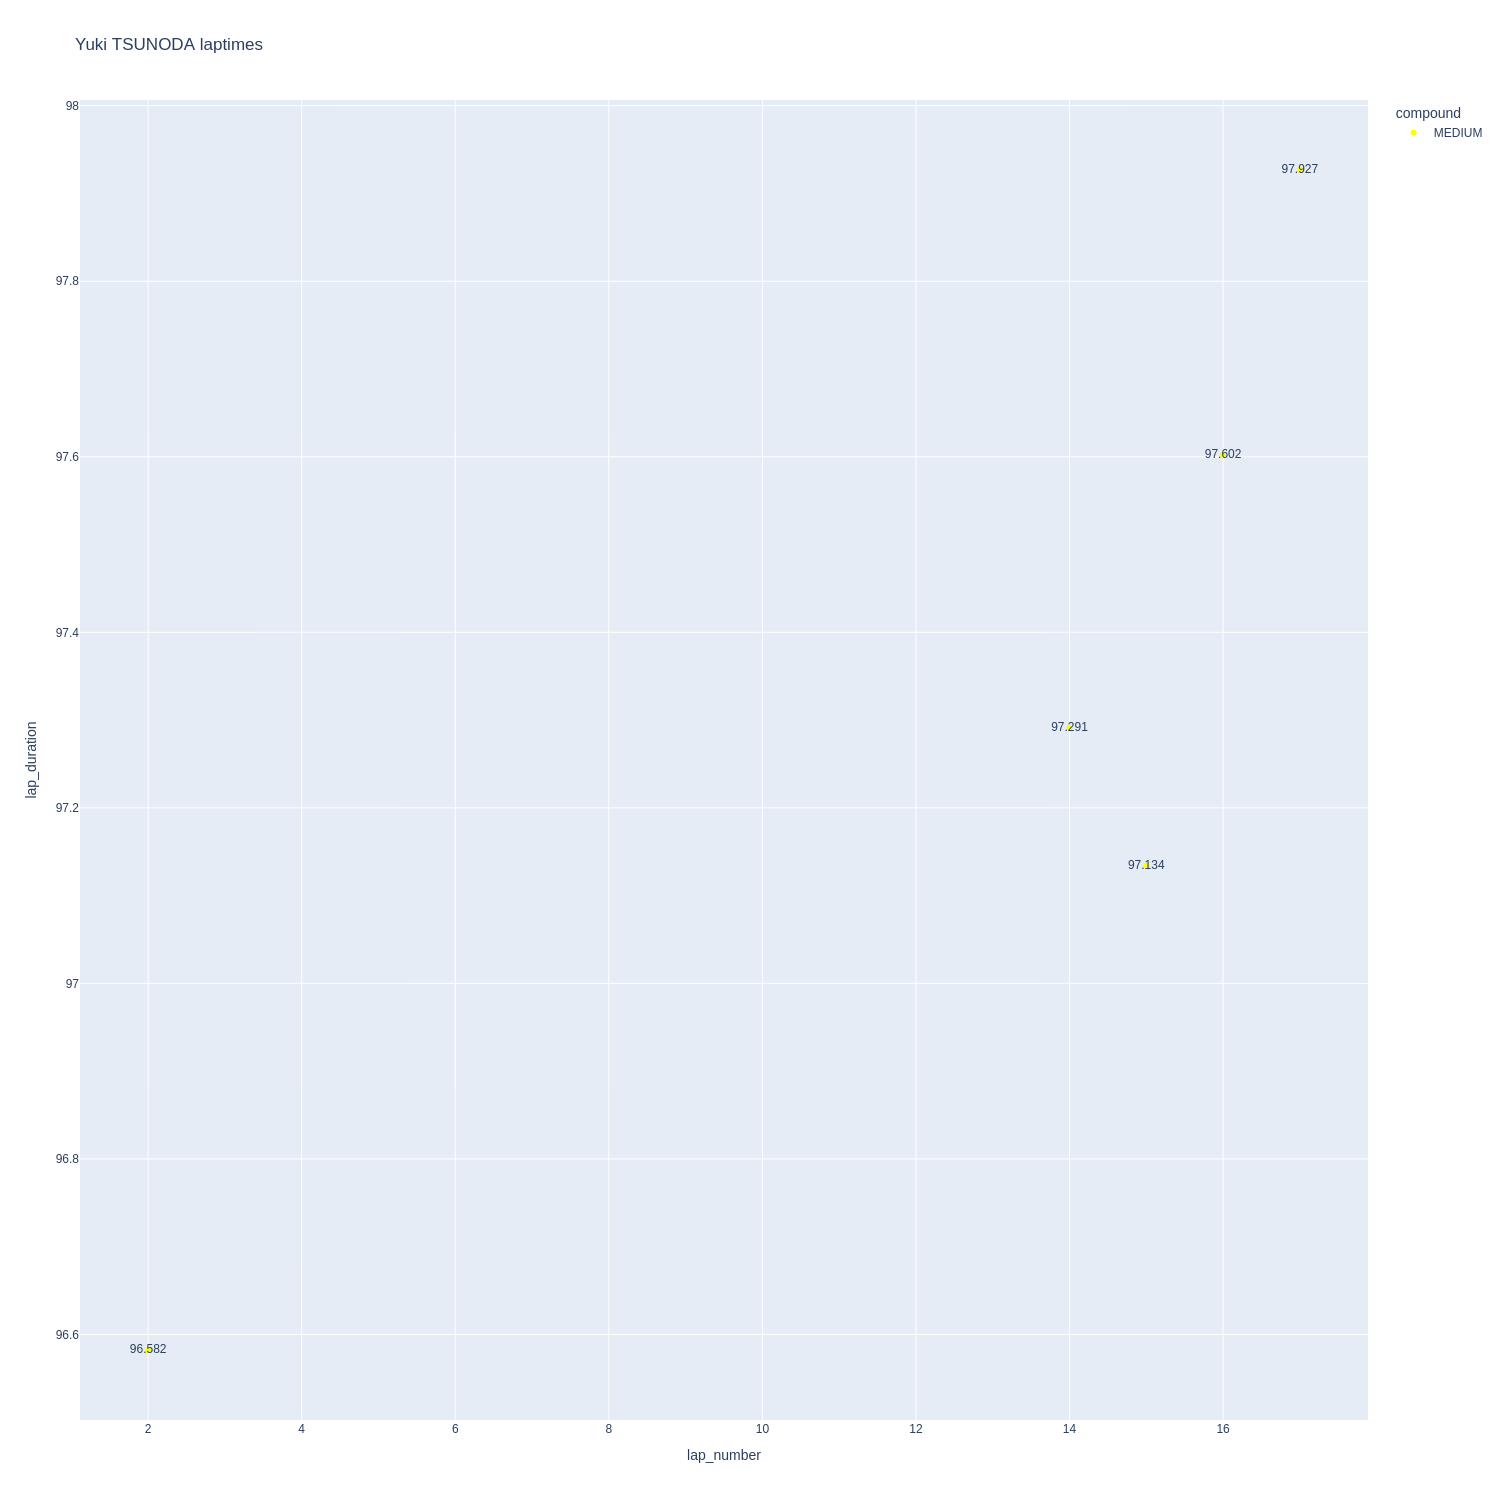

In [536]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

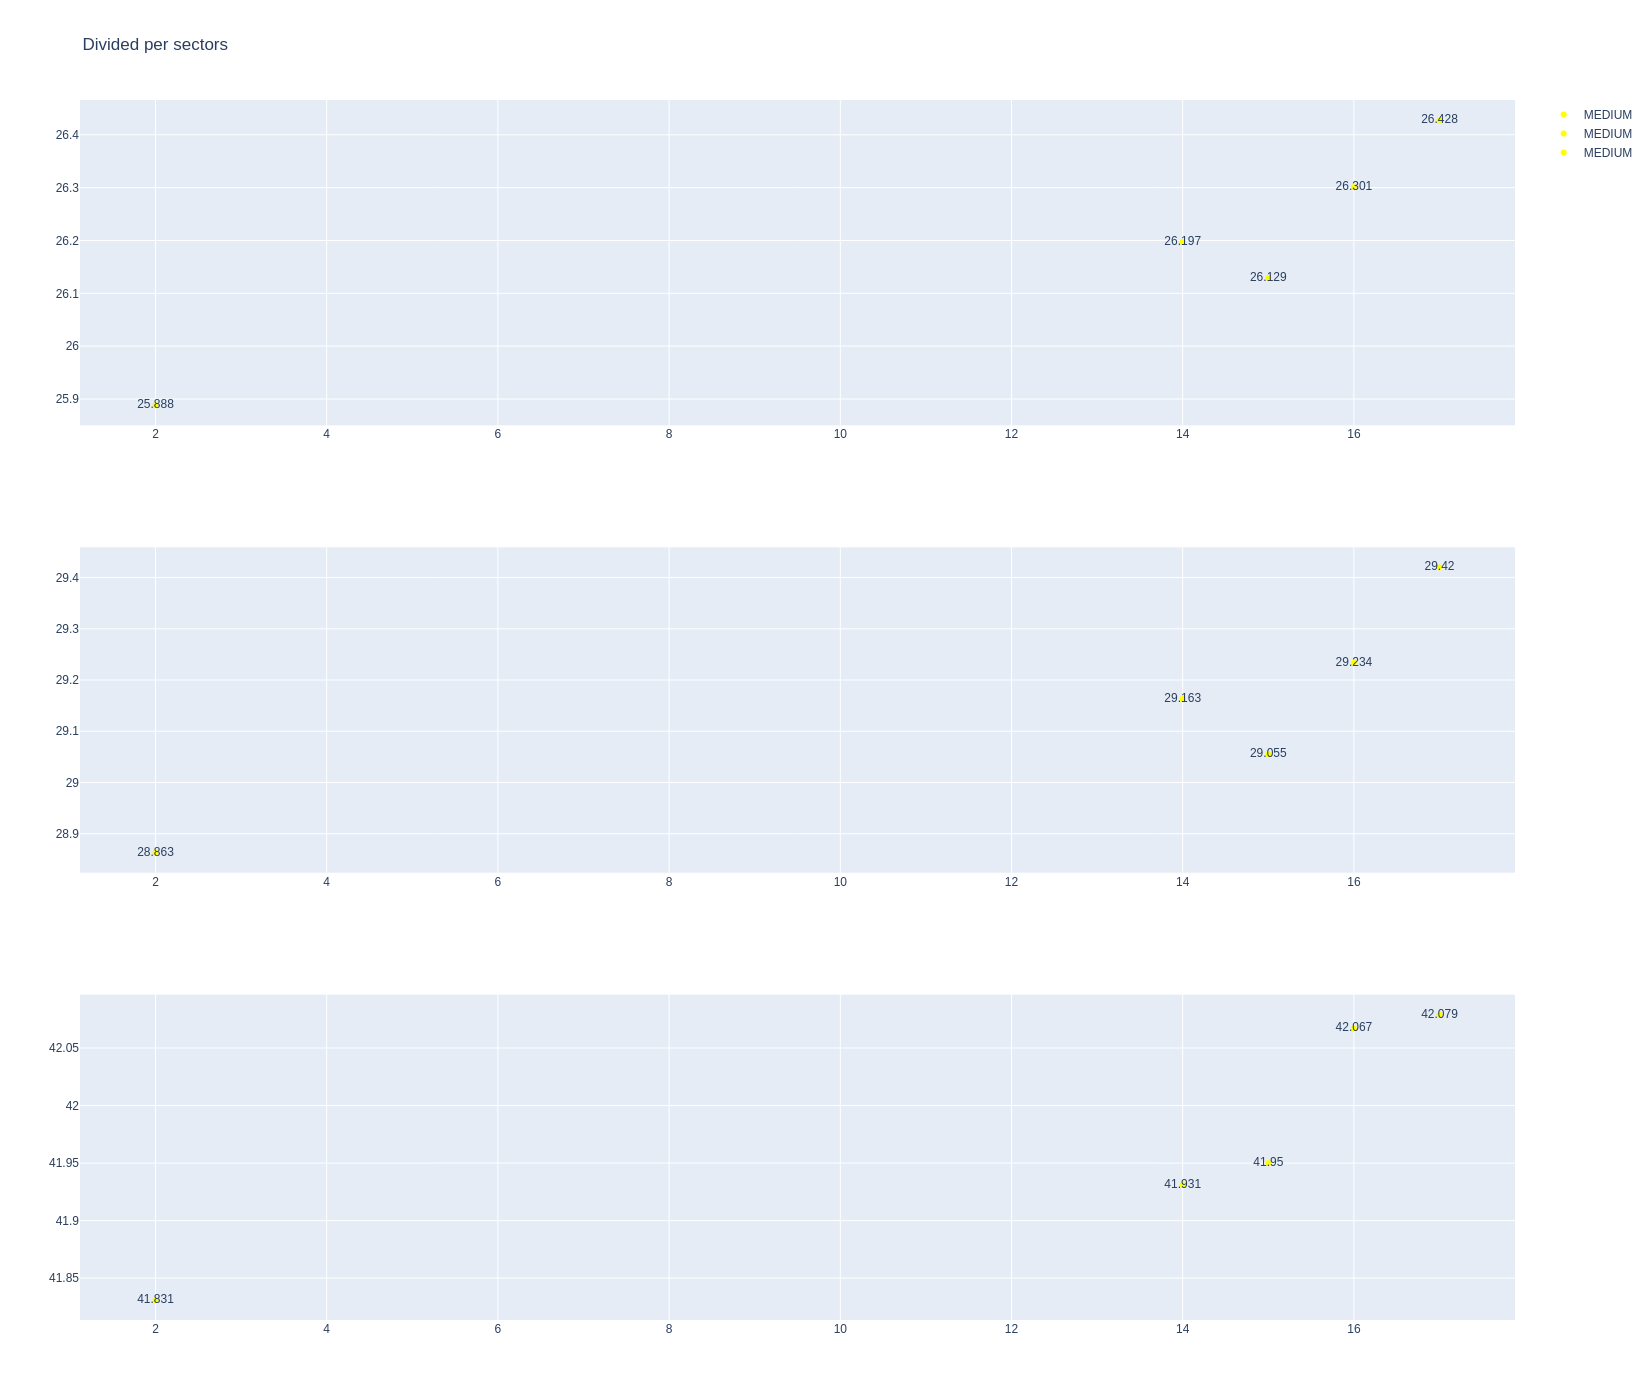

In [537]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [538]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
14         1255         9988             1             87          1       10   
16         1255         9988             1             31          1       11   
35         1255         9988             2             87         11       19   
41         1255         9988             2             31         12       18   
55         1255         9988             3             31         19       24   
56         1255         9988             3             87         19       24   

   compound  tyre_age_at_start  
14   MEDIUM                  0  
16   MEDIUM                  0  
35   MEDIUM                  9  
41   MEDIUM                 10  
55     SOFT                  0  
56     SOFT                  0

In [539]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
59   Oliver BEARMAN   MEDIUM  2025-03-21T03:36:03.392000+00:00           4   
229  Oliver BEARMAN   MEDIUM  2025-03-21T04:02:33.303000+00:00          11   
244  Oliver BEARMAN   MEDIUM  2025-03-21T04:04:10.256000+00:00          12   
263  Oliver BEARMAN   MEDIUM  2025-03-21T04:05:47.853000+00:00          13   
283  Oliver BEARMAN   MEDIUM  2025-03-21T04:07:25.334000+00:00          14   
301  Oliver BEARMAN   MEDIUM  2025-03-21T04:09:03.132000+00:00          15   
318  Oliver BEARMAN   MEDIUM  2025-03-21T04:10:41.033000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
59              25.948             28.934             41.737        96.619  
229             25.683             29.387             41.934        97.004  
244             25.835             29.750             41.986        97.571  
263             26.095             29.361             42.038        97.494  
283             26.071             29.515             42.088        97.674  
301             26.385             29.675             42.000        98.060  
318             26.629             29.673             42.439        98.741

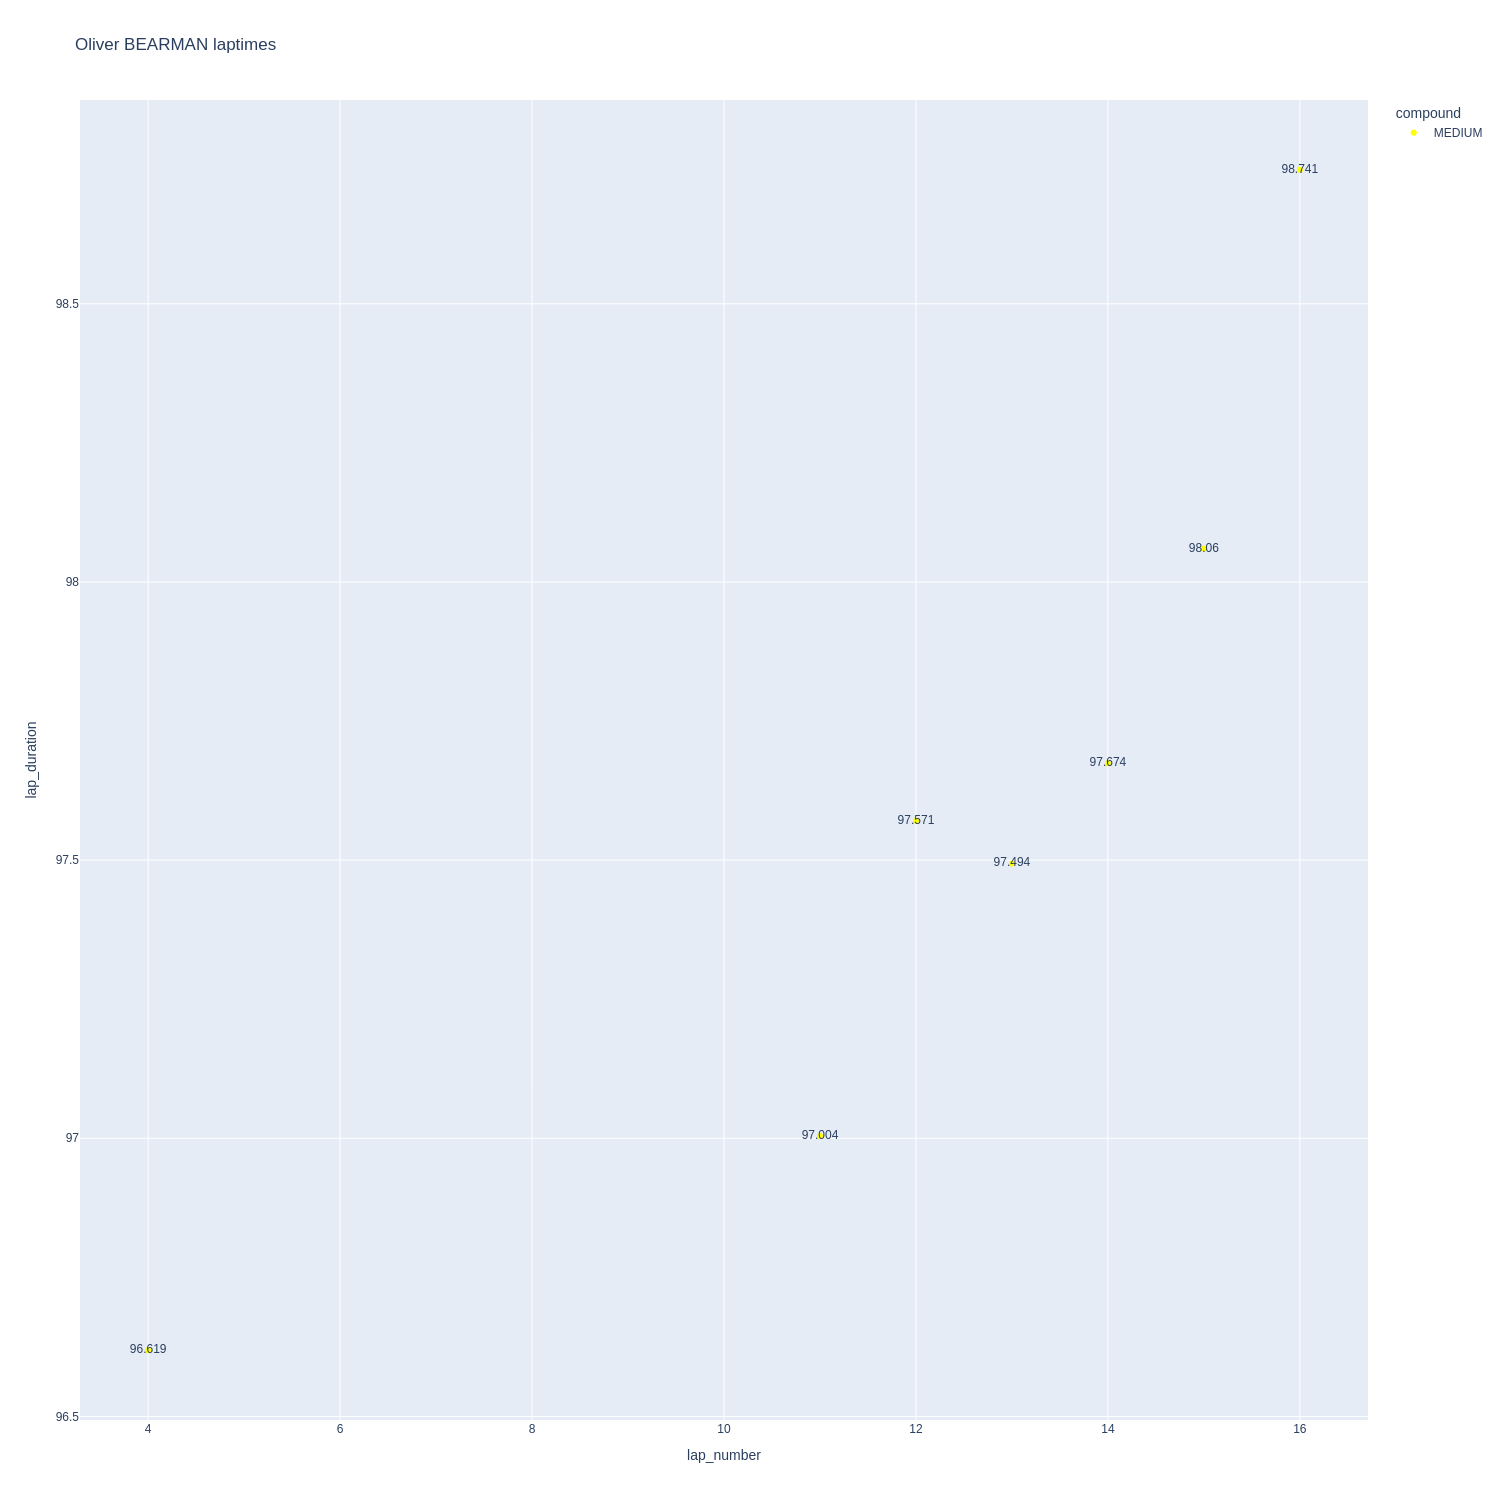

In [540]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

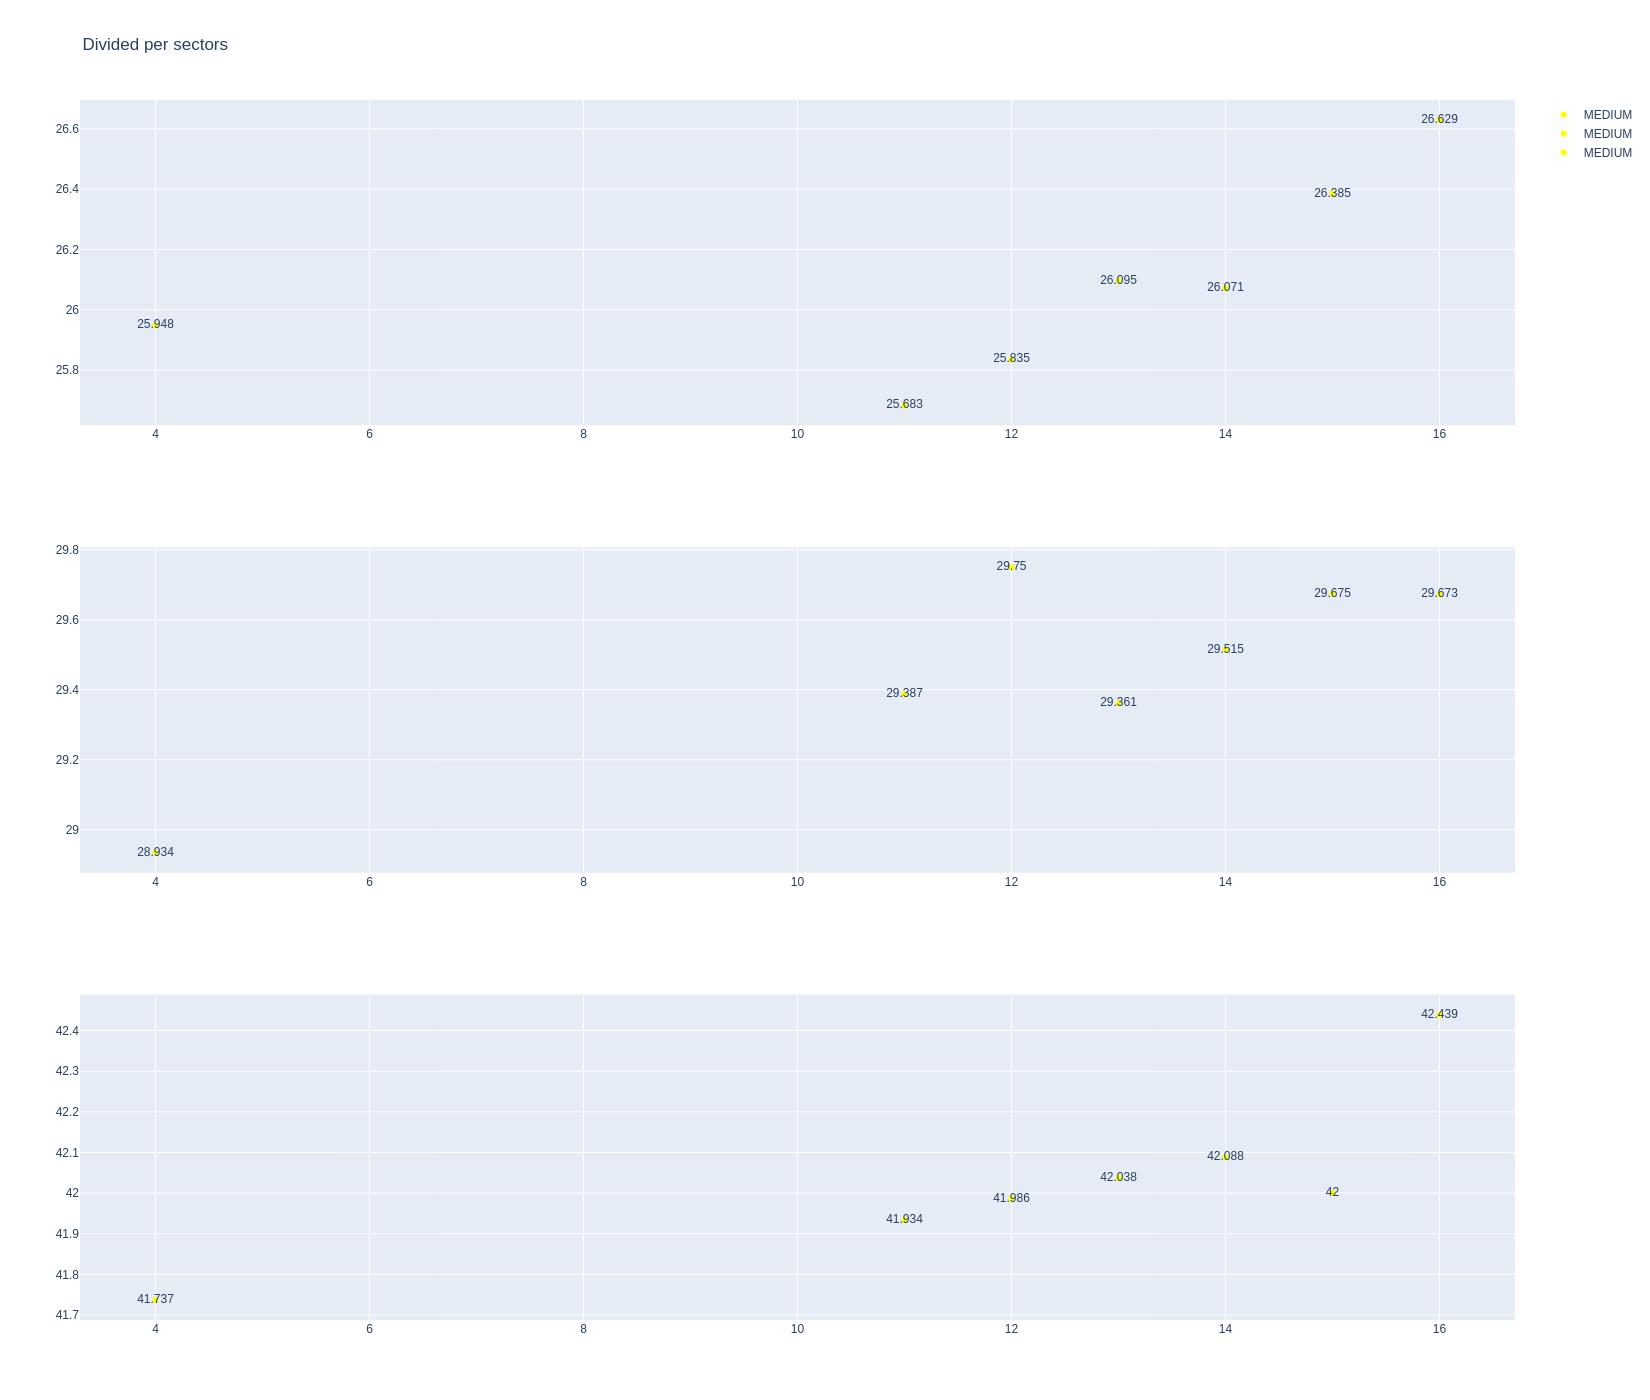

In [541]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [542]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
20   Esteban OCON   MEDIUM  2025-03-21T03:32:11.616000+00:00           2   
214  Esteban OCON   MEDIUM  2025-03-21T04:01:17.195000+00:00          13   
232  Esteban OCON   MEDIUM  2025-03-21T04:02:54.436000+00:00          14   
249  Esteban OCON   MEDIUM  2025-03-21T04:04:31.027000+00:00          15   
268  Esteban OCON   MEDIUM  2025-03-21T04:06:08.257000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
20              26.297             29.351             42.167        97.815  
214             25.816             29.261             41.969        97.046  
232             25.732             29.227             41.675        96.634  
249             26.057             29.238             41.919        97.214  
268             27.127             29.479             41.798        98.404

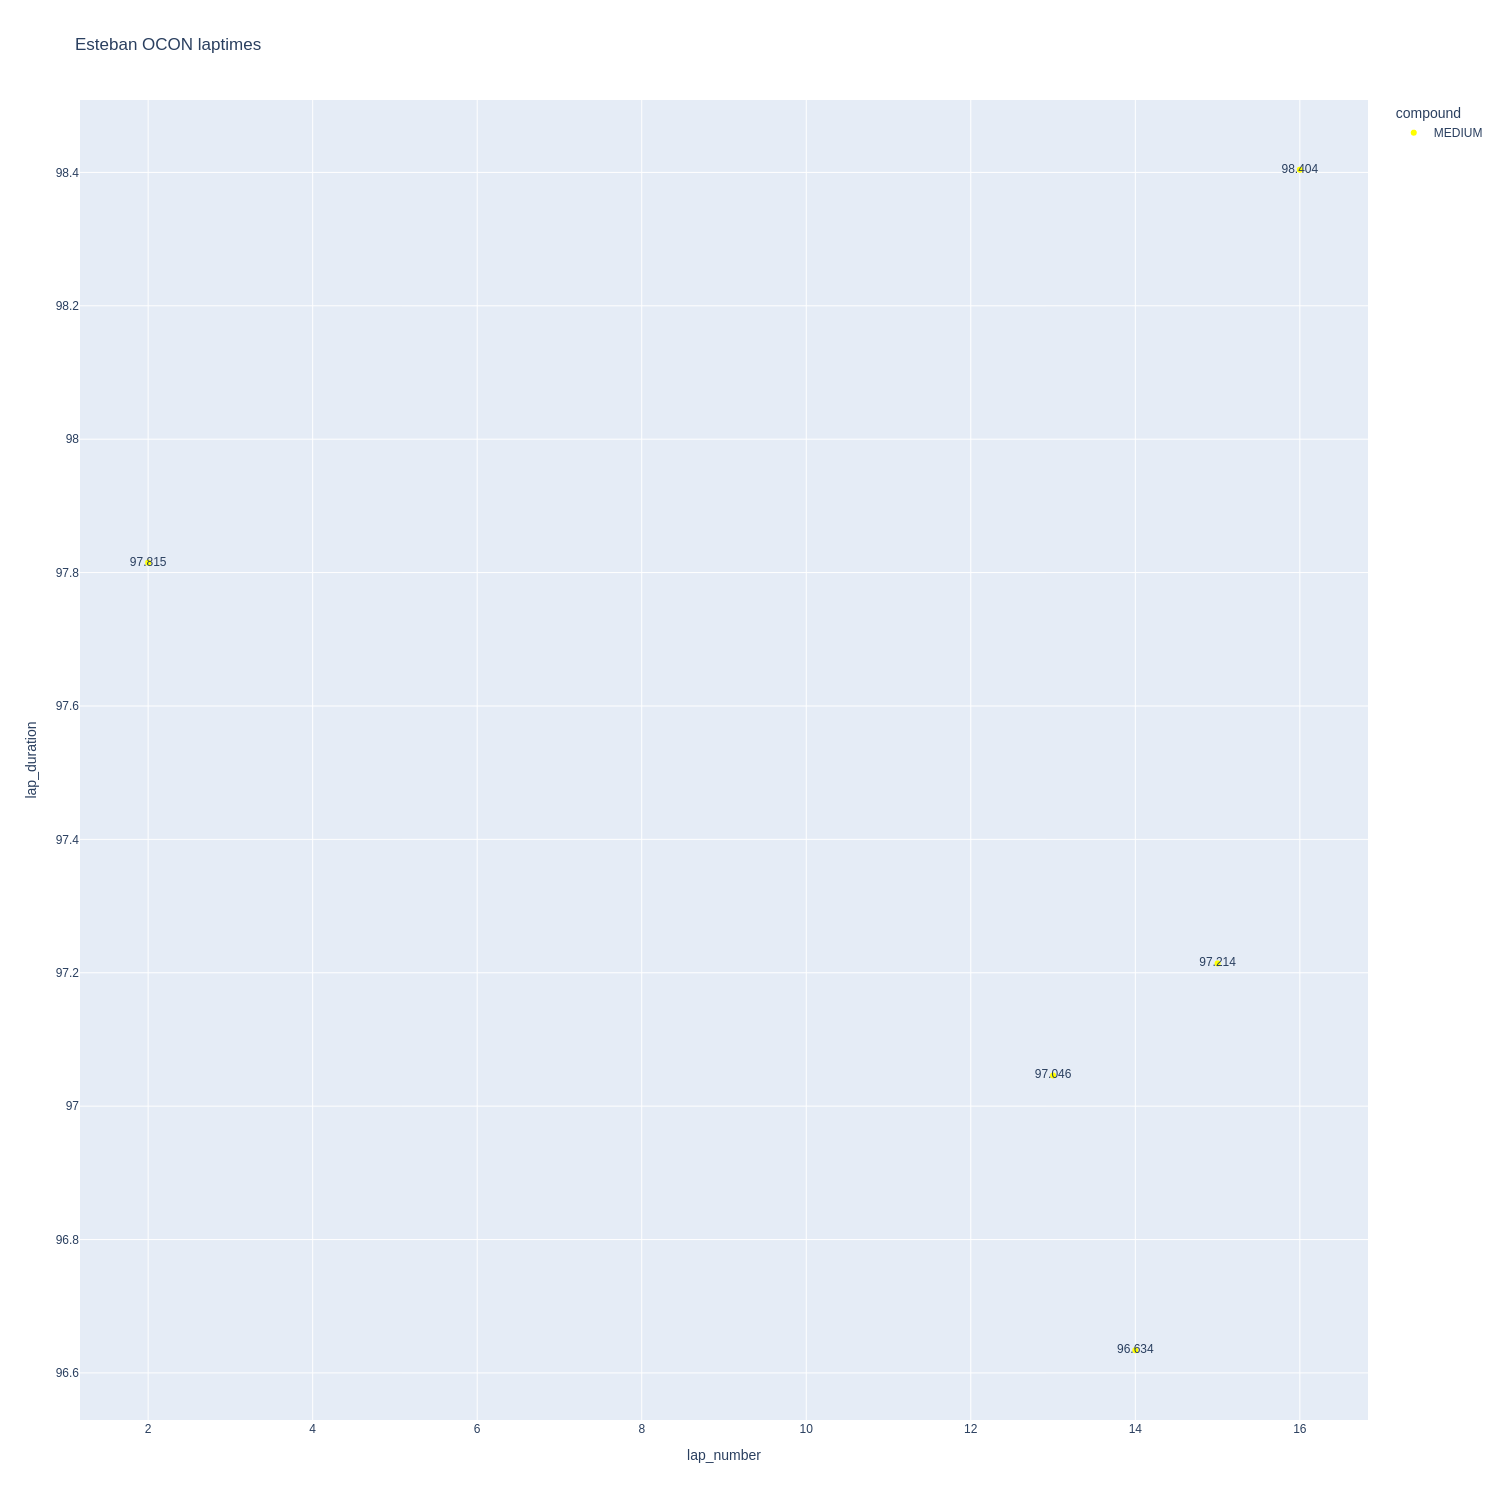

In [543]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

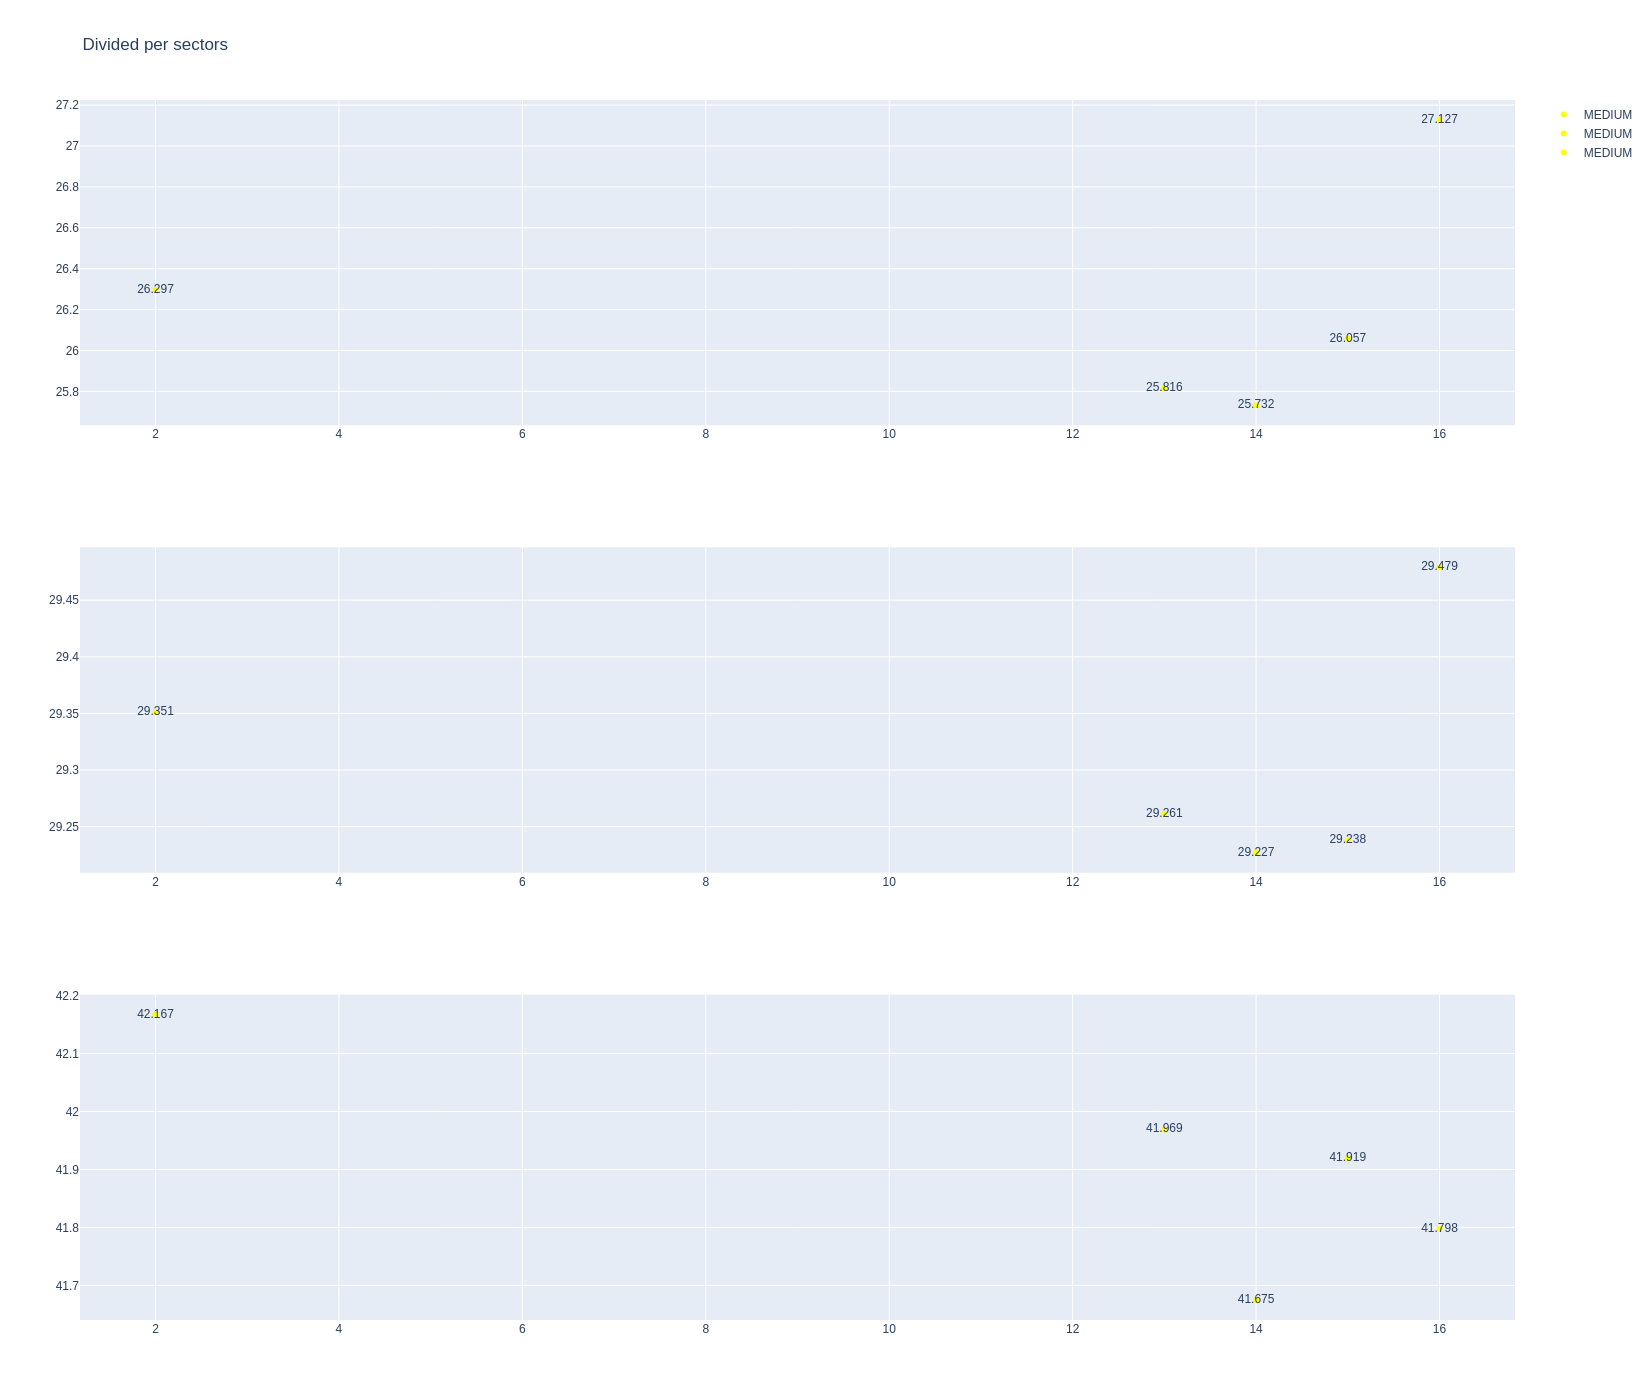

In [544]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [545]:
stintInformation.query('driver_number == 10 or driver_number == 7')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6          1255         9988             1             10          1        8   
9          1255         9988             1              7          1       10   
25         1255         9988             2             10          9       18   
33         1255         9988             2              7         11       18   
50         1255         9988             3             10         19       21   
65         1255         9988             4             10         22       24   

   compound  tyre_age_at_start  
6    MEDIUM                  0  
9    MEDIUM                  0  
25   MEDIUM                  0  
33   MEDIUM                  9  
50     SOFT                  0  
65   MEDIUM                 17

In [546]:
data =libraryDataF1.getinfolongruns(jointables2,7,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
25   Jack DOOHAN   MEDIUM  2025-03-21T03:32:52.129000+00:00           2   
298  Jack DOOHAN   MEDIUM  2025-03-21T04:08:41.707000+00:00          13   
315  Jack DOOHAN   MEDIUM  2025-03-21T04:10:18.388000+00:00          14   
331  Jack DOOHAN   MEDIUM  2025-03-21T04:11:55.308000+00:00          15   
343  Jack DOOHAN   MEDIUM  2025-03-21T04:13:32.864000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
25              25.675             29.368             42.170        97.213  
298             25.875             28.965             41.891        96.731  
315             25.697             29.207             41.951        96.855  
331             26.208             29.364             42.013        97.585  
343             26.153             29.126             41.754        97.033

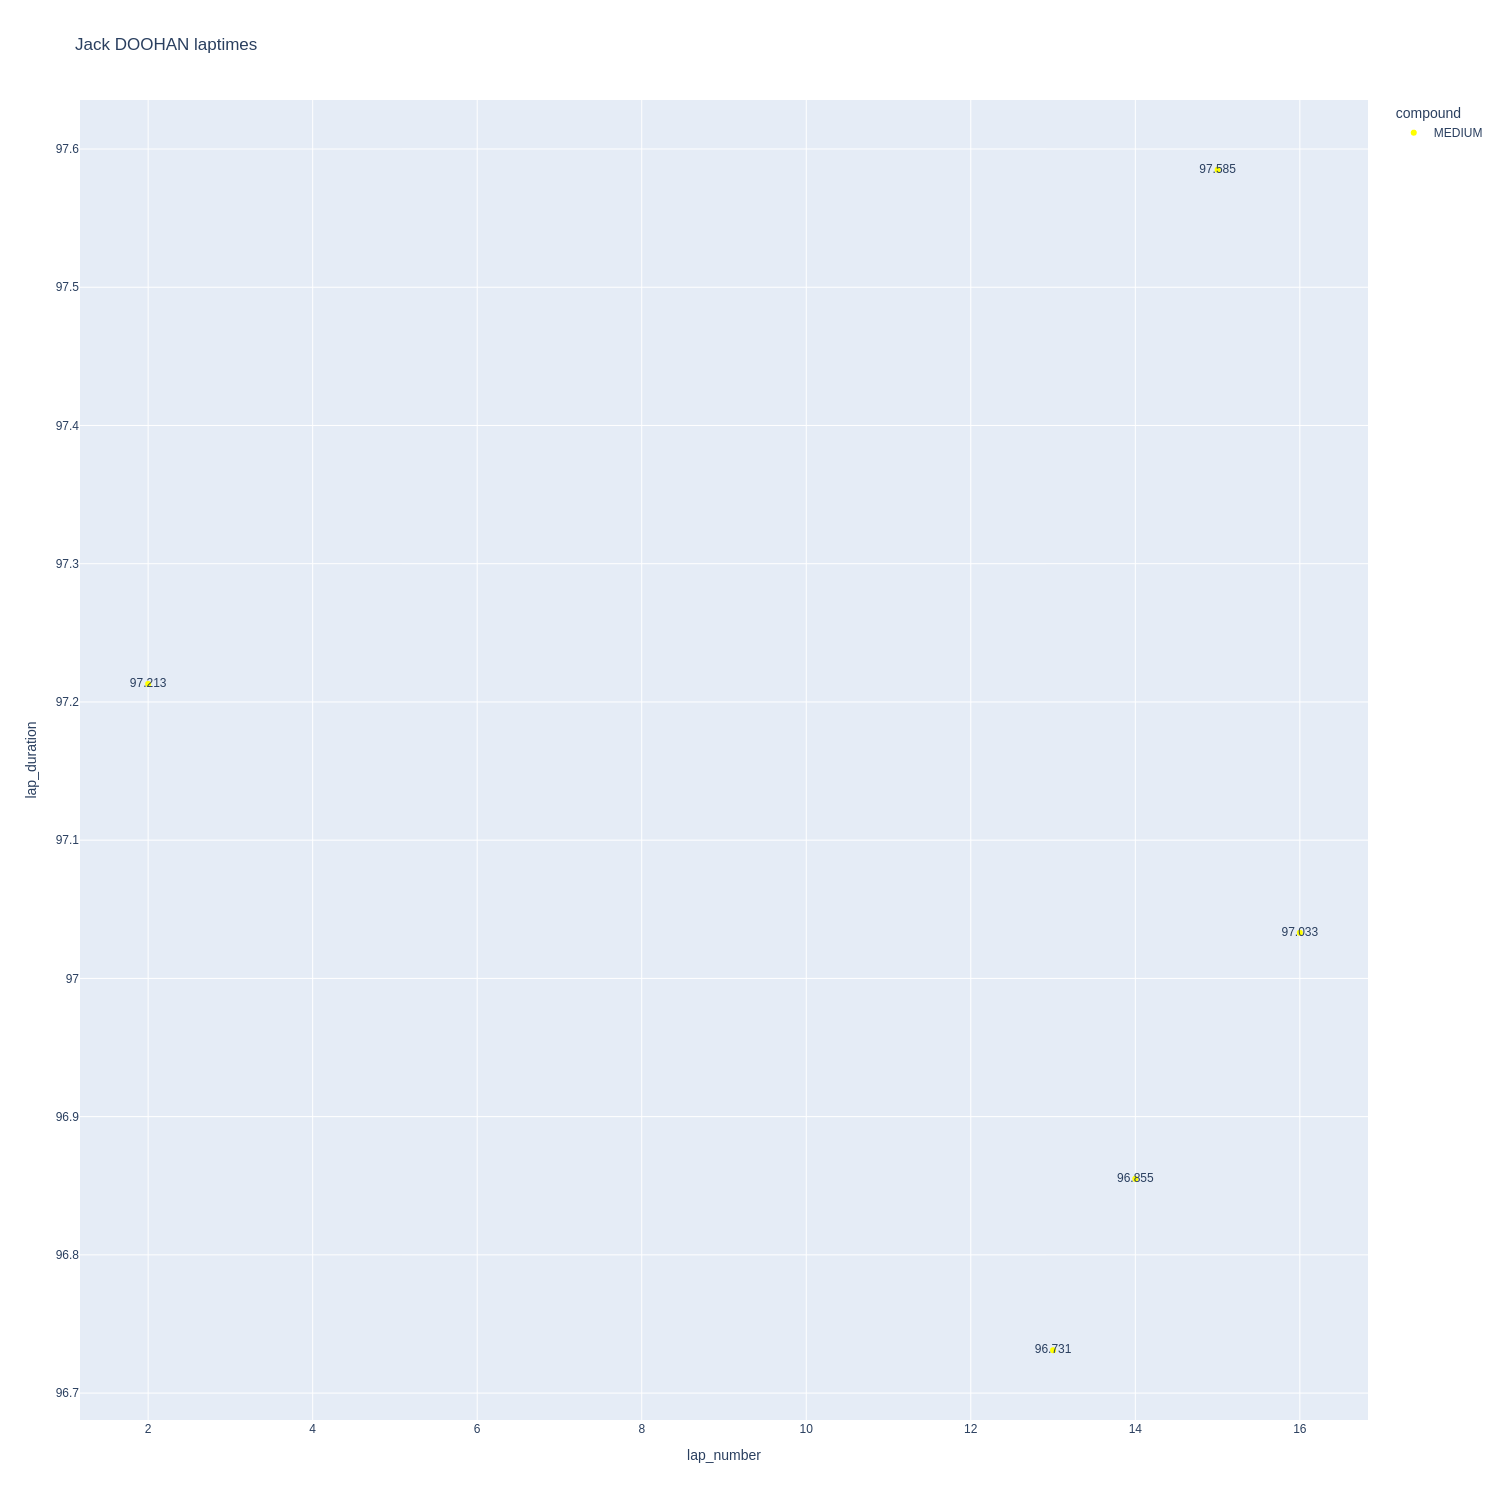

In [547]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

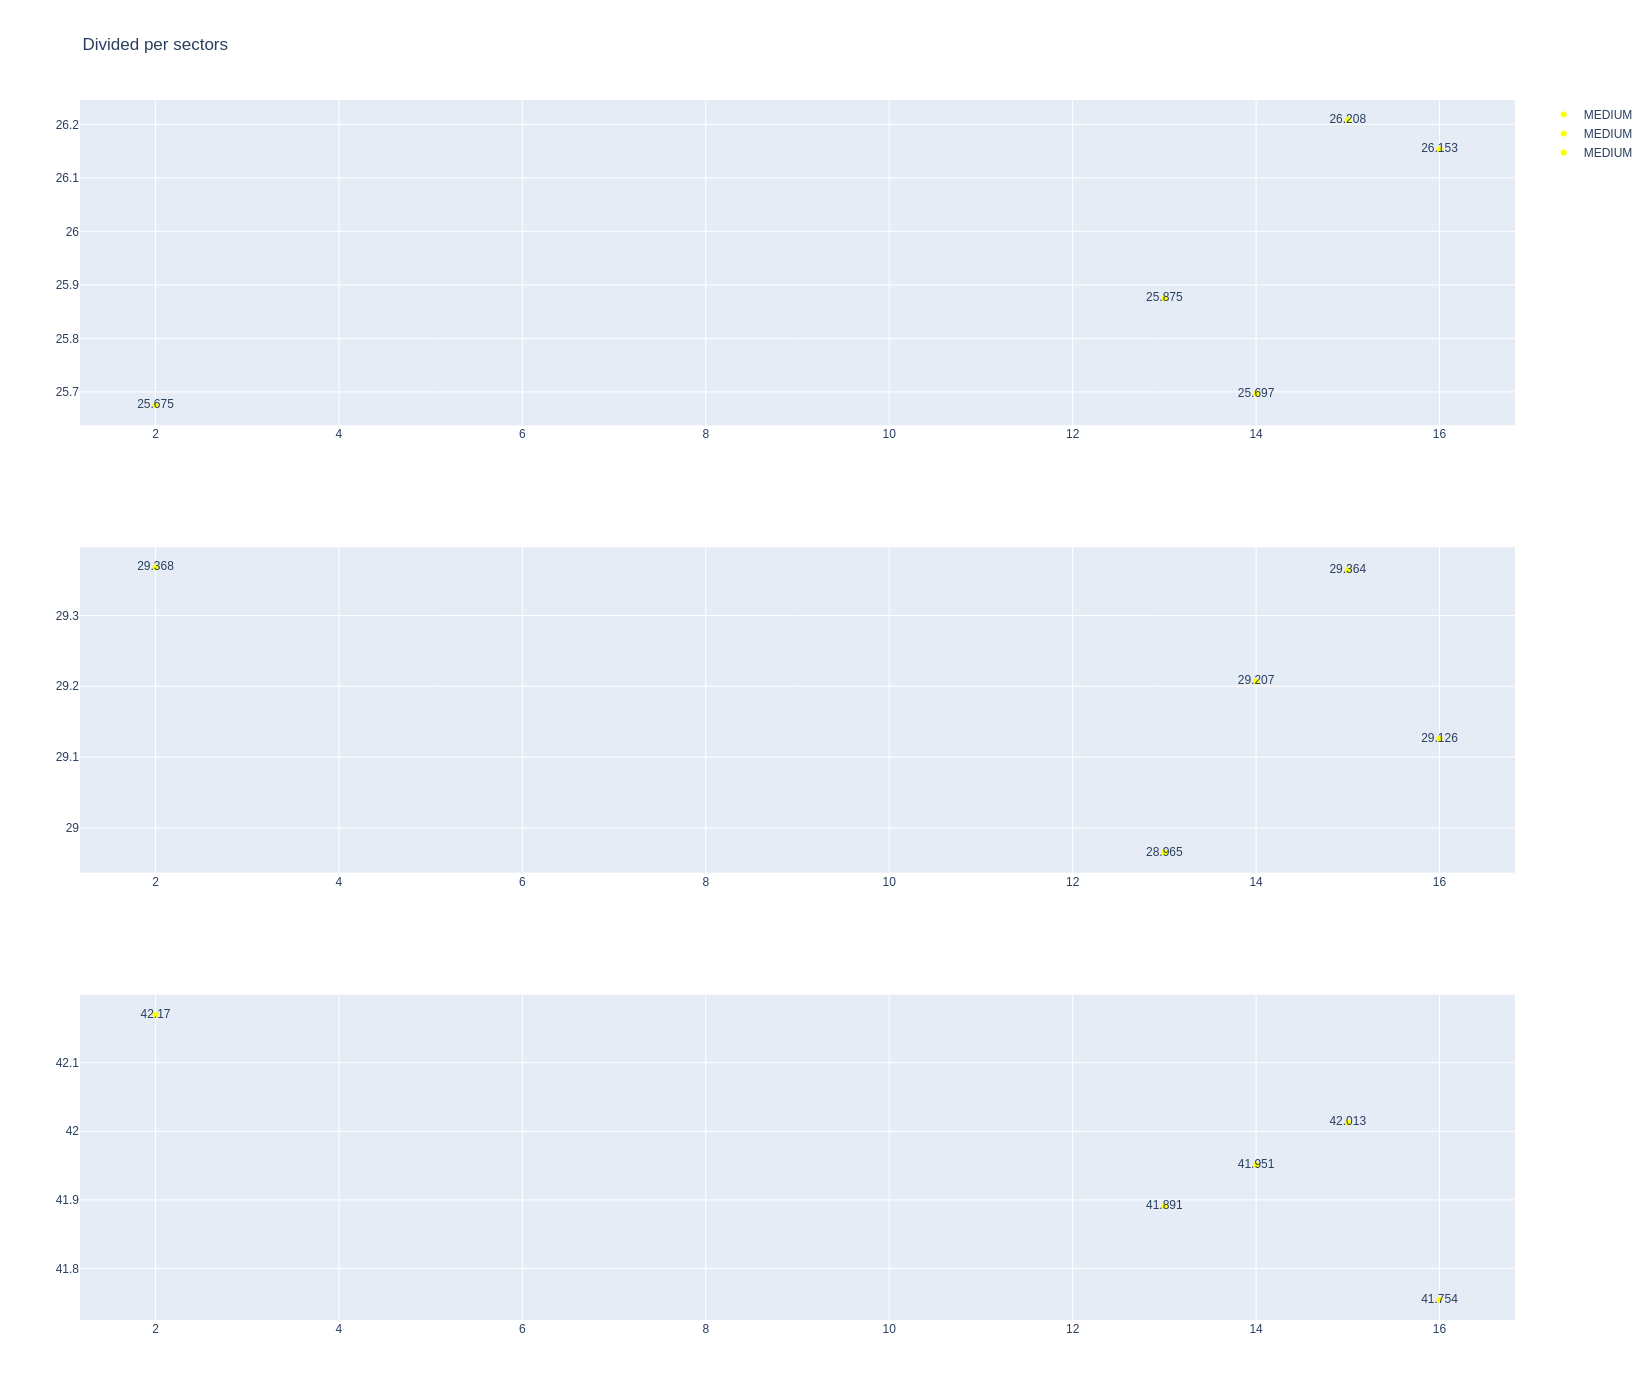

In [548]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [549]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
250  Pierre GASLY   MEDIUM  2025-03-21T04:04:37.183000+00:00          12   
270  Pierre GASLY   MEDIUM  2025-03-21T04:06:13.600000+00:00          13   
289  Pierre GASLY   MEDIUM  2025-03-21T04:07:50.147000+00:00          14   
305  Pierre GASLY   MEDIUM  2025-03-21T04:09:27.144000+00:00          15   
323  Pierre GASLY   MEDIUM  2025-03-21T04:11:05.557000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
250             25.667             28.867             41.761        96.295  
270             25.888             29.080             41.649        96.617  
289             26.052             29.462             41.499        97.013  
305             26.922             29.416             41.993        98.331  
323             26.528             29.707             41.883        98.118

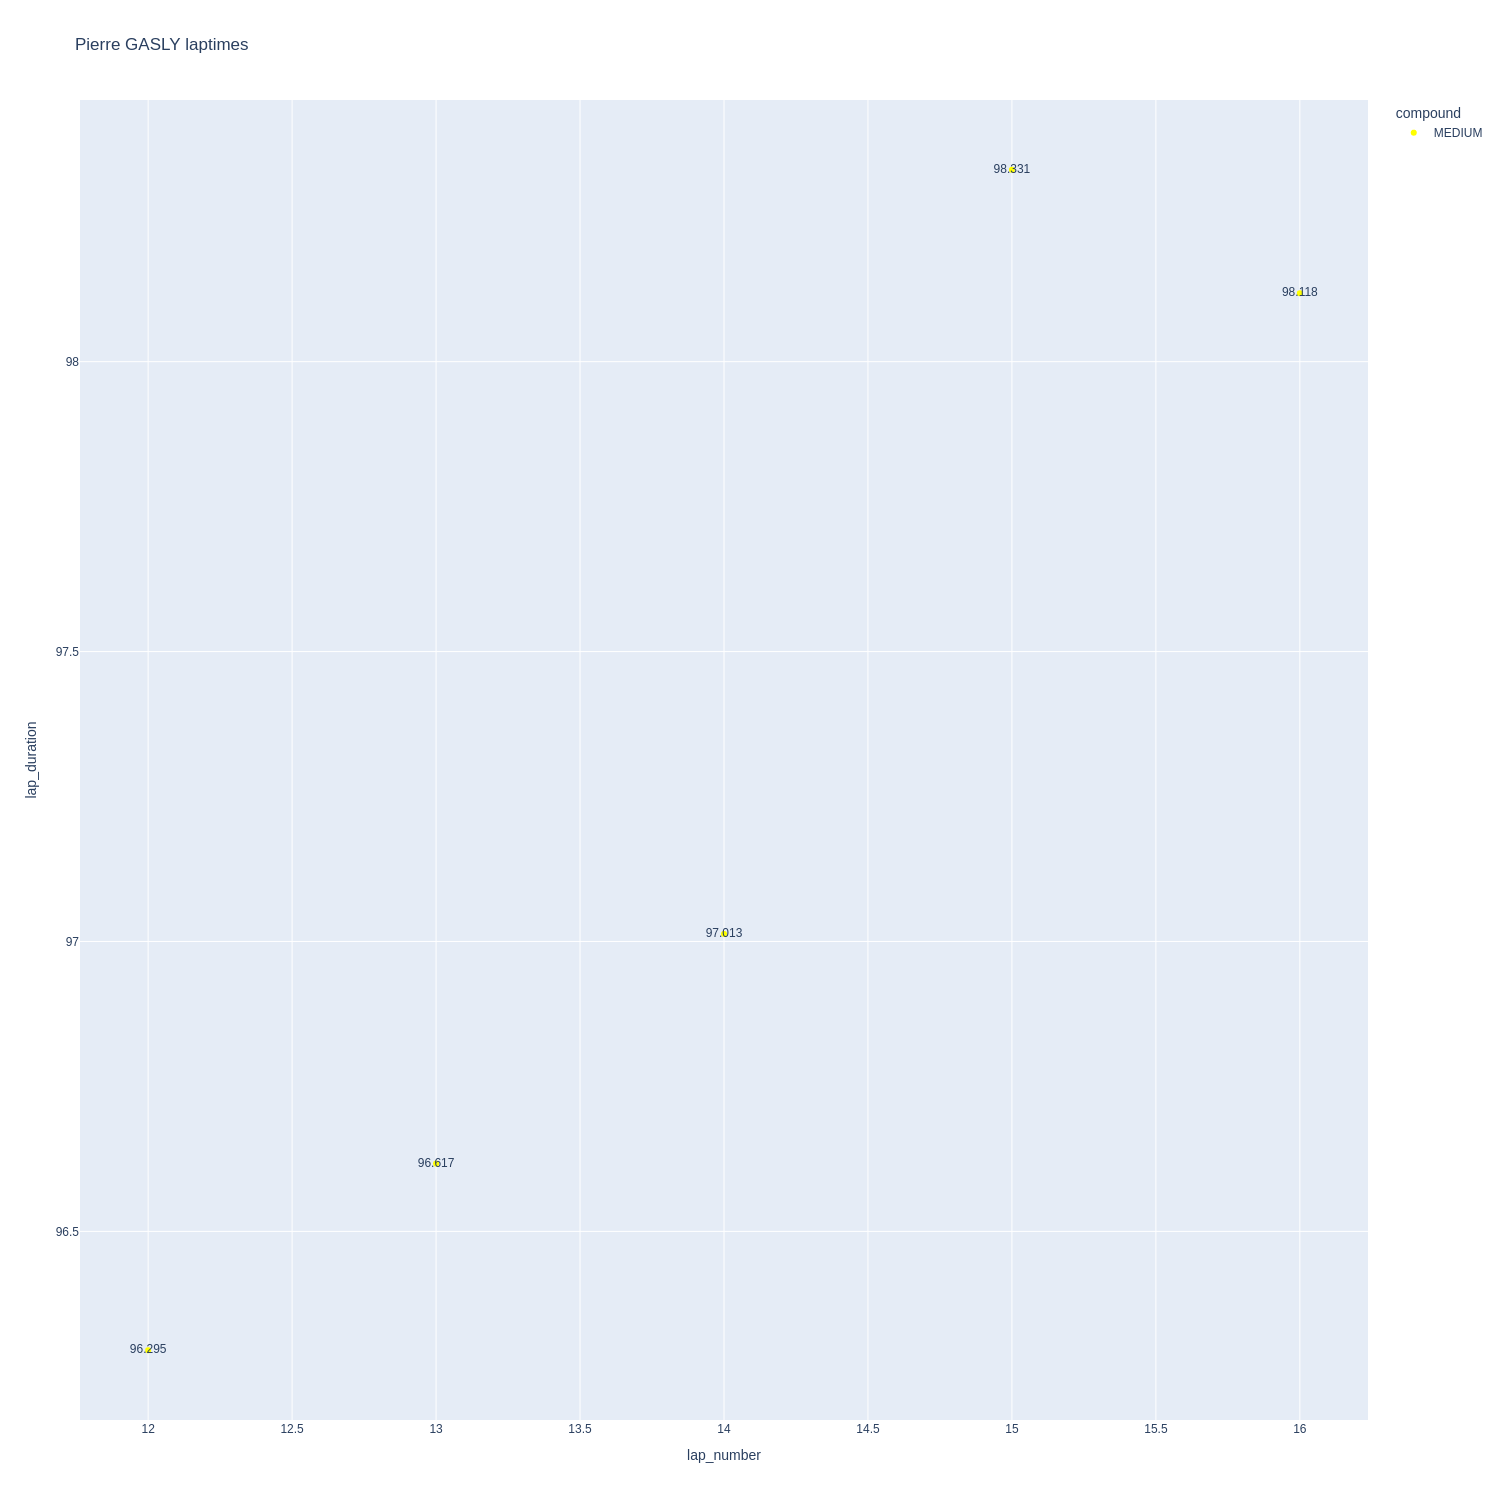

In [550]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

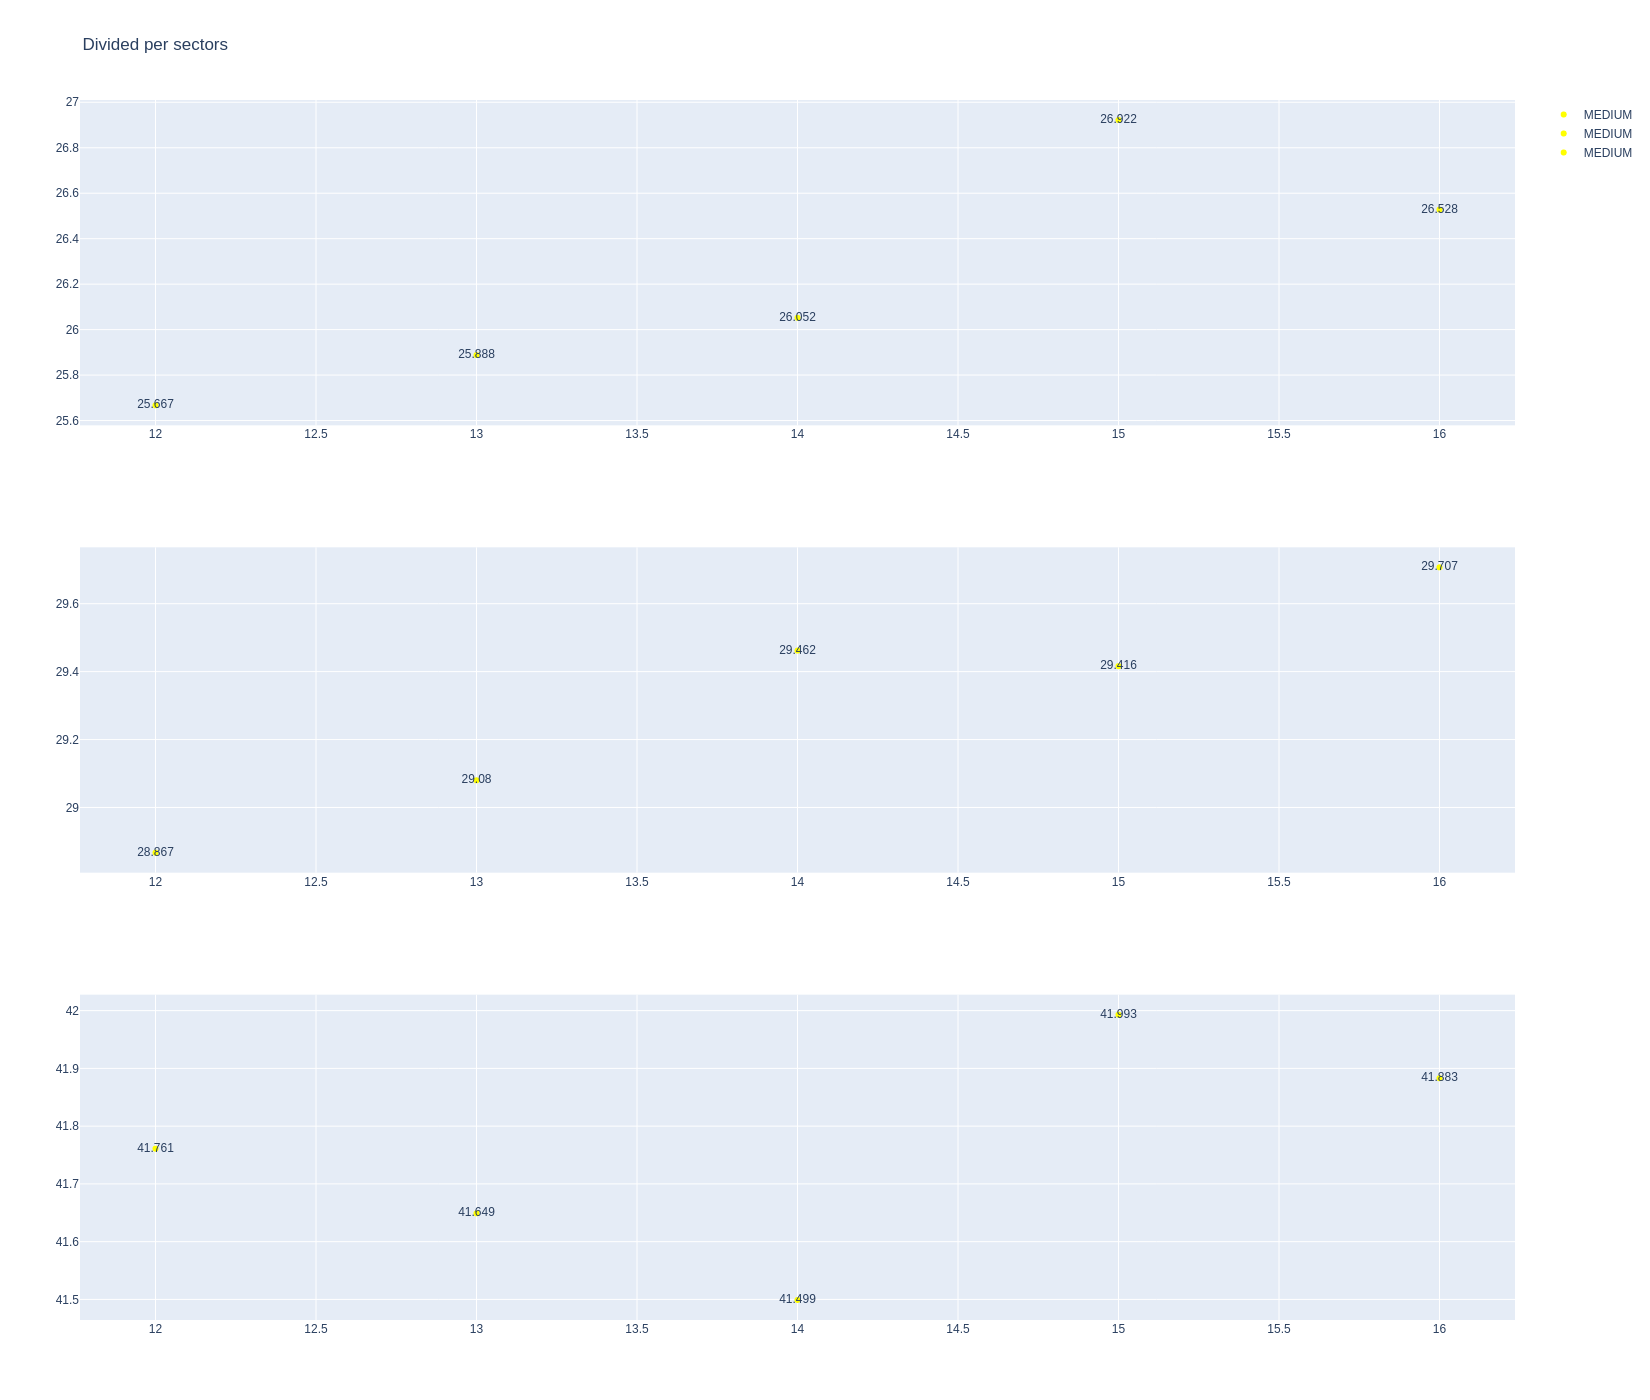

In [551]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [552]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
12         1255         9988             1             23          1       10   
17         1255         9988             1             55          1       11   
34         1255         9988             2             23         11       18   
37         1255         9988             2             55         12       12   
43         1255         9988             3             55         13       20   
49         1255         9988             3             23         19       19   
57         1255         9988             4             23         20       22   
61         1255         9988             4             55         21       21   
64         1255         9988             5             55         21       25   
70         1255         9988             5             23         23       25   
71         1255         9988             6             55         25       27   

   compound  tyre_age_at_start  
12   MEDIUM                  0  
17   MEDIUM                  0  
34   MEDIUM                  0  
37   MEDIUM                 10  
43   MEDIUM                 11  
49   MEDIUM                 17  
57     SOFT                  0  
61   MEDIUM                 19  
64     SOFT                  0  
70   MEDIUM                 18  
71   MEDIUM                 20

In [553]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
198  Alexander ALBON   MEDIUM  2025-03-21T03:59:14.412000+00:00          12   
212  Alexander ALBON   MEDIUM  2025-03-21T04:00:50.724000+00:00          13   
227  Alexander ALBON   MEDIUM  2025-03-21T04:02:27.503000+00:00          14   
243  Alexander ALBON   MEDIUM  2025-03-21T04:04:04.248000+00:00          15   
262  Alexander ALBON   MEDIUM  2025-03-21T04:05:41.931000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
198             25.789             28.987             41.663        96.439  
212             25.890             29.125             41.687        96.702  
227             25.897             29.132             41.706        96.735  
243             26.109             29.416             42.152        97.677  
262             26.219             29.582             42.294        98.095

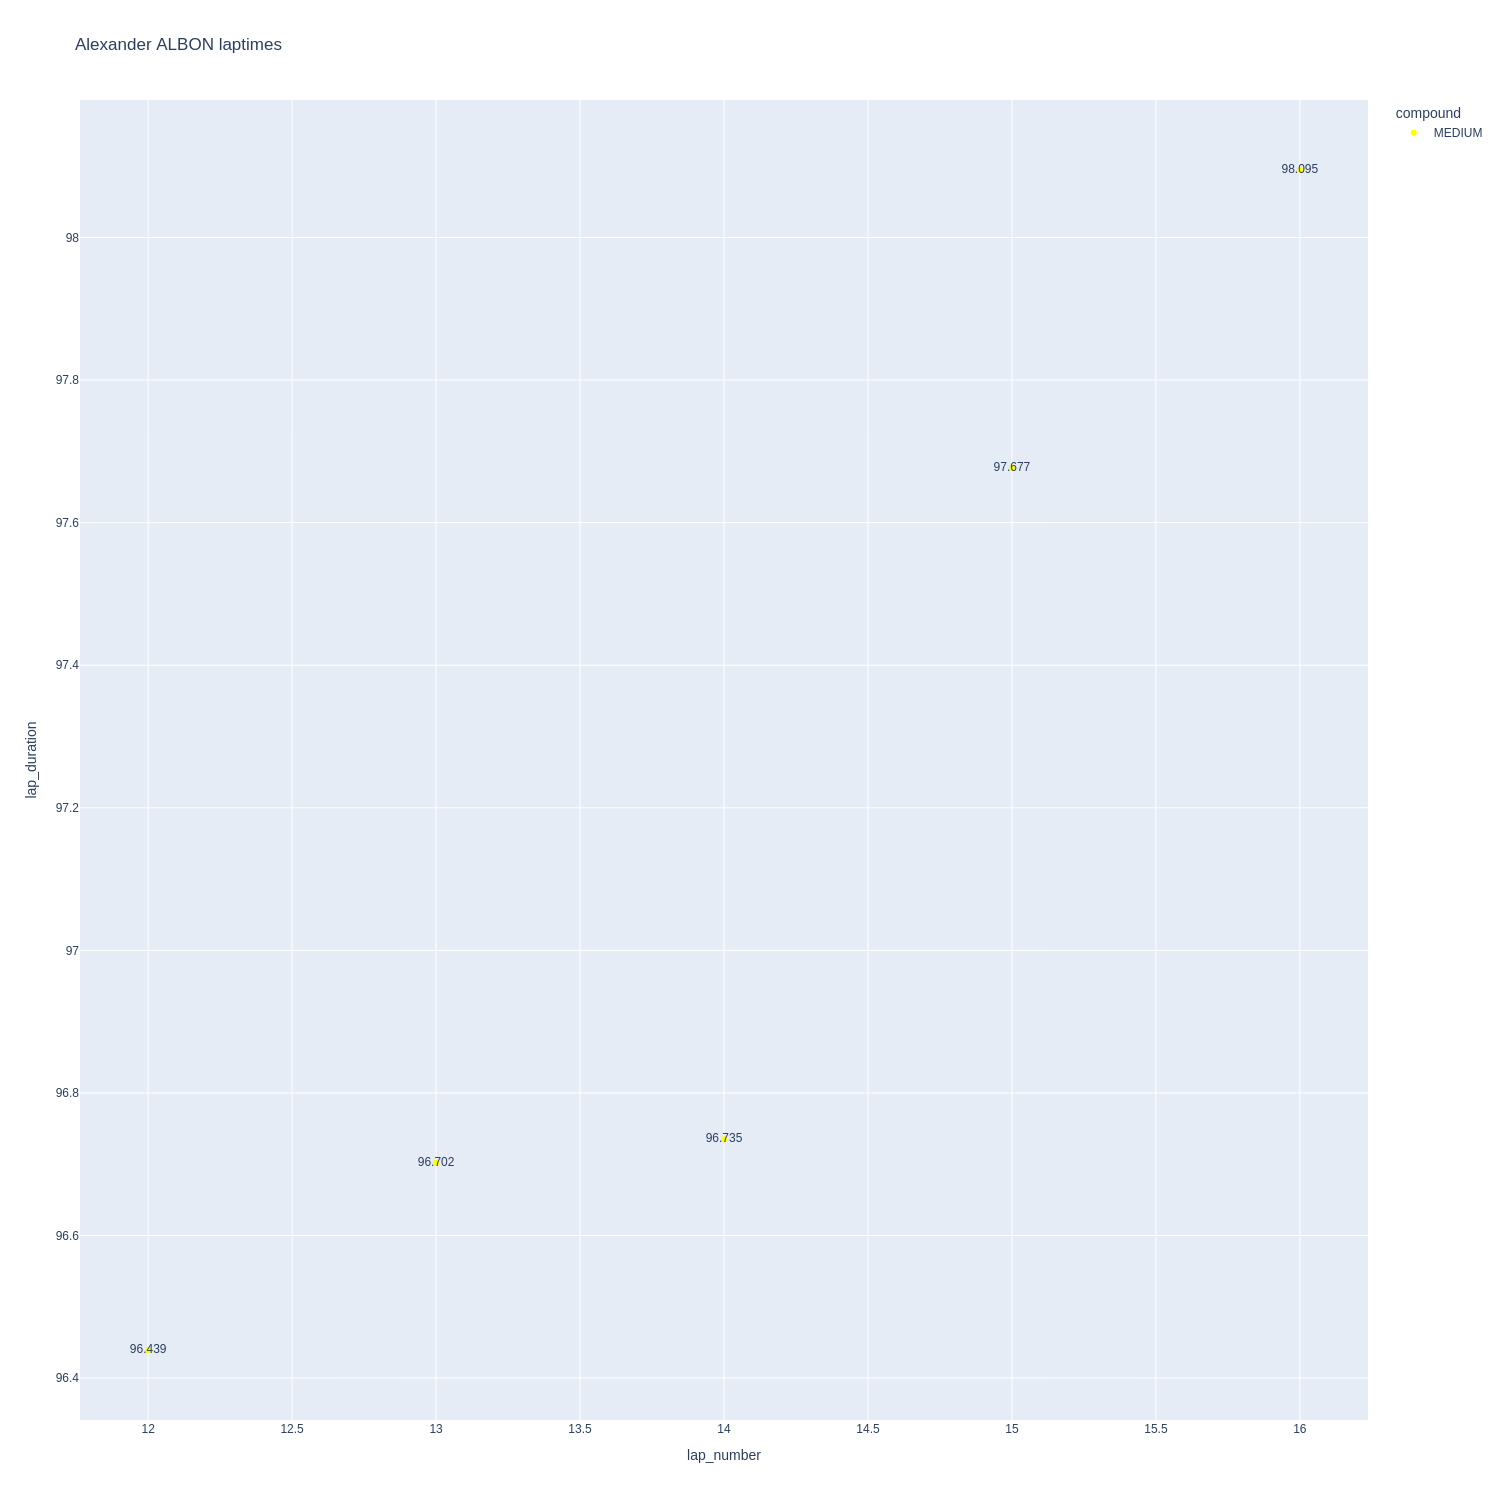

In [554]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

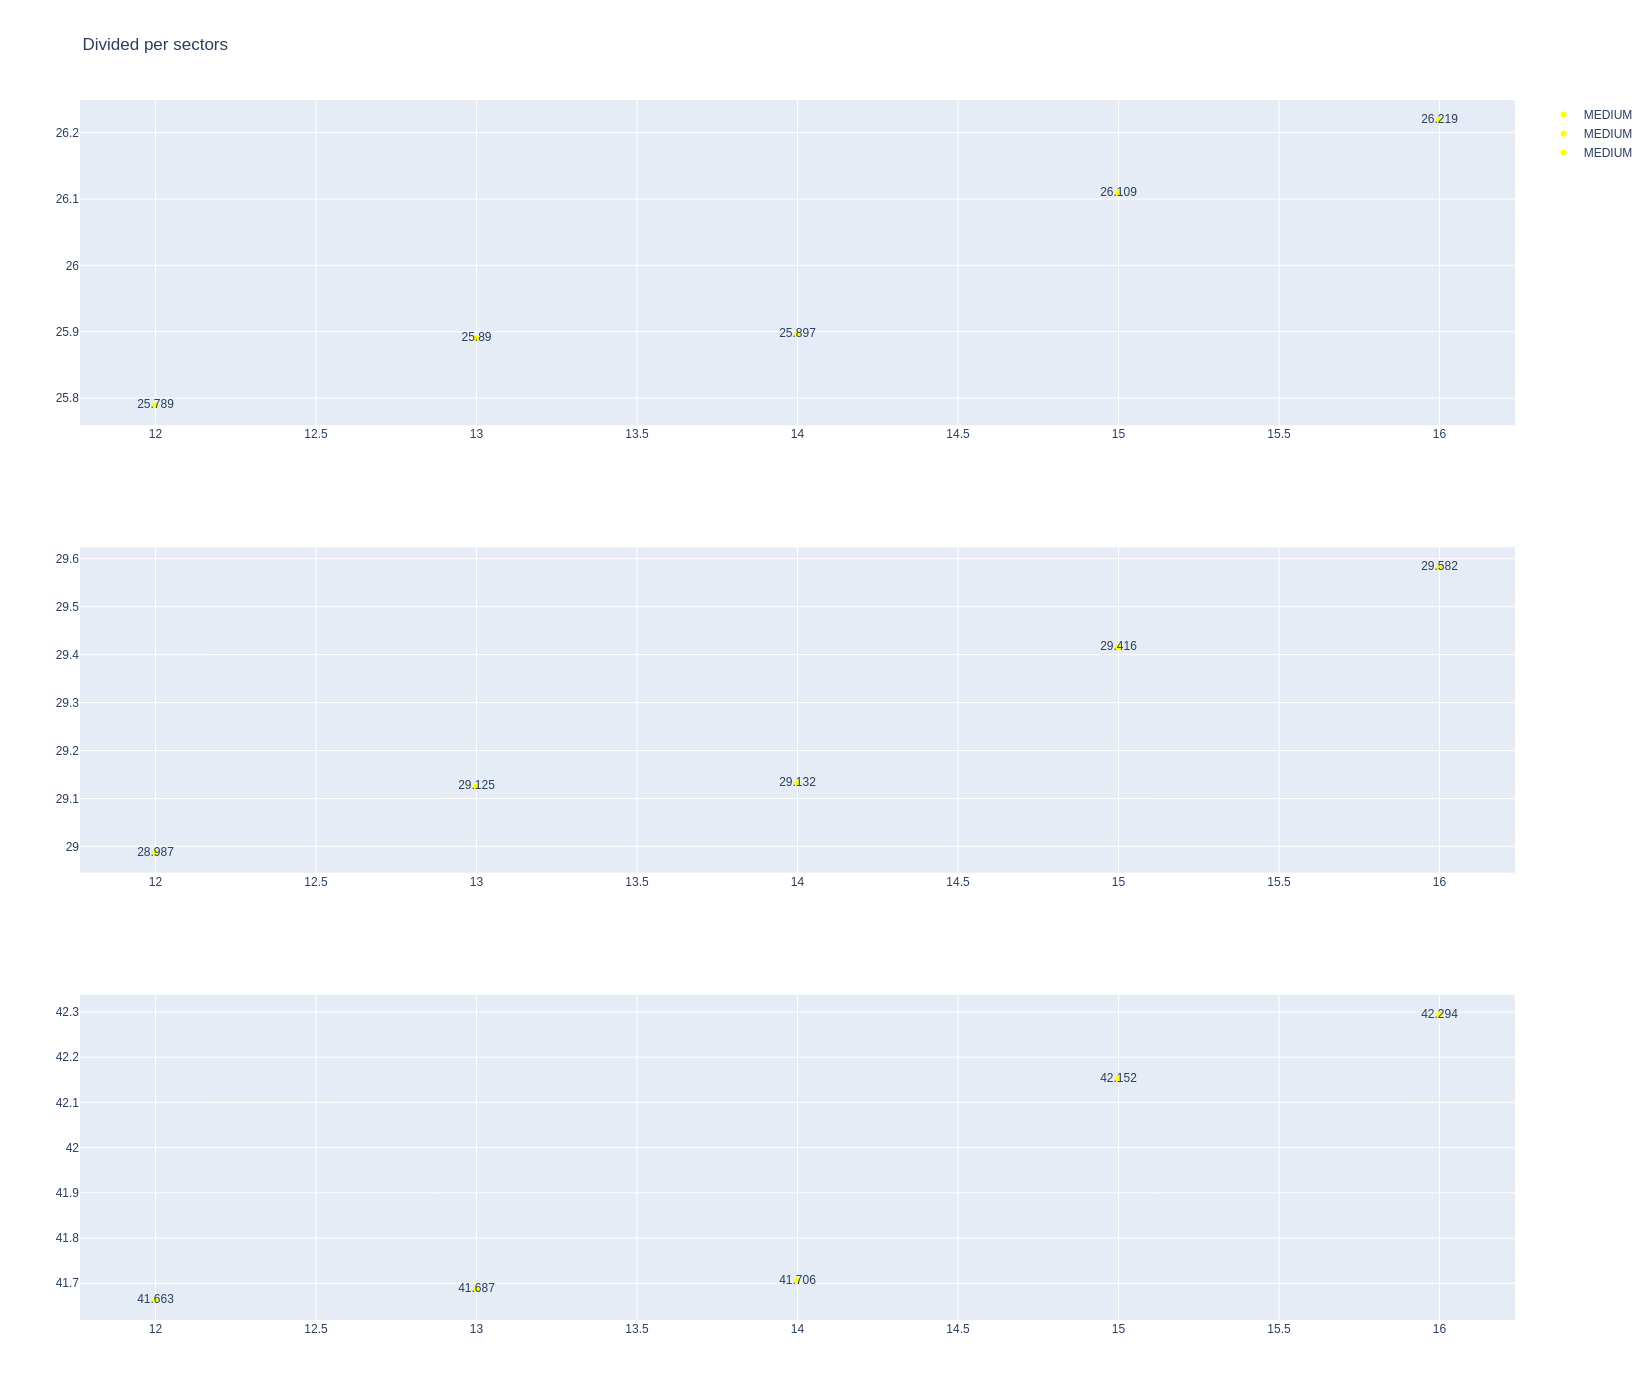

In [555]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [556]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
22   Carlos SAINZ   MEDIUM  2025-03-21T03:32:26.863000+00:00           2   
193  Carlos SAINZ   MEDIUM  2025-03-21T03:58:30.464000+00:00          13   
204  Carlos SAINZ   MEDIUM  2025-03-21T04:00:06.630000+00:00          14   
217  Carlos SAINZ   MEDIUM  2025-03-21T04:01:43.278000+00:00          15   
236  Carlos SAINZ   MEDIUM  2025-03-21T04:03:20.403000+00:00          16   
254  Carlos SAINZ   MEDIUM  2025-03-21T04:04:58.177000+00:00          17   
273  Carlos SAINZ   MEDIUM  2025-03-21T04:06:36.063000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              25.986             29.248             41.909        97.143  
193             25.802             28.855             41.458        96.115  
204             25.986             29.048             41.597        96.631  
217             26.069             29.273             41.866        97.208  
236             26.246             29.536             41.893        97.675  
254             26.168             29.383             42.332        97.883  
273             26.439             29.518             42.586        98.543

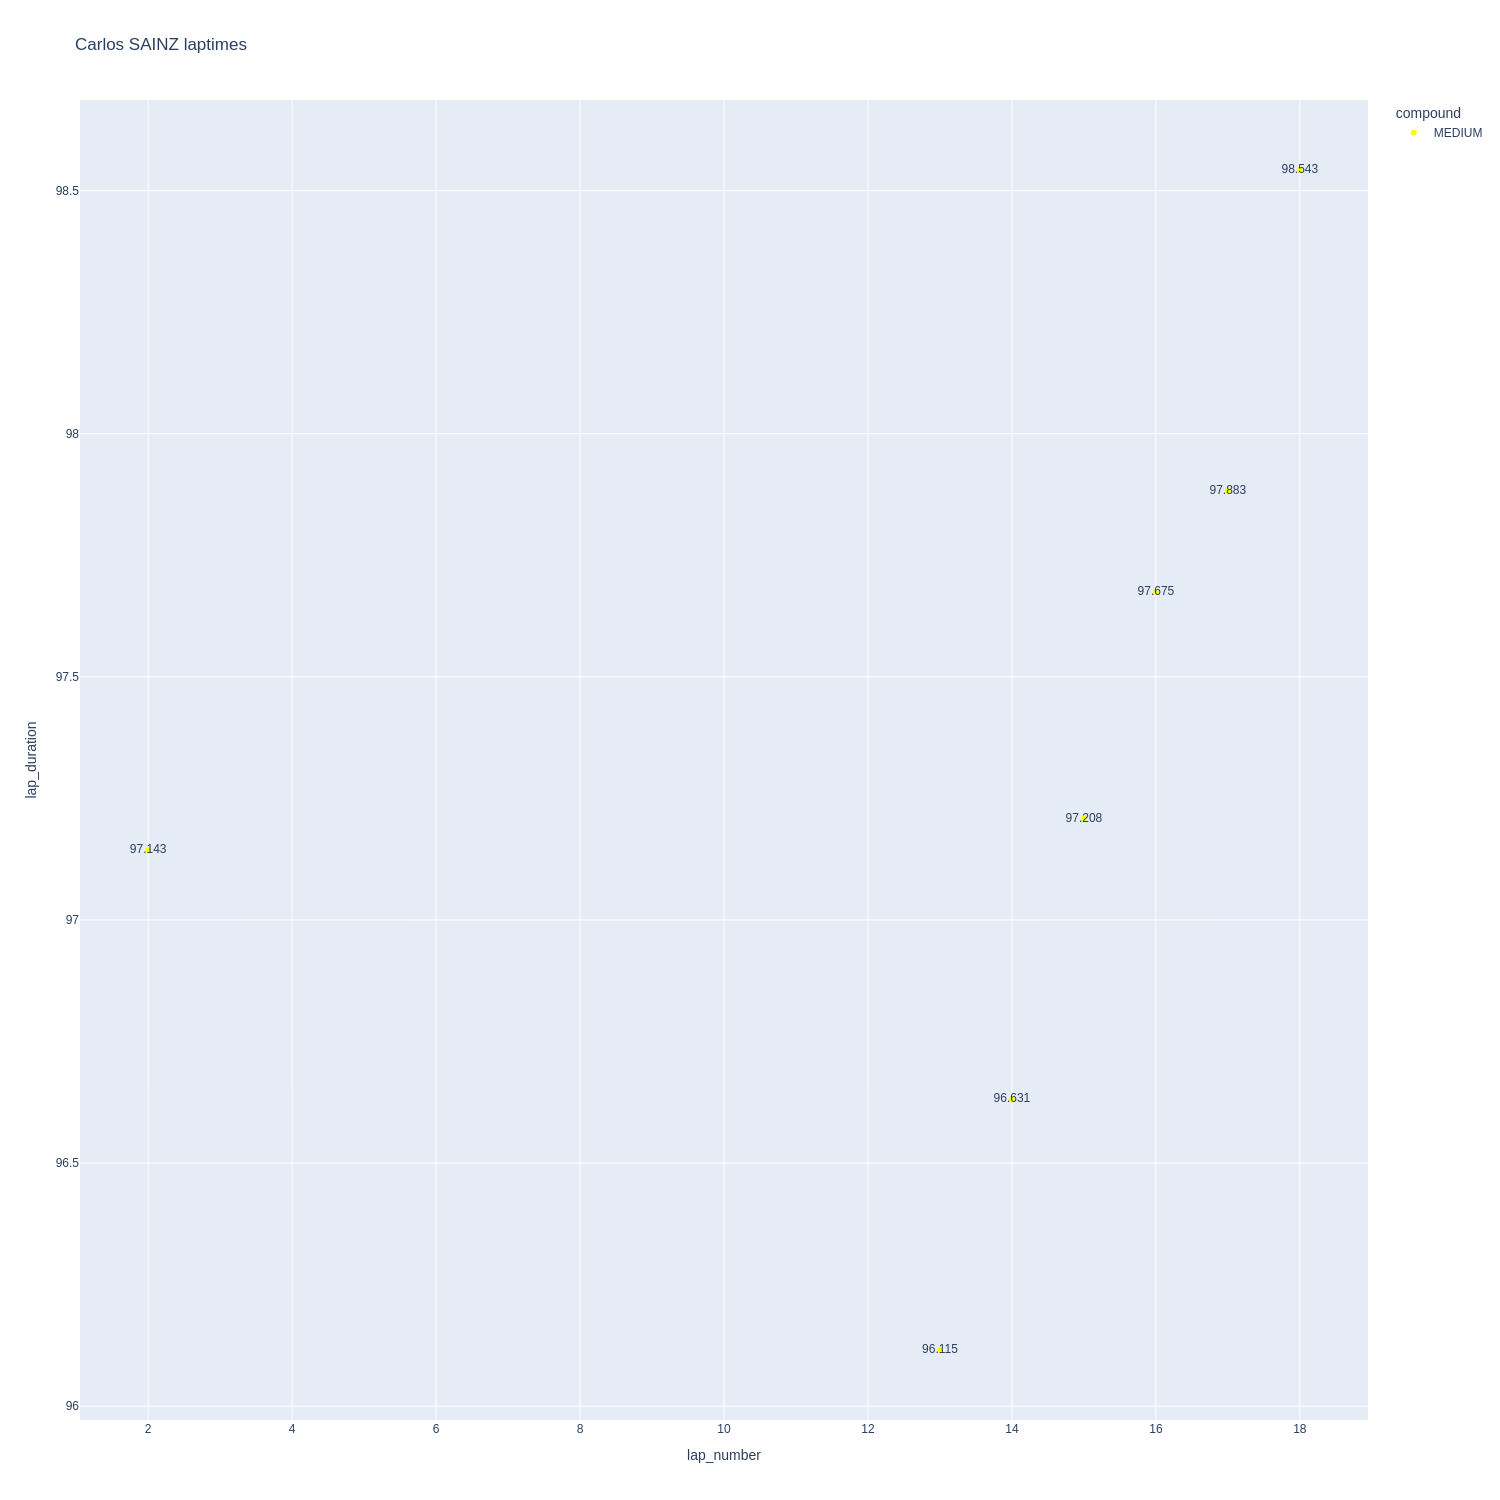

In [557]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

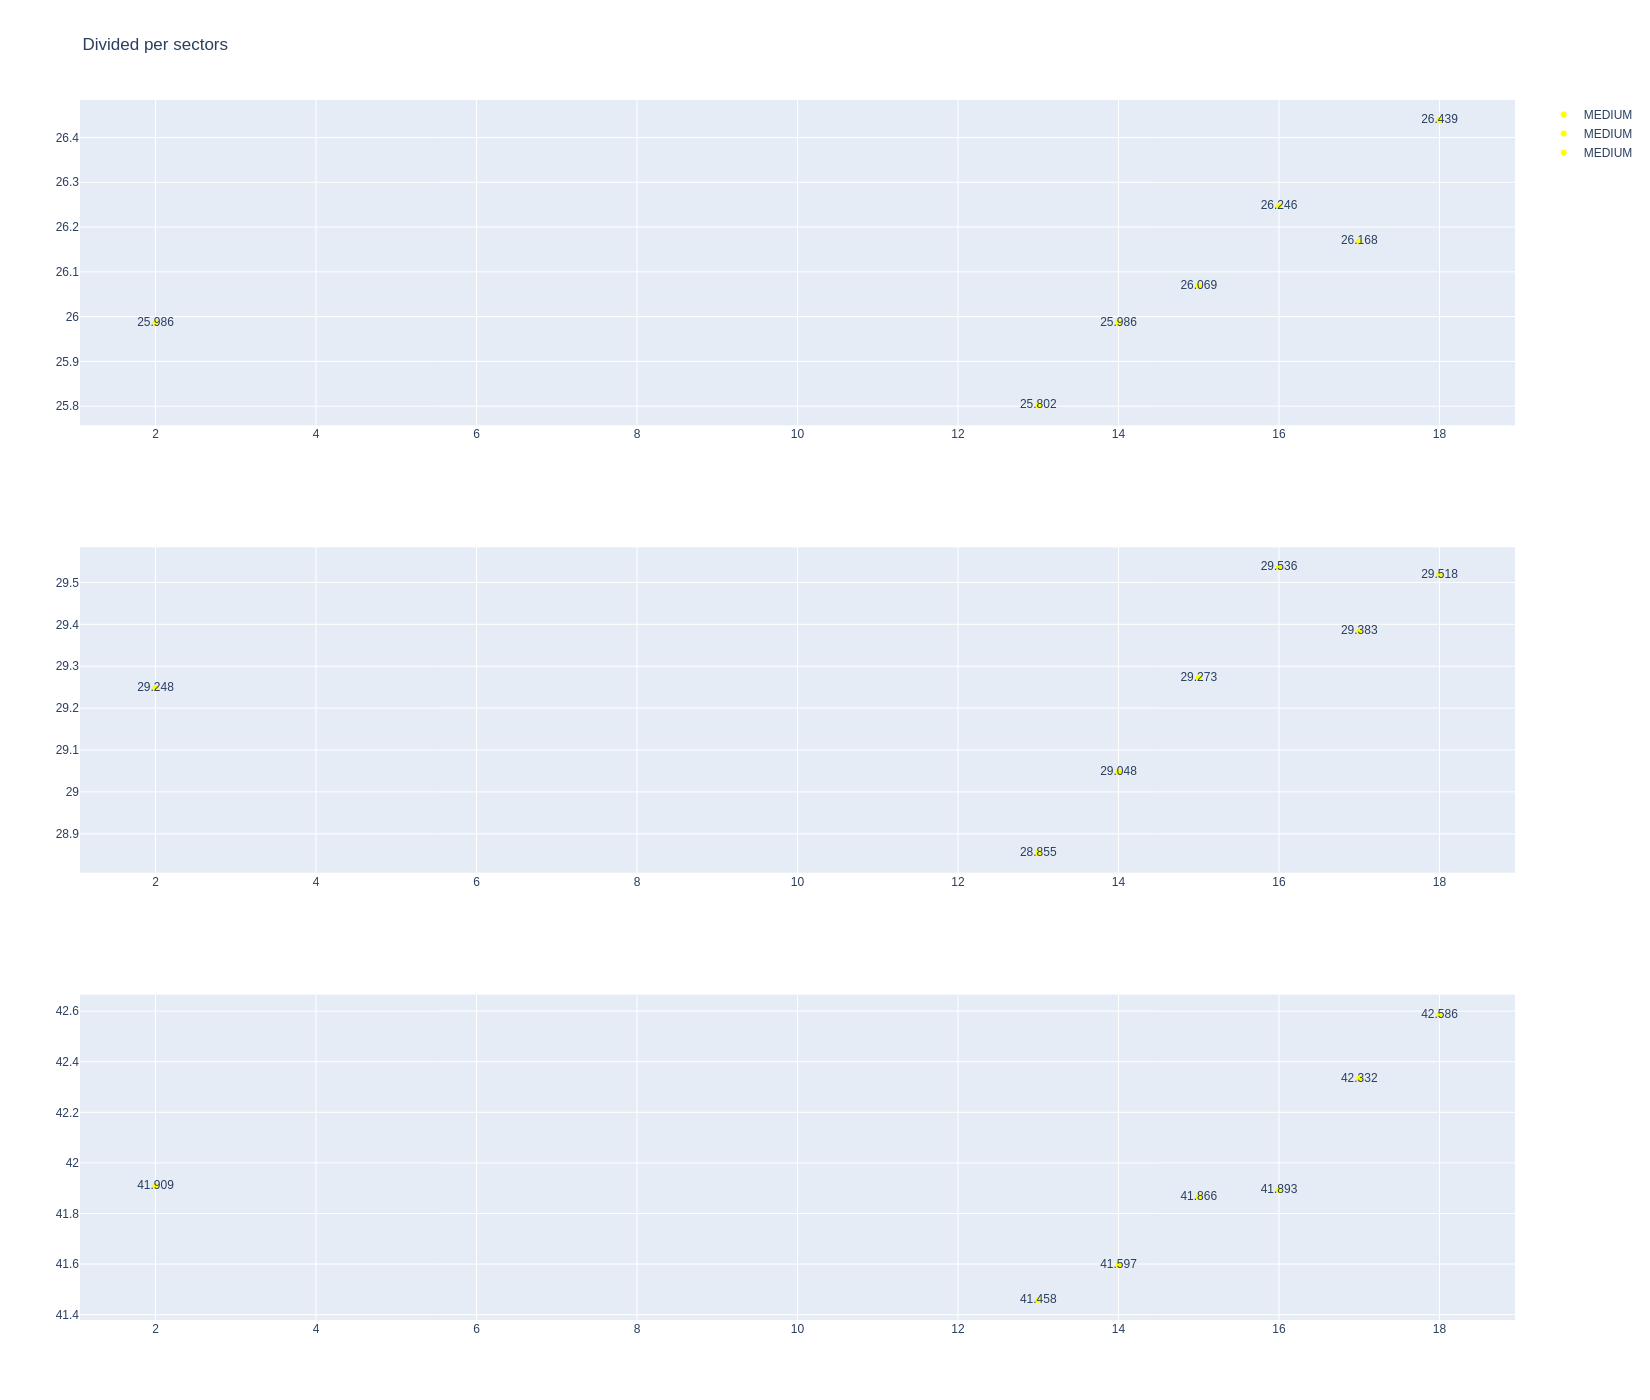

In [558]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [559]:
stintInformation.query('driver_number == 5 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1255         9988             1             27          1        6   
3          1255         9988             1              5          1        7   
22         1255         9988             2             27          7       11   
23         1255         9988             2              5          8       19   
38         1255         9988             3             27         12       16   
47         1255         9988             4             27         17       22   
59         1255         9988             3              5         20       25   

   compound  tyre_age_at_start  
2    MEDIUM                  0  
3    MEDIUM                  0  
22   MEDIUM                  5  
23   MEDIUM                  6  
38   MEDIUM                 10  
47     SOFT                  0  
59     SOFT                  0

In [560]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
28   Gabriel BORTOLETO   MEDIUM  2025-03-21T03:33:11.111000+00:00           2   
72   Gabriel BORTOLETO   MEDIUM  2025-03-21T03:37:30.766000+00:00           4   
248  Gabriel BORTOLETO   MEDIUM  2025-03-21T04:04:29.250000+00:00          13   
288  Gabriel BORTOLETO   MEDIUM  2025-03-21T04:07:49.366000+00:00          15   
306  Gabriel BORTOLETO   MEDIUM  2025-03-21T04:09:27.851000+00:00          16   
324  Gabriel BORTOLETO   MEDIUM  2025-03-21T04:11:07.181000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
28              26.422             30.071             42.261        98.754  
72              26.342             29.248             41.573        97.163  
248             26.254             29.466             42.781        98.501  
288             26.259             29.385             42.811        98.455  
306             26.745             30.080             42.585        99.410  
324             26.897             29.716             42.453        99.066

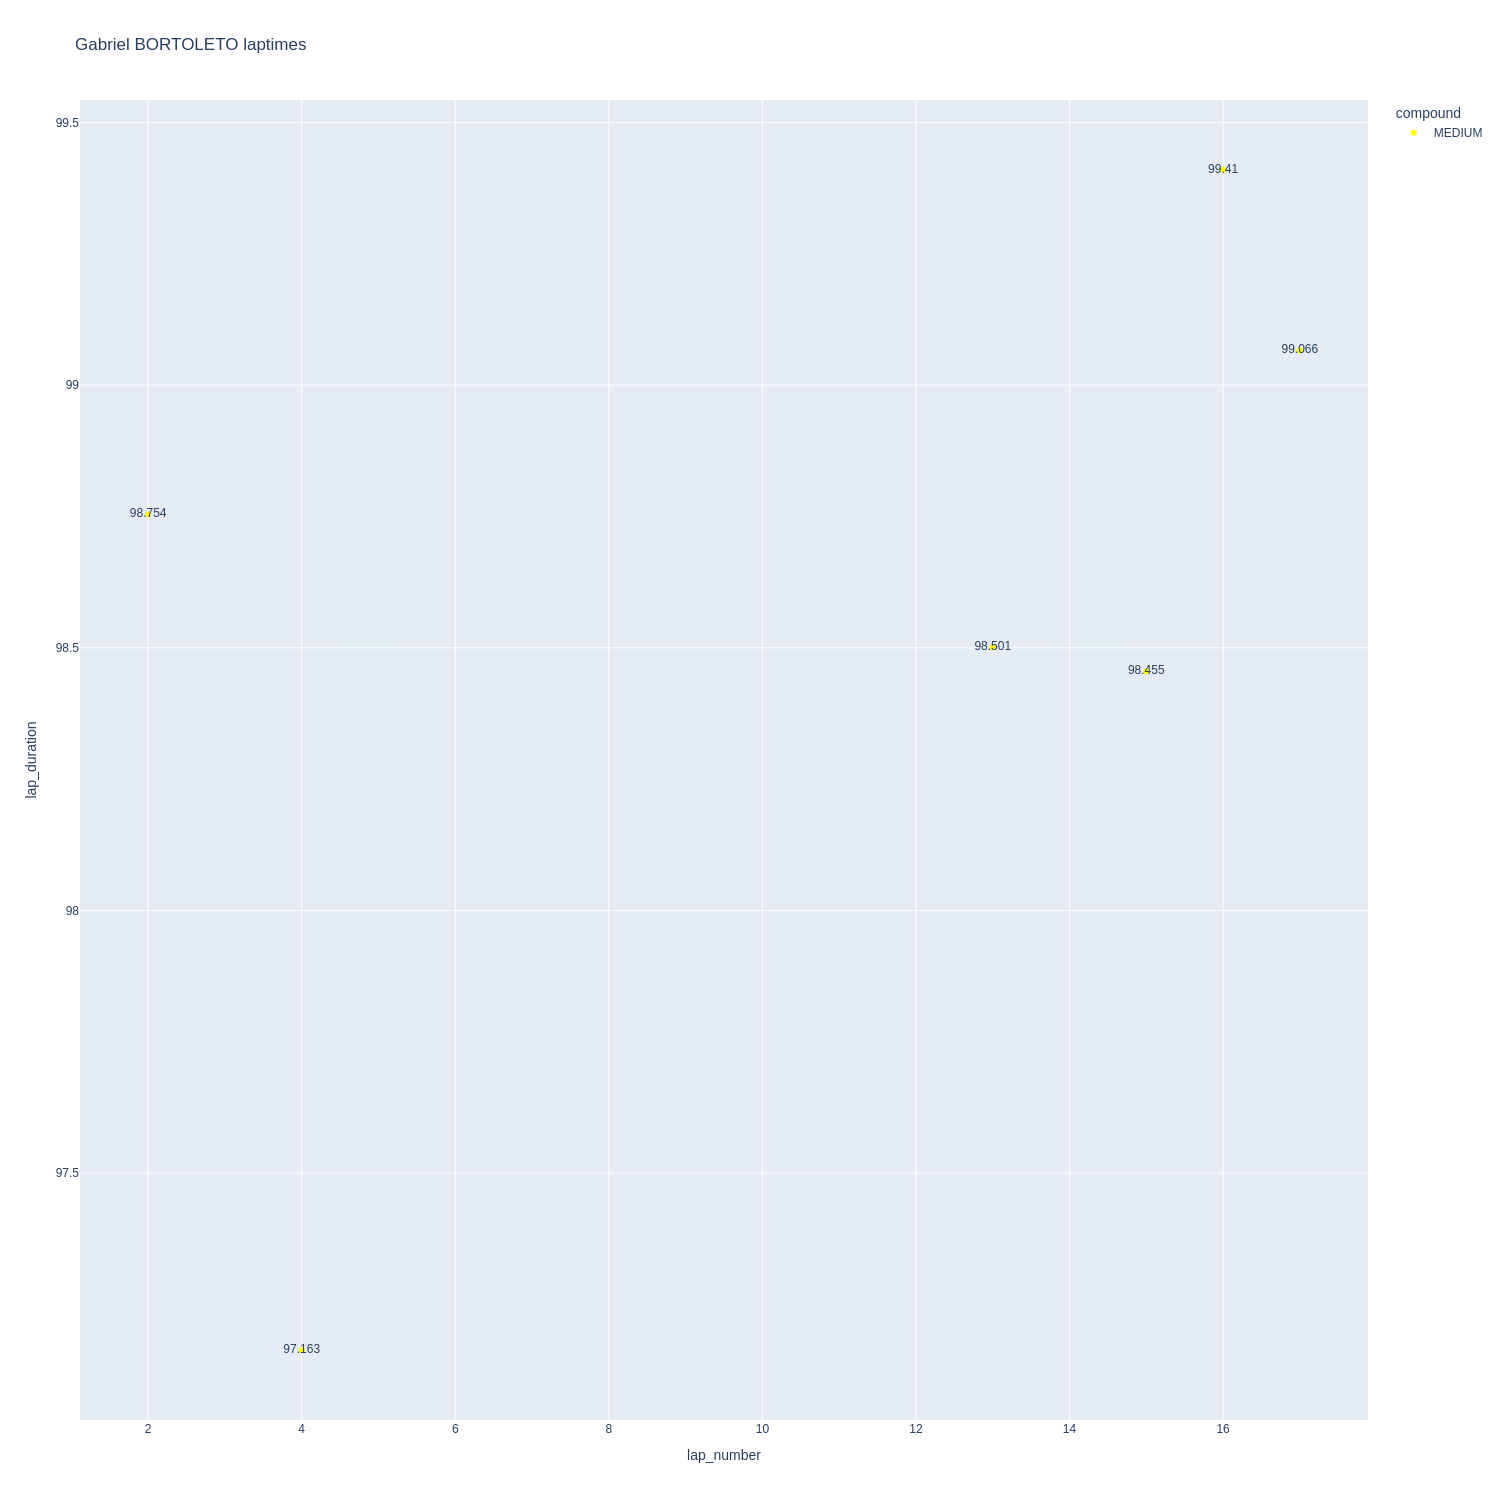

In [561]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

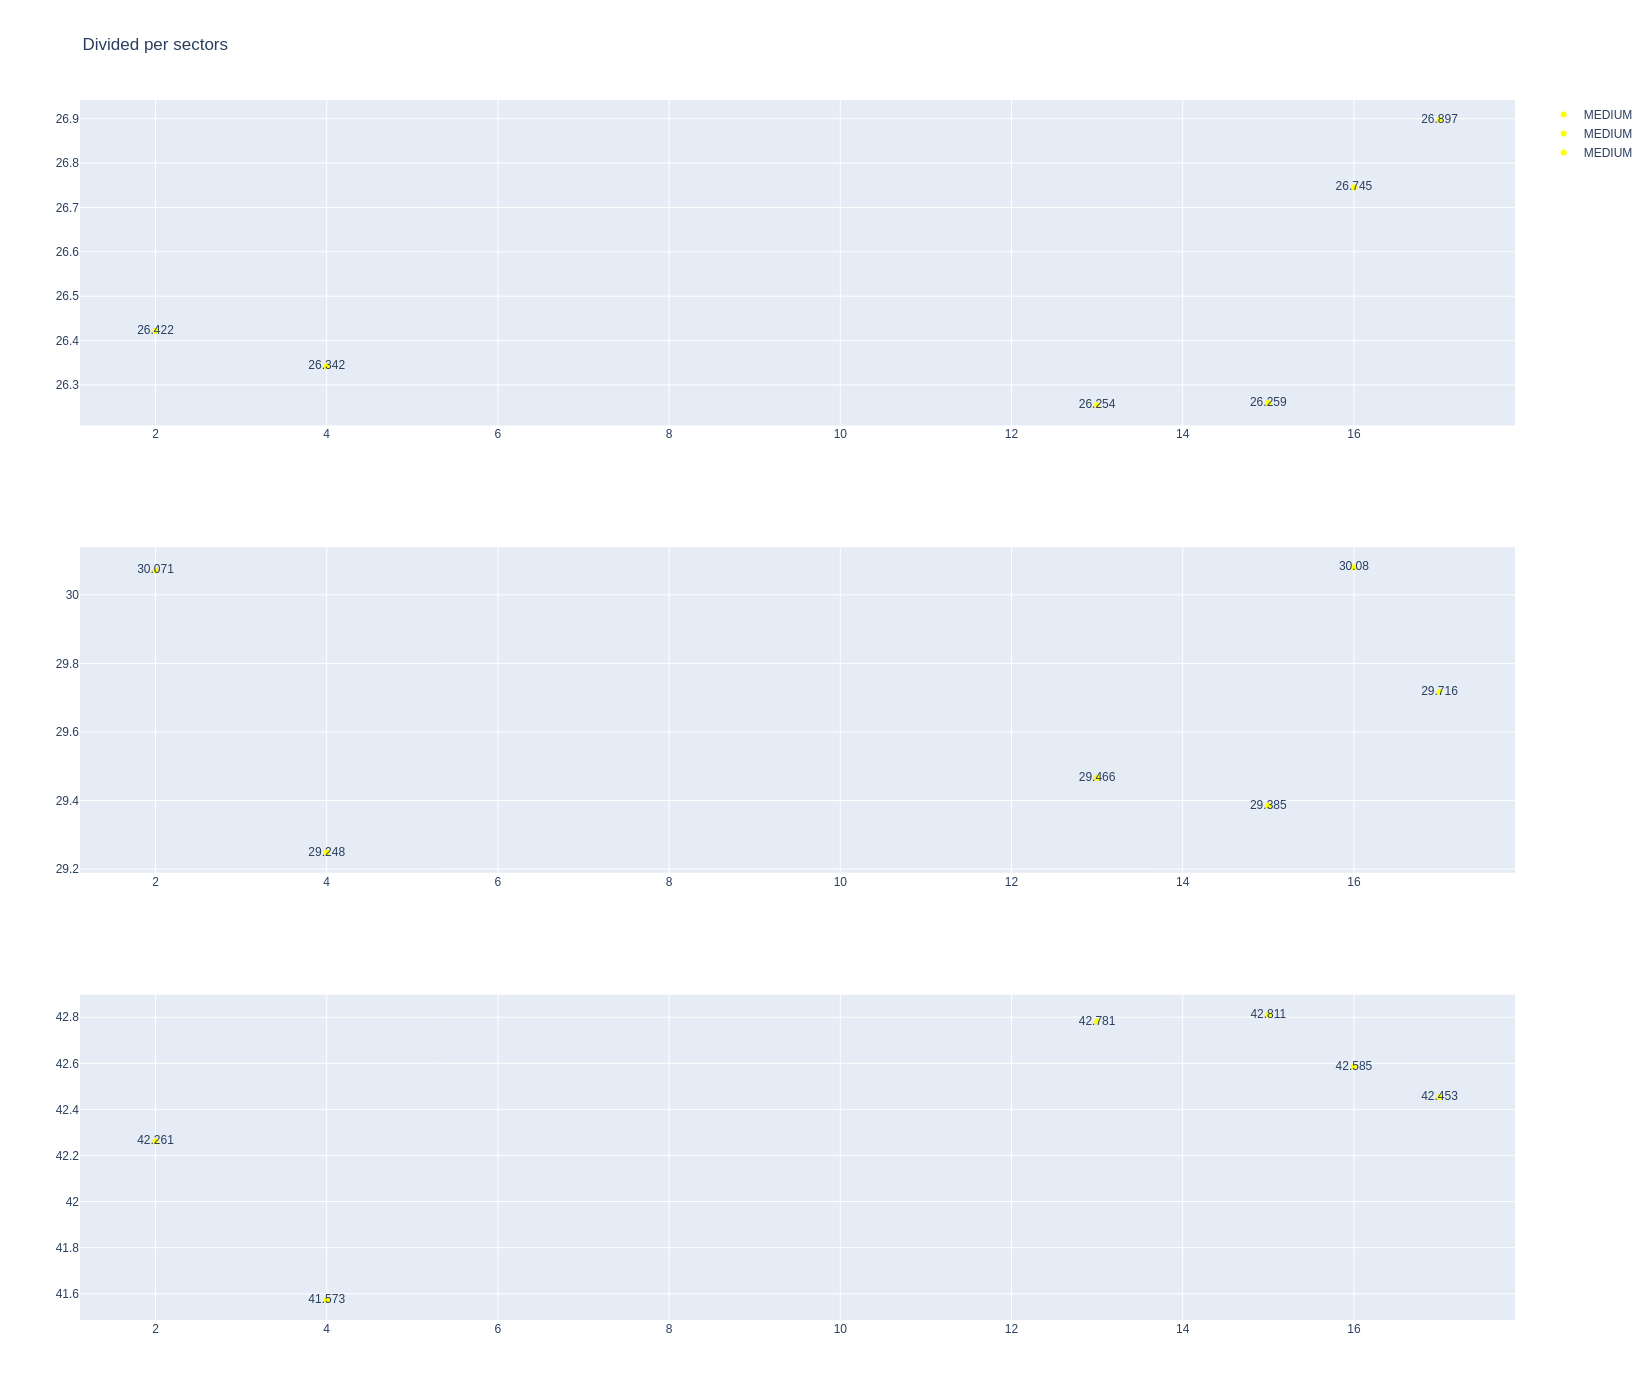

In [562]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [563]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
39   Nico HULKENBERG   MEDIUM  2025-03-21T03:33:50.842000+00:00           2   
269  Nico HULKENBERG   MEDIUM  2025-03-21T04:06:10.461000+00:00          12   
287  Nico HULKENBERG   MEDIUM  2025-03-21T04:07:48.287000+00:00          13   
304  Nico HULKENBERG   MEDIUM  2025-03-21T04:09:24.806000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
39              26.463             29.082             41.494        97.039  
269             25.597             29.587             42.550        97.734  
287             25.724             29.300             41.539        96.563  
304             25.938             29.086             41.593        96.617

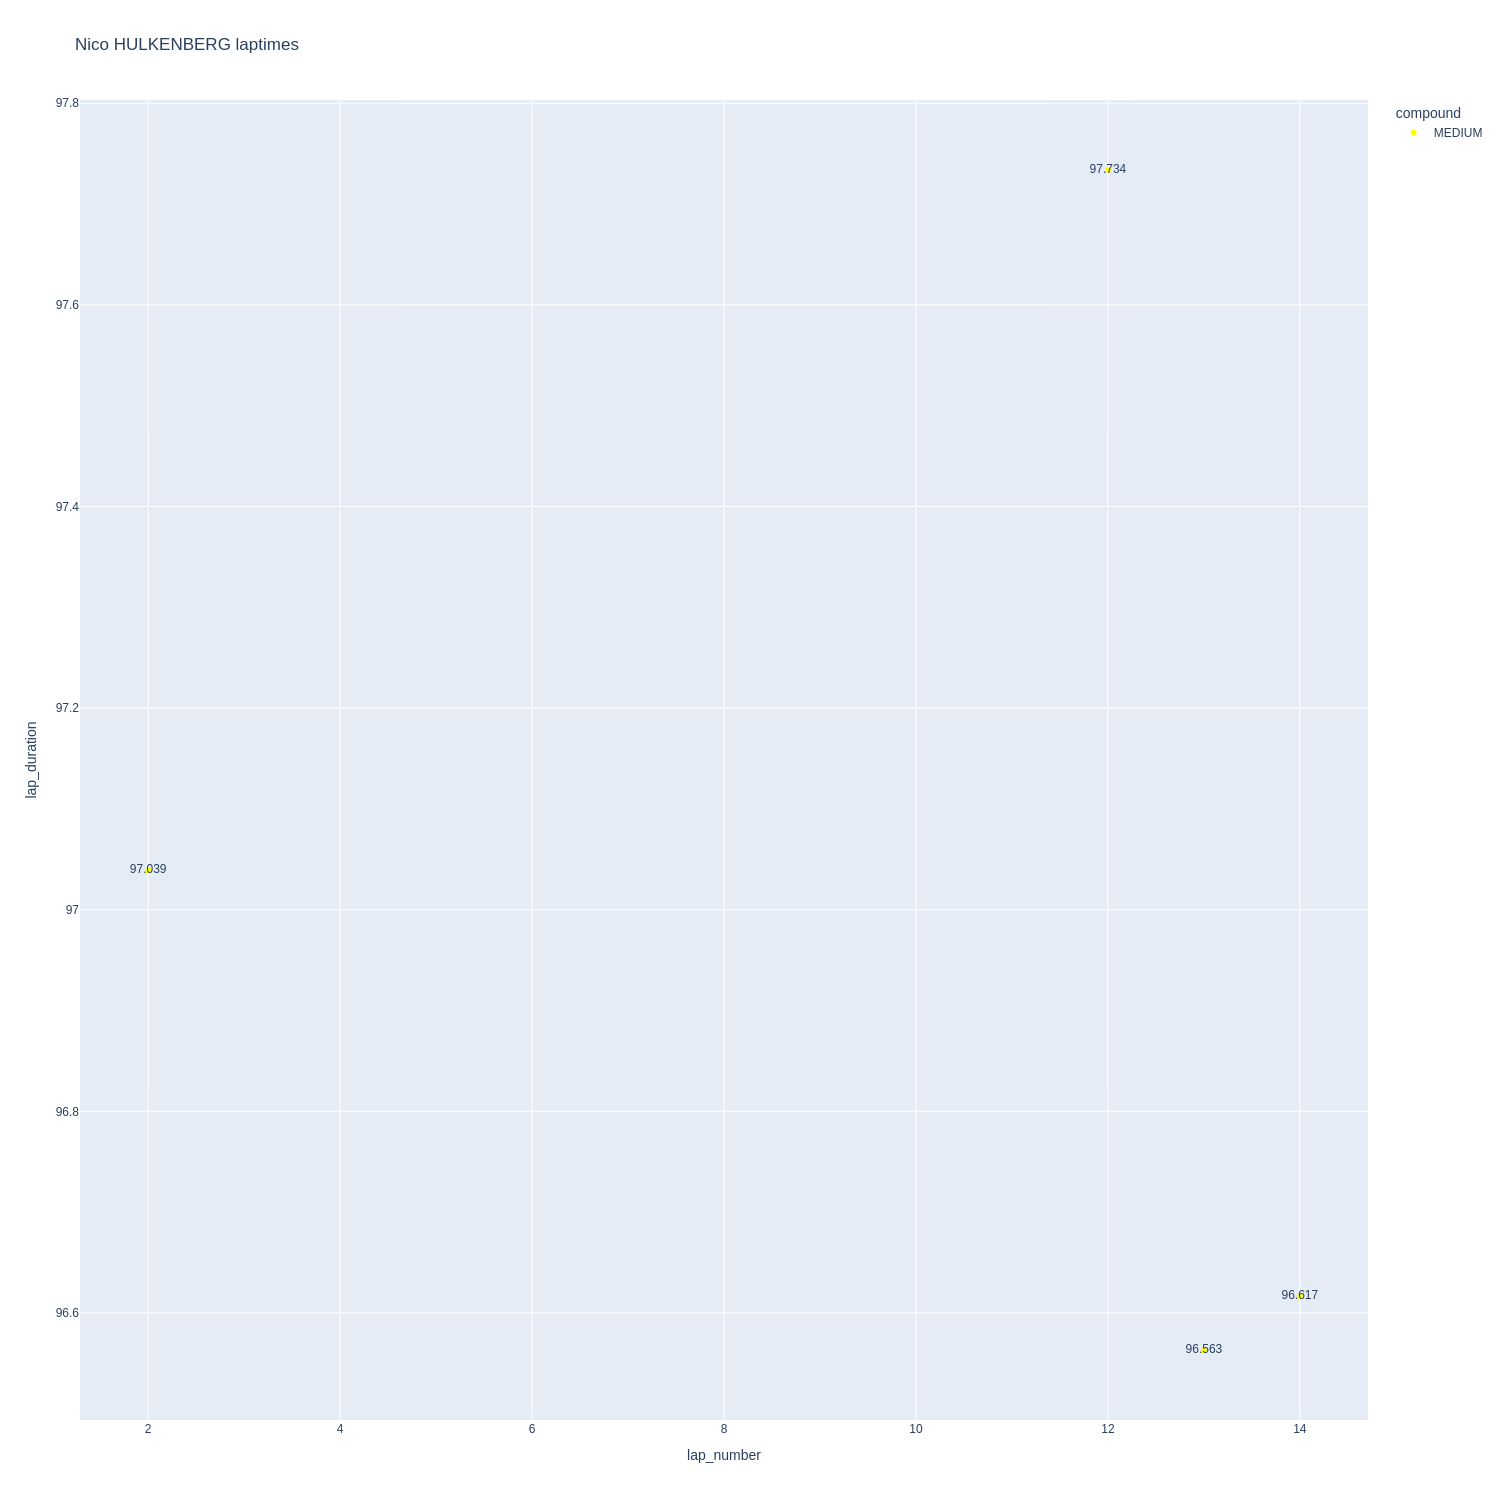

In [564]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

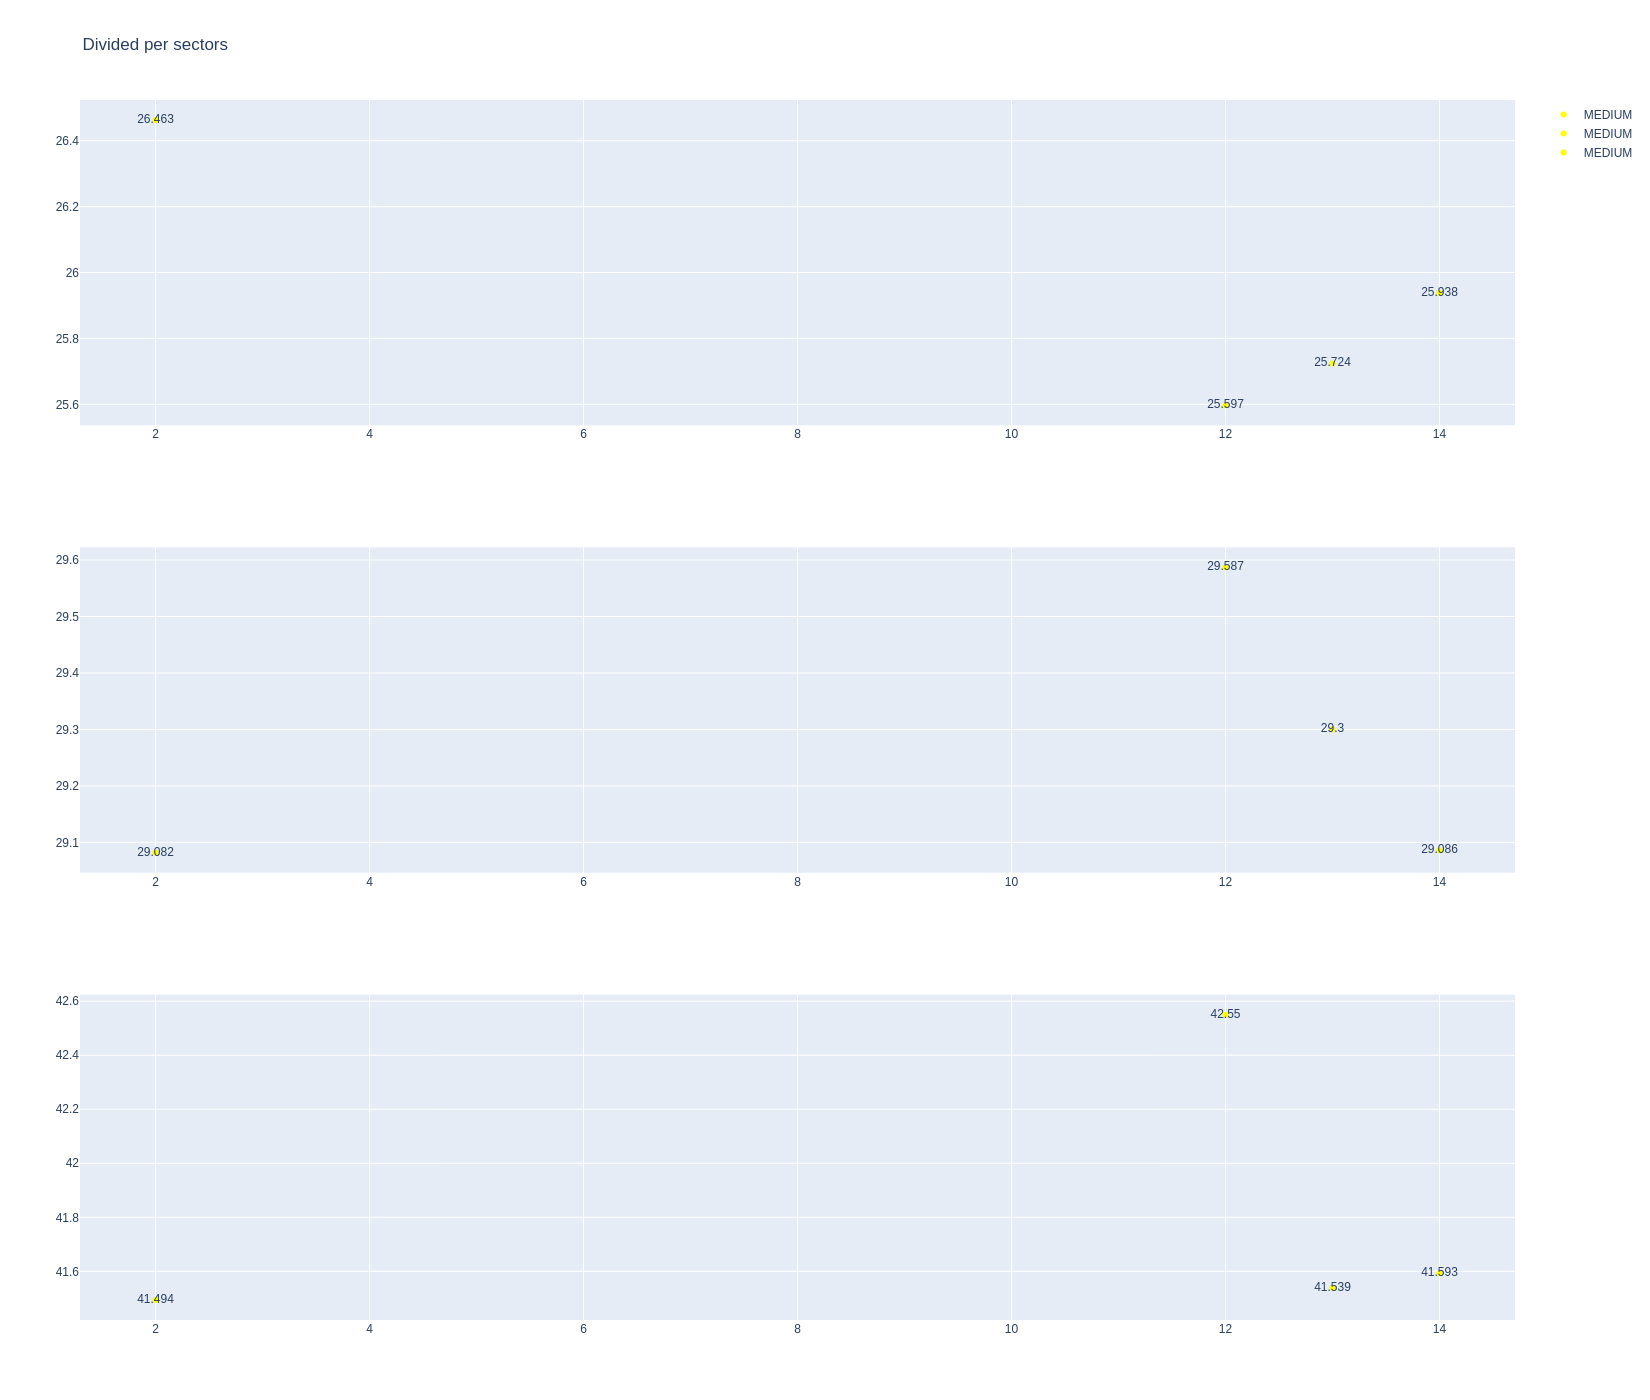

In [565]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [566]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration
Only Mercedes and Red Bull did long stints. Red Bull had a poor pace and they had some problems in sector 2 with the degradation. On the other hand, Mercedes was faster in general but they had degradation in sector 3.
Haas suffered in the first sector.


In [576]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [577]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2  \
8         Charles LECLERC   MEDIUM     96.481000  26.115000  28.488000   
1            Lando NORRIS   MEDIUM     96.832500  26.127167  29.104500   
18          Oscar PIASTRI   MEDIUM     96.919000  25.909000  29.461000   
12        Nico HULKENBERG   MEDIUM     96.988250  25.930500  29.263750   
4             Jack DOOHAN   MEDIUM     97.083400  25.921600  29.206000   
11        Alexander ALBON   MEDIUM     97.129600  25.980800  29.248400   
6   Andrea Kimi ANTONELLI   MEDIUM     97.153545  26.045909  29.528000   
7         Fernando ALONSO   MEDIUM     97.234000  25.654333  29.157333   
5            Pierre GASLY   MEDIUM     97.274800  26.211400  29.306400   
10           Yuki TSUNODA   MEDIUM     97.307200  26.188600  29.147000   
16           Carlos SAINZ   MEDIUM     97.314000  26.099429  29.265857   
14           Esteban OCON   MEDIUM     97.422600  26.205800  29.311200   
19         Oliver BEARMAN   MEDIUM     97.594714  26.092286  29.470714   
17         George RUSSELL   MEDIUM     97.695500  26.221250  29.789000   
3            Isack HADJAR   MEDIUM     97.825000  26.109000  29.050333   
9            Lance STROLL   MEDIUM     97.871500  26.175250  29.557500   
15         Lewis HAMILTON   MEDIUM     97.881000  25.765500  29.011500   
13            Liam LAWSON   MEDIUM     98.051333  26.282500  29.454000   
0          Max VERSTAPPEN   MEDIUM     98.393000  26.250700  29.622200   
2       Gabriel BORTOLETO   MEDIUM     98.558167  26.486500  29.661000   

      sector3  
8   41.878000  
1   41.600833  
18  41.549000  
12  41.794000  
4   41.955800  
11  41.900400  
6   41.579636  
7   42.422333  
5   41.757000  
10  41.971600  
16  41.948714  
14  41.905600  
19  42.031714  
17  41.685250  
3   42.665667  
9   42.138750  
15  43.104000  
13  42.314833  
0   42.520100  
2   42.410667

##### Sorted by sector 1
Piastri and Hamilton are strong in this sector being the  leaders of their temas. Also Alonso is strong and this could help him to win some positions. Red Bull will suffer on race.

In [569]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
7         Fernando ALONSO   MEDIUM  25.654333
15         Lewis HAMILTON   MEDIUM  25.765500
18          Oscar PIASTRI   MEDIUM  25.909000
4             Jack DOOHAN   MEDIUM  25.921600
12        Nico HULKENBERG   MEDIUM  25.930500
11        Alexander ALBON   MEDIUM  25.980800
6   Andrea Kimi ANTONELLI   MEDIUM  26.045909
19         Oliver BEARMAN   MEDIUM  26.092286
16           Carlos SAINZ   MEDIUM  26.099429
3            Isack HADJAR   MEDIUM  26.109000
8         Charles LECLERC   MEDIUM  26.115000
1            Lando NORRIS   MEDIUM  26.127167
9            Lance STROLL   MEDIUM  26.175250
10           Yuki TSUNODA   MEDIUM  26.188600
14           Esteban OCON   MEDIUM  26.205800
5            Pierre GASLY   MEDIUM  26.211400
17         George RUSSELL   MEDIUM  26.221250
0          Max VERSTAPPEN   MEDIUM  26.250700
13            Liam LAWSON   MEDIUM  26.282500
2       Gabriel BORTOLETO   MEDIUM  26.486500

##### Sorted by sector 2
Ferrari is strong here so it could make sense to say that the car is focused on turns. Racing Bulls were fast here so it could help to make overcuts on race.

In [570]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
8         Charles LECLERC   MEDIUM  28.488000
15         Lewis HAMILTON   MEDIUM  29.011500
3            Isack HADJAR   MEDIUM  29.050333
1            Lando NORRIS   MEDIUM  29.104500
10           Yuki TSUNODA   MEDIUM  29.147000
7         Fernando ALONSO   MEDIUM  29.157333
4             Jack DOOHAN   MEDIUM  29.206000
11        Alexander ALBON   MEDIUM  29.248400
12        Nico HULKENBERG   MEDIUM  29.263750
16           Carlos SAINZ   MEDIUM  29.265857
5            Pierre GASLY   MEDIUM  29.306400
14           Esteban OCON   MEDIUM  29.311200
13            Liam LAWSON   MEDIUM  29.454000
18          Oscar PIASTRI   MEDIUM  29.461000
19         Oliver BEARMAN   MEDIUM  29.470714
6   Andrea Kimi ANTONELLI   MEDIUM  29.528000
9            Lance STROLL   MEDIUM  29.557500
0          Max VERSTAPPEN   MEDIUM  29.622200
2       Gabriel BORTOLETO   MEDIUM  29.661000
17         George RUSSELL   MEDIUM  29.789000

##### Sorted by sector 3
McLaren was the best here and if they take advantage this sector, they could extend the gap on race. Alpine could gain some positions thanks to the focus on the straight. Red Bull will suffer here.

In [571]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
18          Oscar PIASTRI   MEDIUM  41.549000
6   Andrea Kimi ANTONELLI   MEDIUM  41.579636
1            Lando NORRIS   MEDIUM  41.600833
17         George RUSSELL   MEDIUM  41.685250
5            Pierre GASLY   MEDIUM  41.757000
12        Nico HULKENBERG   MEDIUM  41.794000
8         Charles LECLERC   MEDIUM  41.878000
11        Alexander ALBON   MEDIUM  41.900400
14           Esteban OCON   MEDIUM  41.905600
16           Carlos SAINZ   MEDIUM  41.948714
4             Jack DOOHAN   MEDIUM  41.955800
10           Yuki TSUNODA   MEDIUM  41.971600
19         Oliver BEARMAN   MEDIUM  42.031714
9            Lance STROLL   MEDIUM  42.138750
13            Liam LAWSON   MEDIUM  42.314833
2       Gabriel BORTOLETO   MEDIUM  42.410667
7         Fernando ALONSO   MEDIUM  42.422333
0          Max VERSTAPPEN   MEDIUM  42.520100
3            Isack HADJAR   MEDIUM  42.665667
15         Lewis HAMILTON   MEDIUM  43.104000

#### Long runs mean

In [572]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [573]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
8      C LECLERC         96.481
1       L NORRIS         96.832
18     O PIASTRI         96.919
12  N HULKENBERG         96.988
4       J DOOHAN         97.083
11       A ALBON         97.130
6    A ANTONELLI         97.154
7       F ALONSO         97.234
5        P GASLY         97.275
10     Y TSUNODA         97.307
16       C SAINZ         97.314
14        E OCON         97.423
19     O BEARMAN         97.595
17     G RUSSELL         97.696
3       I HADJAR         97.753
9       L STROLL         97.872
15    L HAMILTON         97.881
13      L LAWSON         98.051
0   M VERSTAPPEN         98.457
2    G BORTOLETO         98.558

In [574]:
#libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

In [575]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9668)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9668)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9668)
drivers = libraryDataF1.obtain_information('drivers',session_key=9668)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 5, 'SQ')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted were deleted from dataset in order to obtain only the valid laps for the analysis.

In [ ]:
qualyfing = qualyfing.drop(122)
qualyfing = qualyfing.drop(183)
qualyfing = qualyfing.drop(181)
qualyfing = qualyfing.drop(196)
qualyfing = qualyfing.drop(199)
qualyfing = qualyfing.drop(193)
qualyfing = qualyfing.drop(191)
qualyfing = qualyfing.drop(204)

In [ ]:
bestlap_dry = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap_dry[0:1]

In [ ]:
bestlap_wet = qualyfing.query("date_start>='2024-04-19T08:11:00'").loc[qualyfing.query("date_start>='2024-04-19T08:11:00'").groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap_wet[0:1]

In this case, the fastest lap in dry conditions is 95.606 seconds (1.35.606= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (102.298 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps_dry = qualyfing.query("is_pit_out_lap == False and lap_duration < 102.298")

In this case, the fastest lap in wet conditions is 117.94 seconds (1.57.94= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (126.195 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps_wet = qualyfing.query("date_start>='2024-04-19T08:11:00' and is_pit_out_lap == False and lap_duration < 126.1958")

#### Best lap per driver compared with the best lap of the session in wet conditions

In [ ]:
drivers_list = list(competitiveLaps_wet['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps_wet,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

#### Best lap per driver compared with the best lap of the session in dry conditions

In [ ]:
drivers_list = list(competitiveLaps_dry['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps_dry,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

In [ ]:
mergequaly_dry = pd.merge(competitiveLaps_dry,drivers,on=['driver_number'])
mergequaly_wet = pd.merge(competitiveLaps_wet,drivers,on=['driver_number'])

In [ ]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-04-19T07:54:00'"
maximumDateQ2 = "date_start <'2024-04-19T08:11:00' and date_start >='2024-04-19T07:54:00'"
maximumDateQ3 = "date_start >'2024-04-19T08:11:00'"

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Sprint Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly_dry,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
#libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly_dry,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Comparaison with driver at risk


In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

In [ ]:
#libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly_wet,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

### Best sector in the session

In [ ]:
mergequaly = pd.merge(competitiveLaps_dry,drivers,on=['driver_number'])

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Sprint

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9672)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9672)
drivers = libraryDataF1.obtain_information('drivers',session_key=9672)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])

### Top speed captured in the speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 90
MAXIMUM_SECONDS = 110

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9664)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9664)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9664)
drivers = libraryDataF1.obtain_information('drivers',session_key=9664)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 5, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
qualyfing = qualyfing.drop(40)
qualyfing = qualyfing.drop(49)
qualyfing = qualyfing.drop(50)

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 93.66 seconds (1.33.66= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (100.2162 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 100.2162")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole. In this case, this happened with Leclerc taking the best time but not taking the pole because his cest time in Q3 was not the best time of the session.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-04-20T07:25:00'"
maximumDateQ2 = "date_start <'2024-04-20T08:00:00' and date_start >'2024-04-20T07:25:00'"
maximumDateQ3 = "date_start >'2024-04-20T08:00:00'"

### Qualyfing 1
In this session the surprise came from Mercedes with Hamilton that knocked-out in Q1. The rest of the drivers were expected to be knocked-out

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
In this session, Bottas entered in Q3 knocking-out Stroll

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
Red Bull was dominant in China as we can see in qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9673)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9673)
drivers = libraryDataF1.obtain_information('drivers',session_key=9673)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=105").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 94
MAXIMUM_SECONDS = 105

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9673)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration